<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

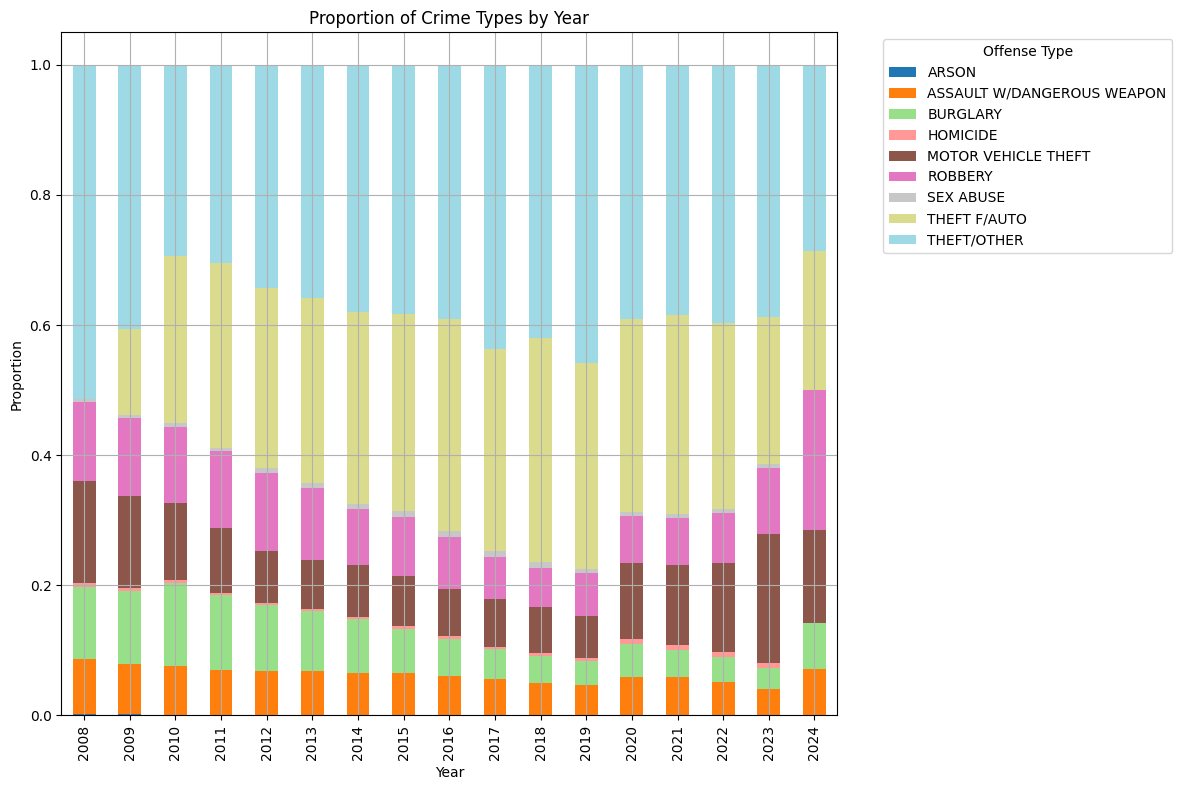

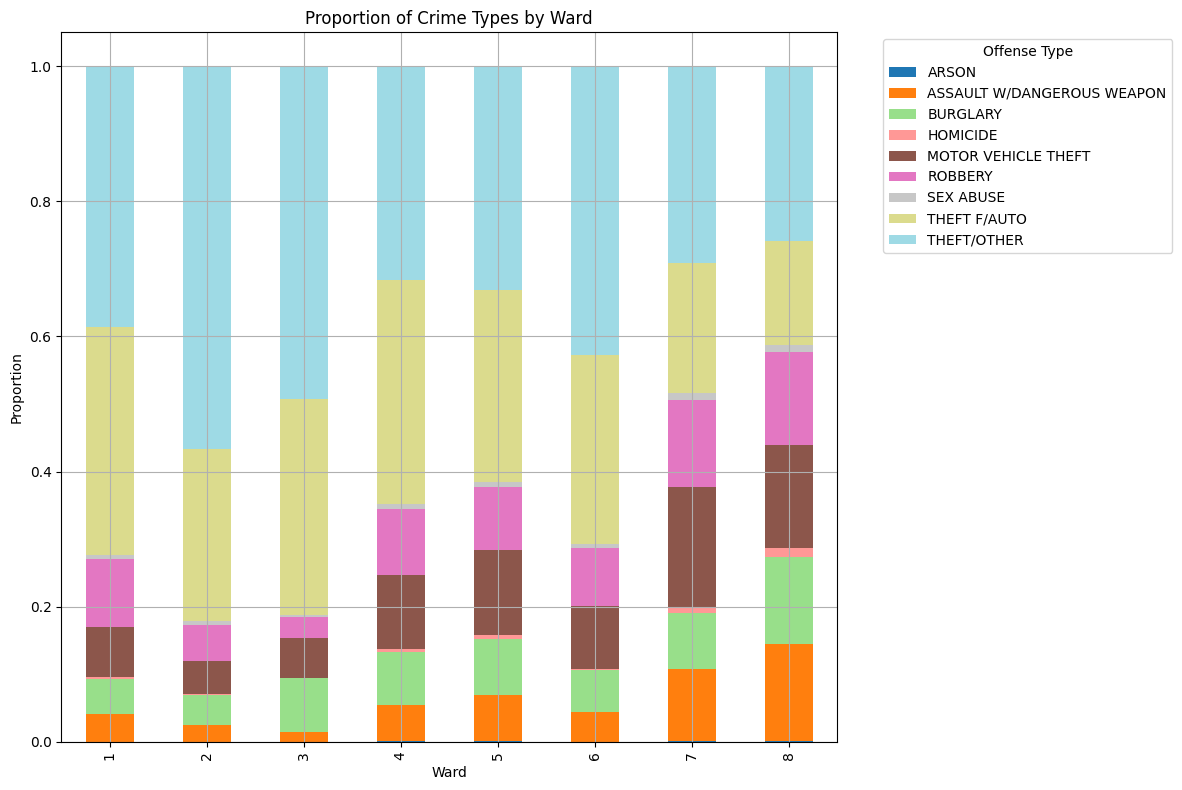

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401
2024   0.000000  0.785714  0.214286


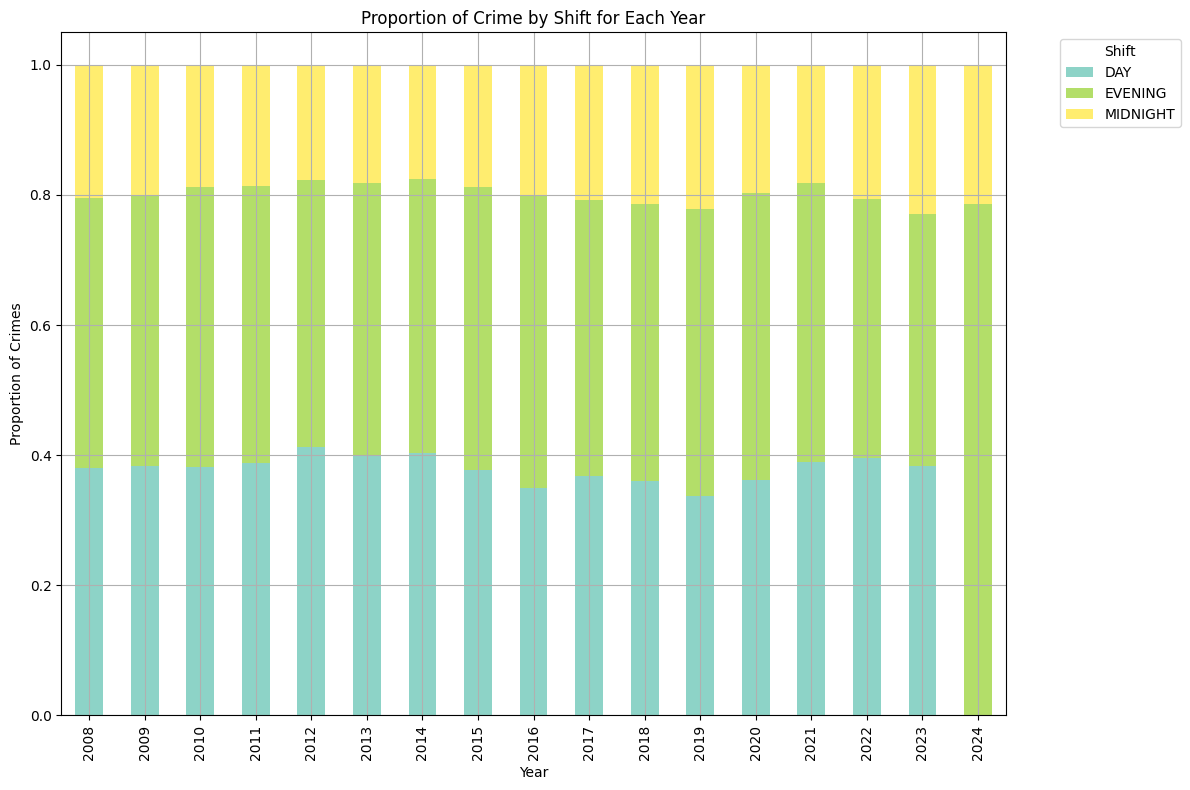

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
2024       14
dtype: int64


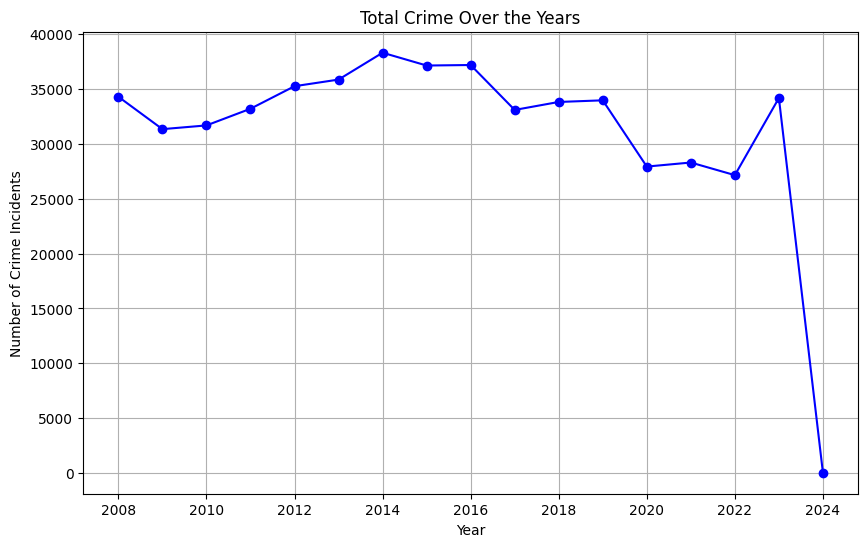

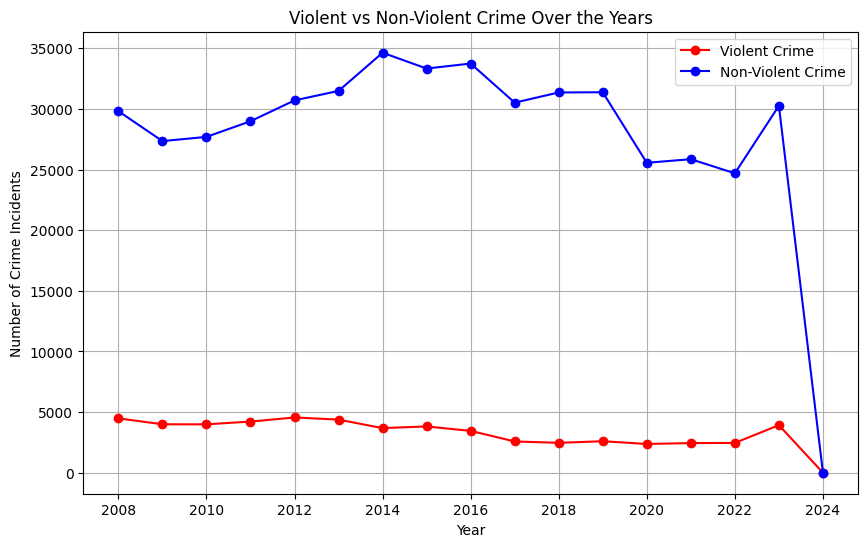

In [4]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows
data.head()

# Check the data structure
data.info()

import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']
violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year = violent_crime_data.groupby('YEAR').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

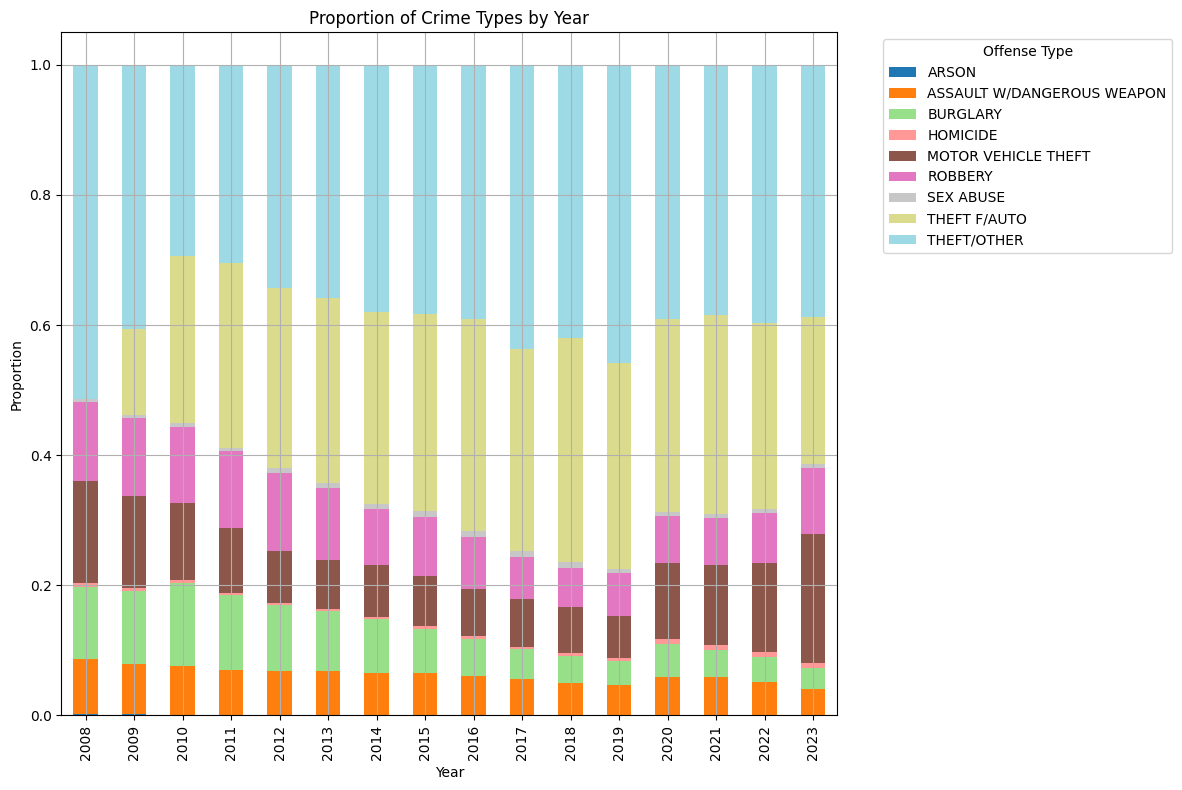

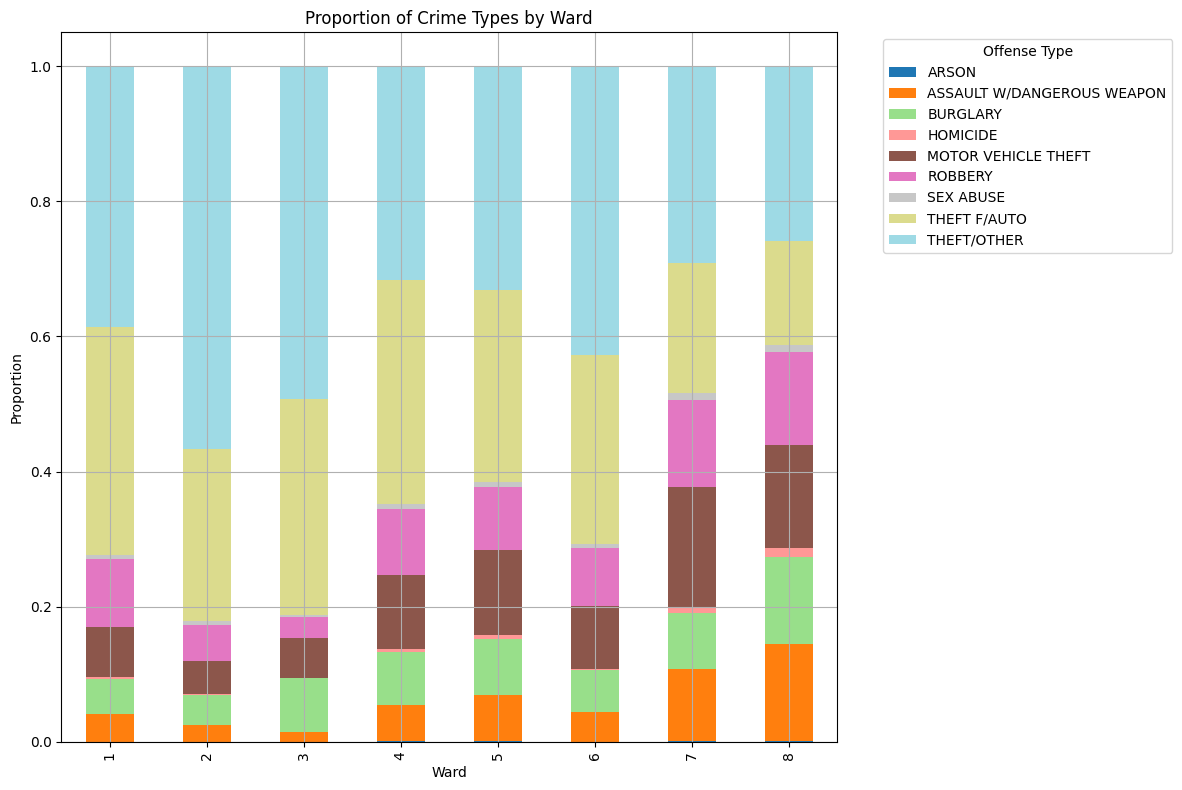

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


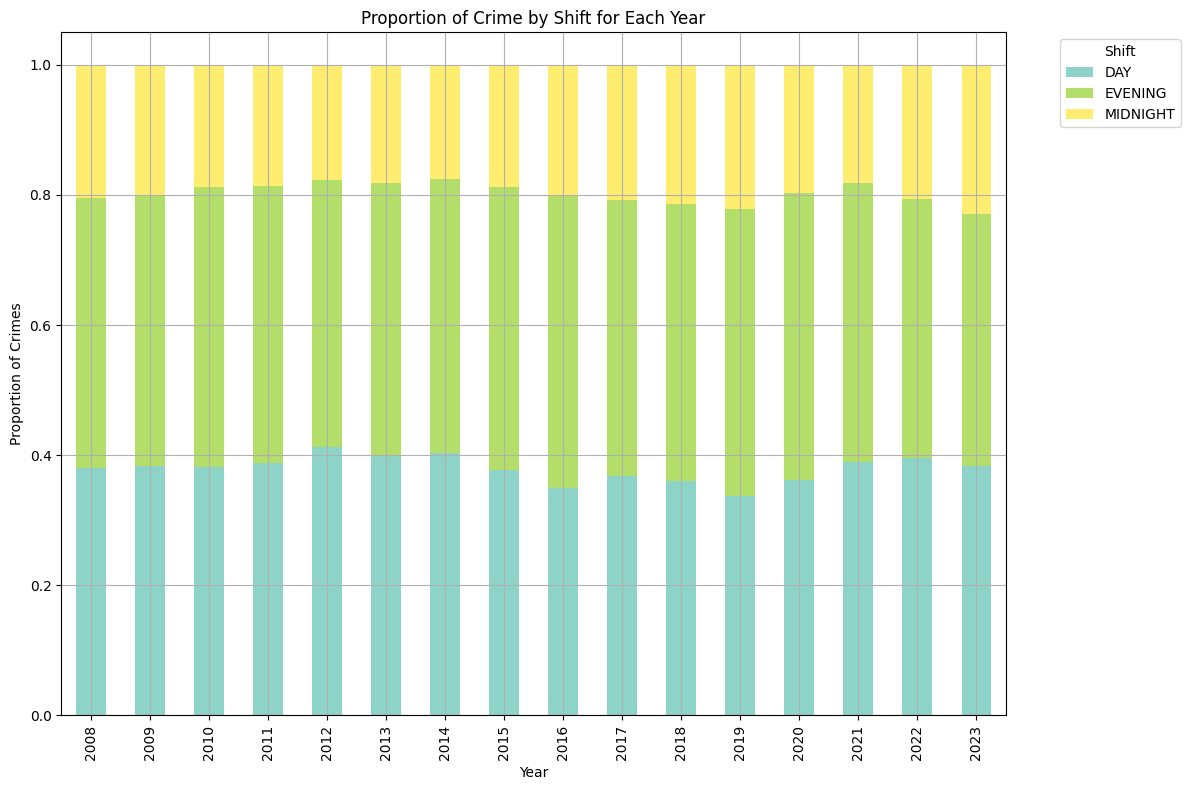

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


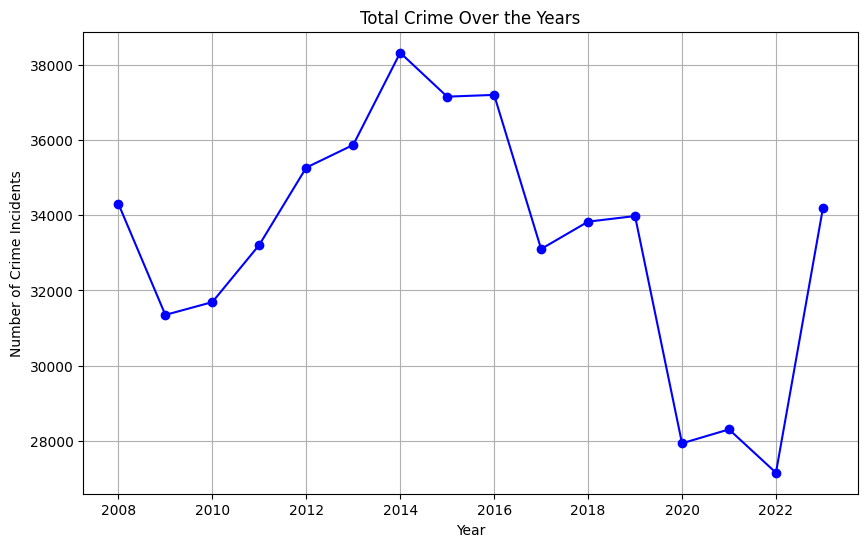

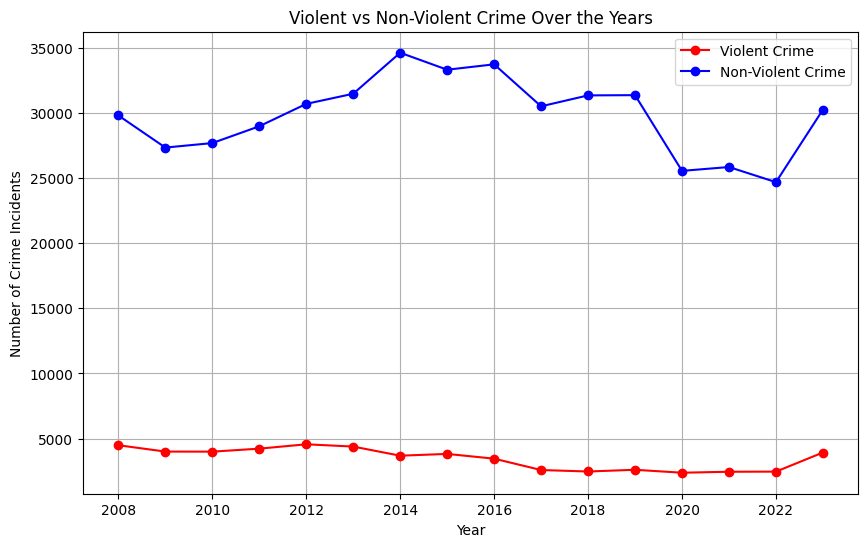

In [5]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']
violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year = violent_crime_data.groupby('YEAR').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

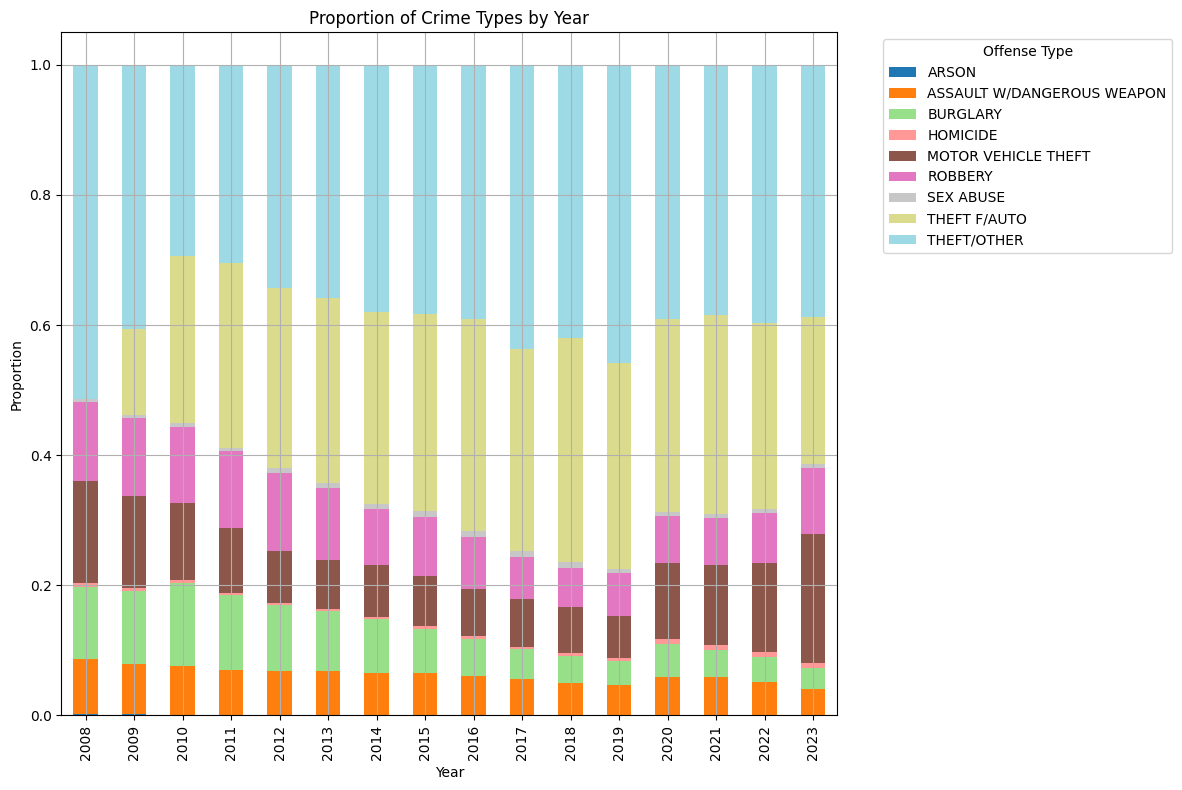

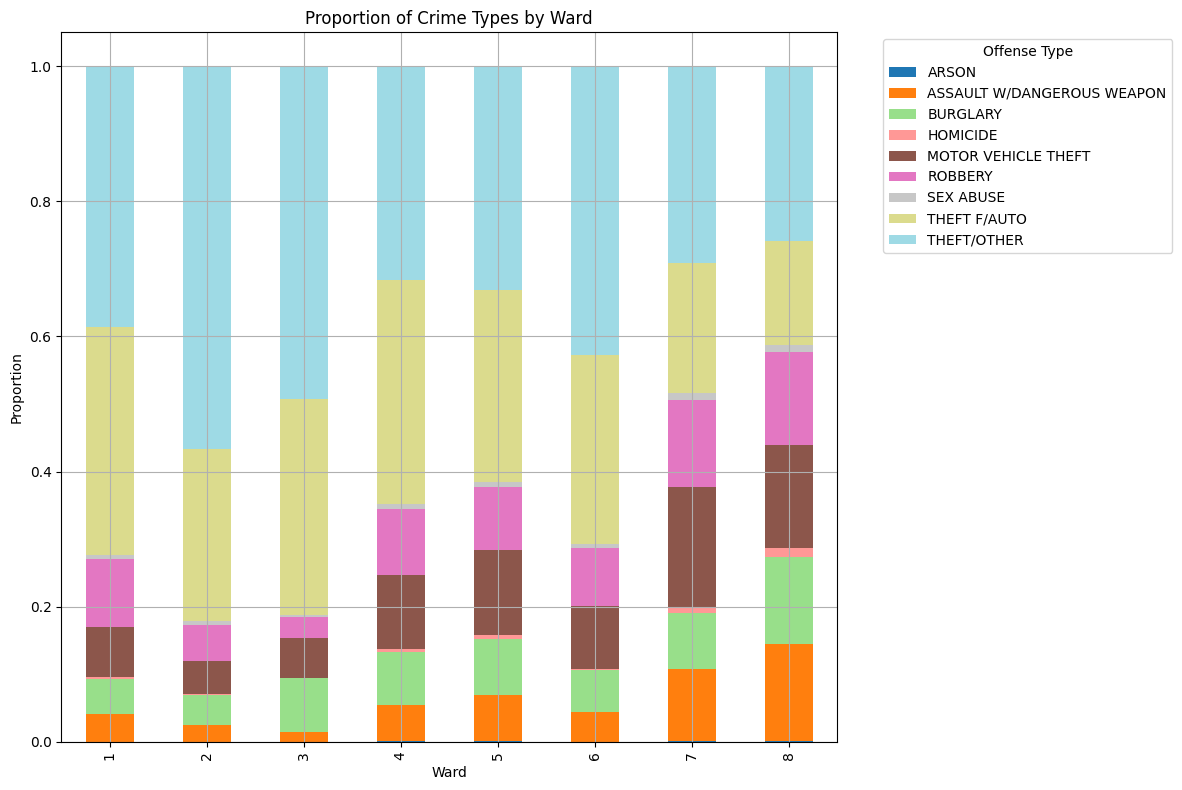

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


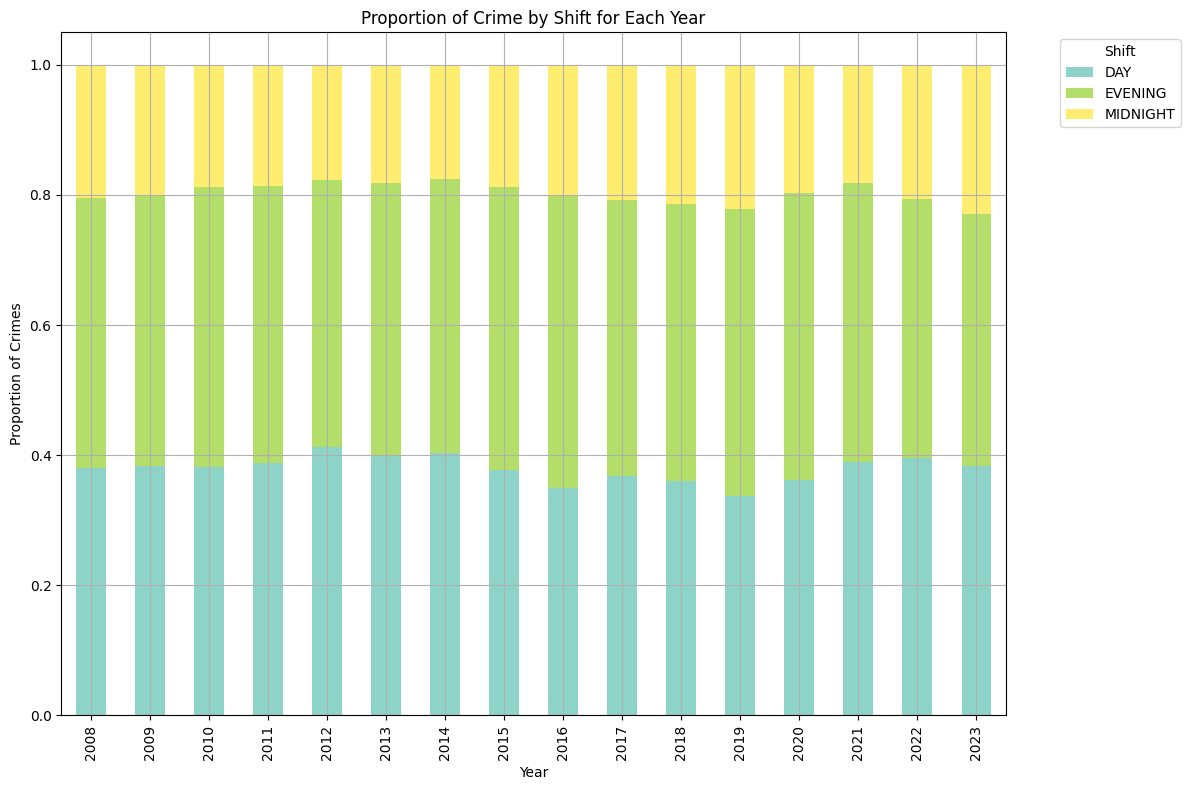

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


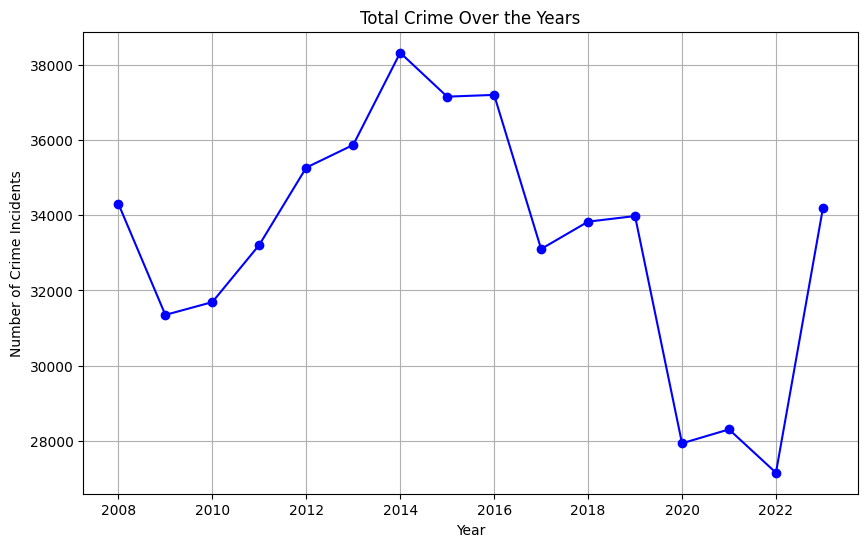

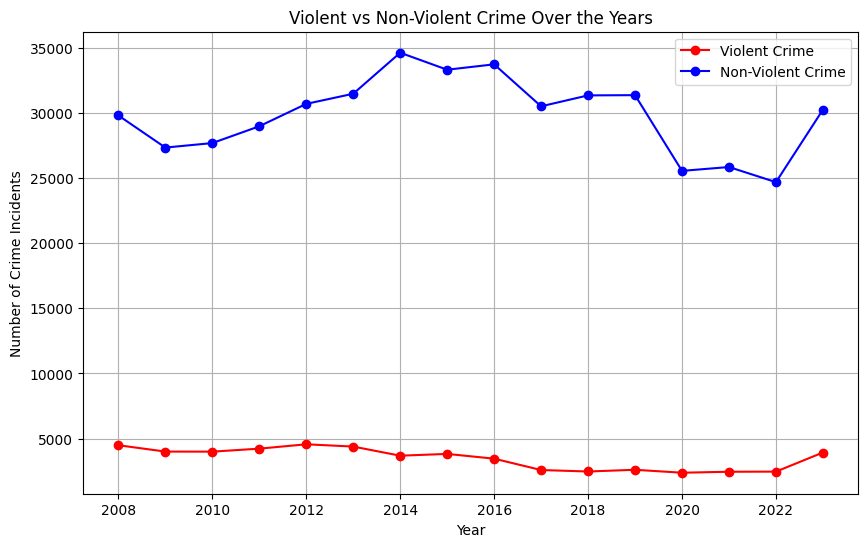

OFFENSE  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                 
2008          178     4172        136
2009          133     3753        112
2010          127     3708        158
2011          107     3940        176
2012           89     4196        273
2013          104     3980        299
2014          105     3260        317
2015          160     3328        331
2016          136     2971        346
2017          115     2169        297
2018          160     2029        279
2019          166     2235        199
2020          198     1998        178
2021          222     2038        189
2022          203     2074        182
2023          274     3461        191


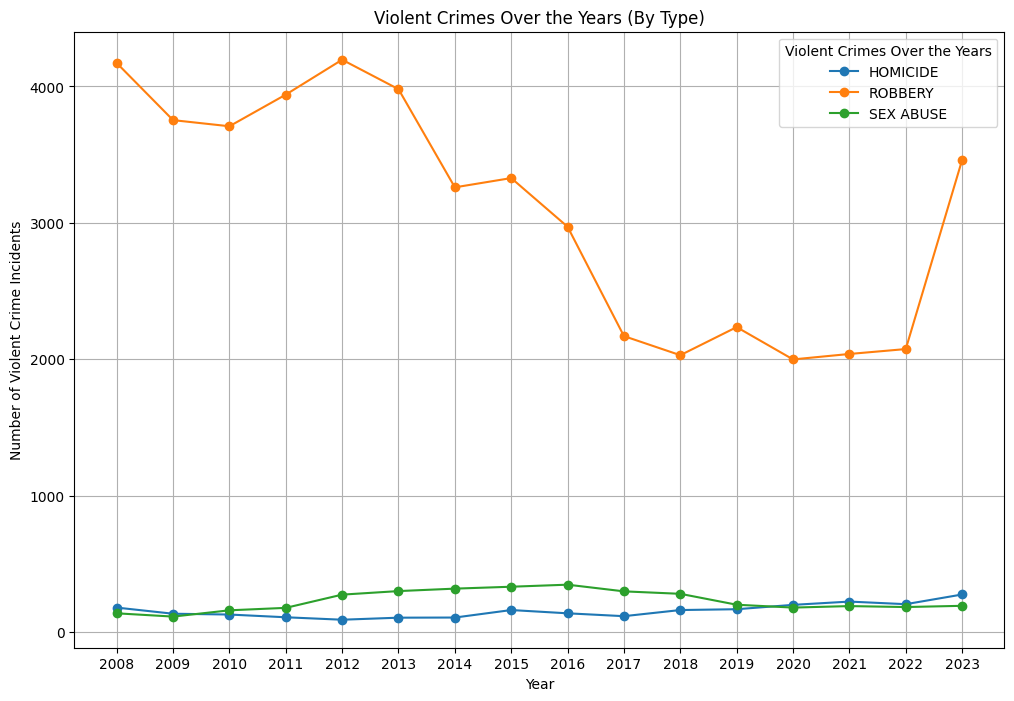

In [6]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
print(violent_crime_by_year_offense)


plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

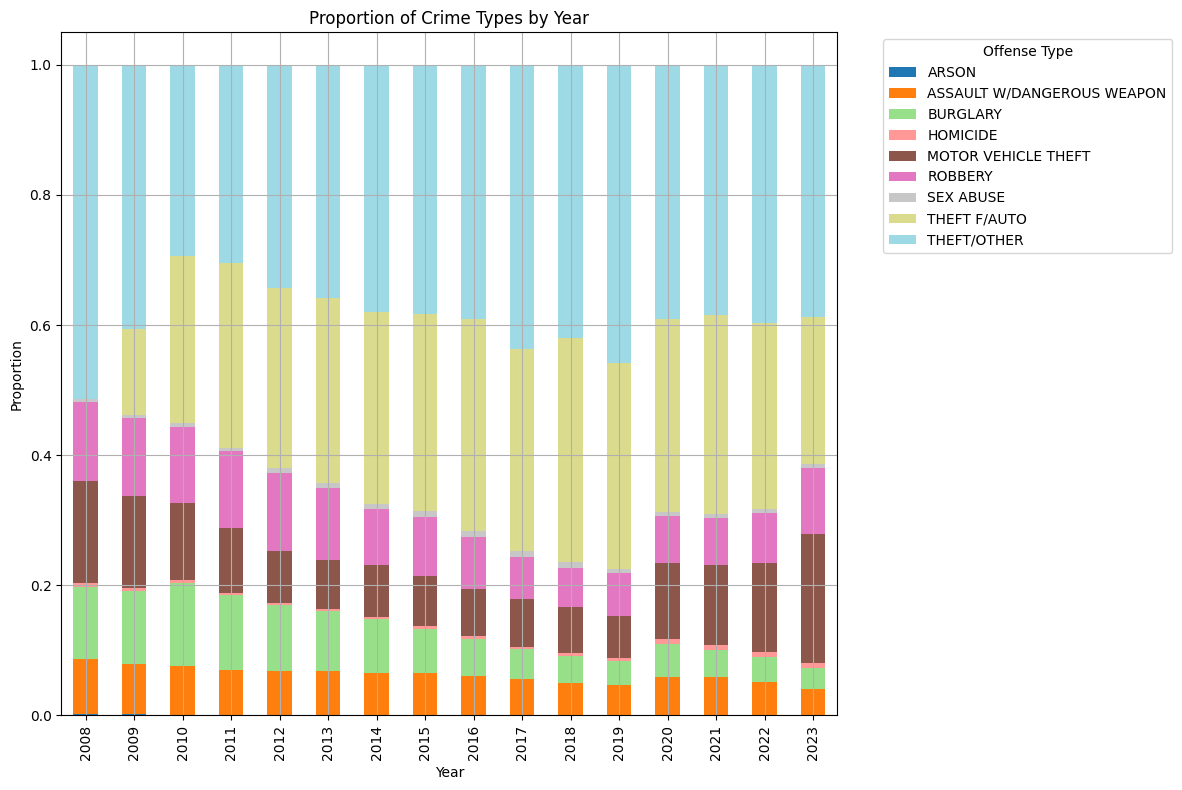

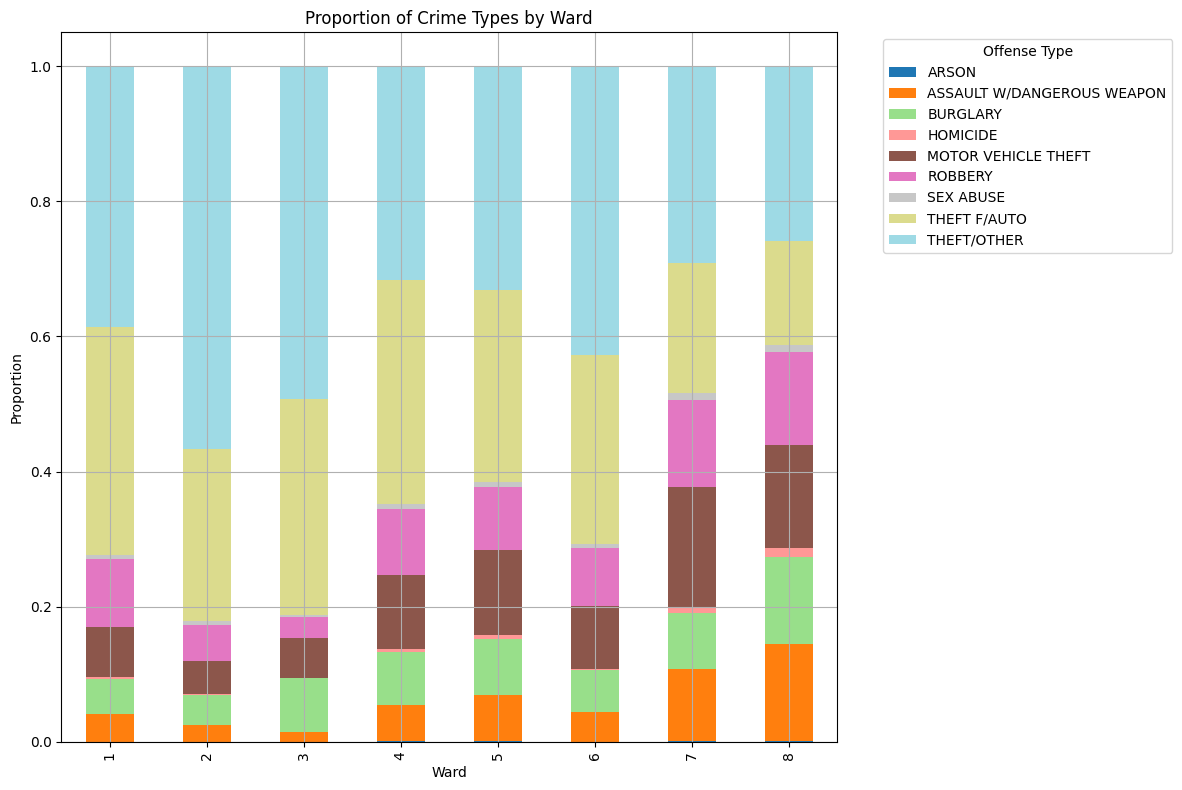

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


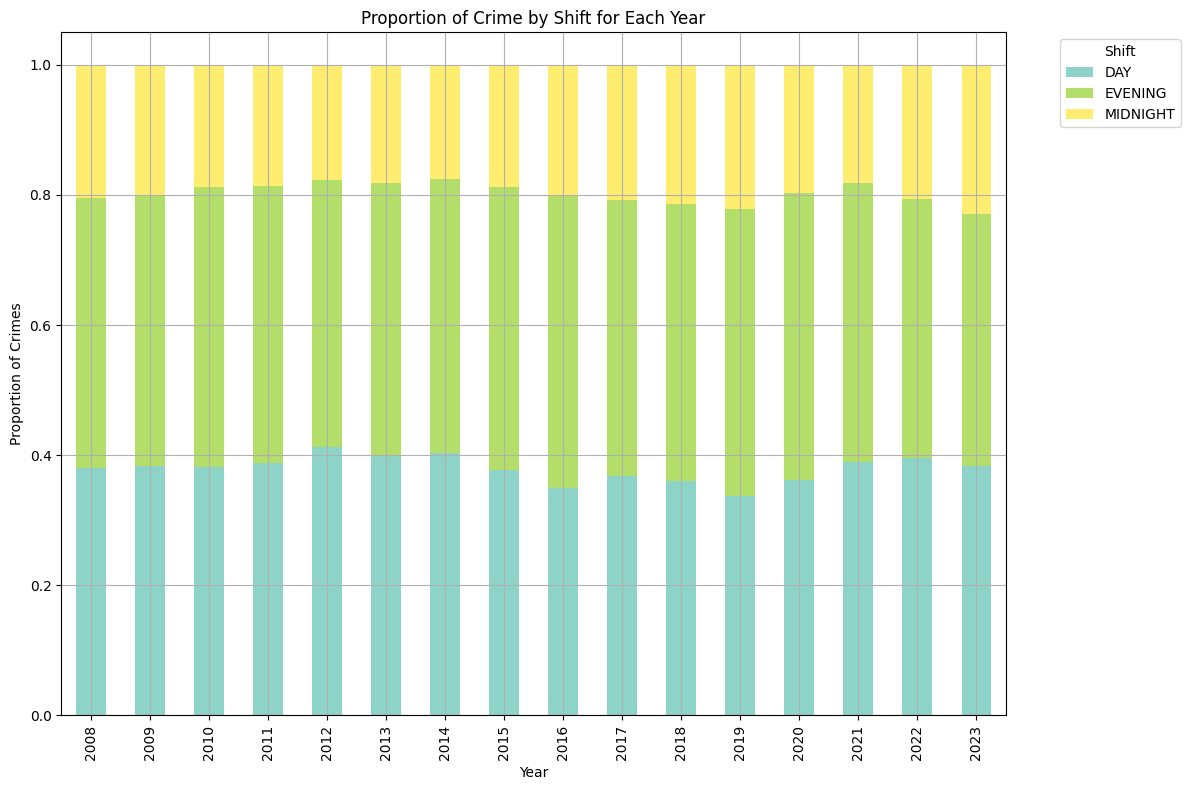

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


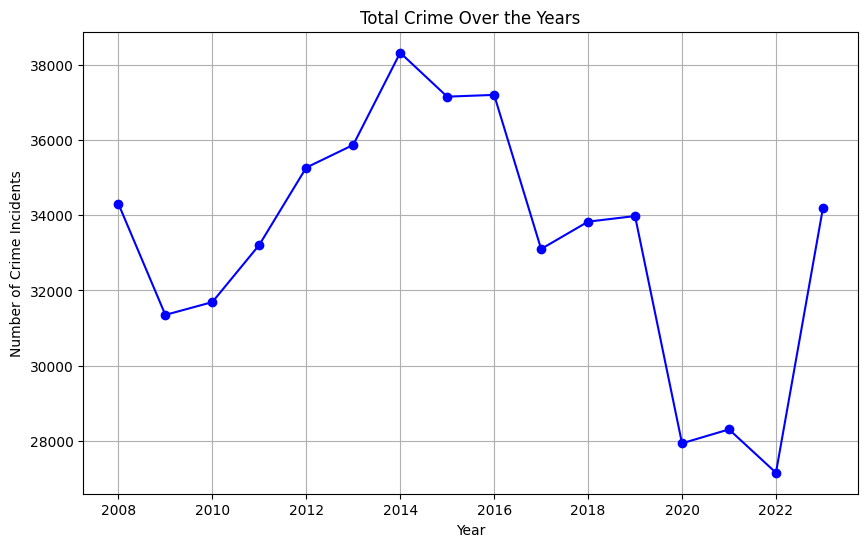

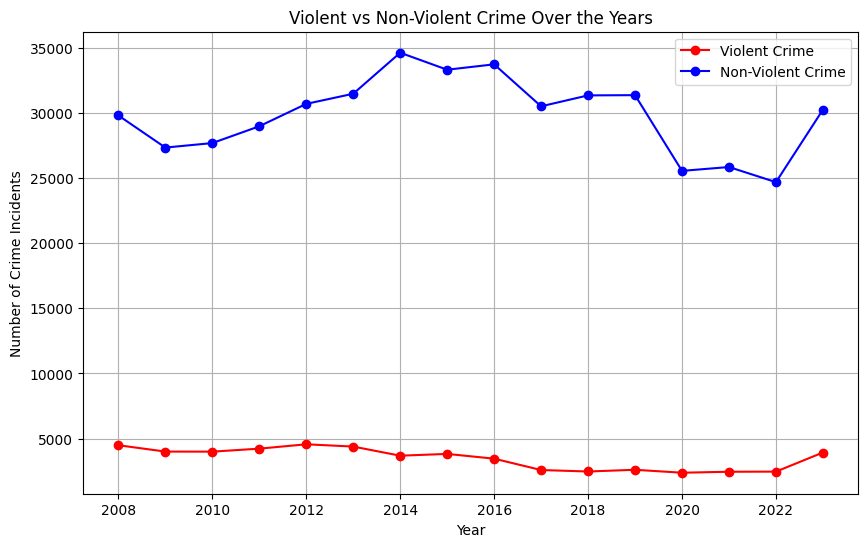

OFFENSE  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                 
2008          178     4172        136
2009          133     3753        112
2010          127     3708        158
2011          107     3940        176
2012           89     4196        273
2013          104     3980        299
2014          105     3260        317
2015          160     3328        331
2016          136     2971        346
2017          115     2169        297
2018          160     2029        279
2019          166     2235        199
2020          198     1998        178
2021          222     2038        189
2022          203     2074        182
2023          274     3461        191


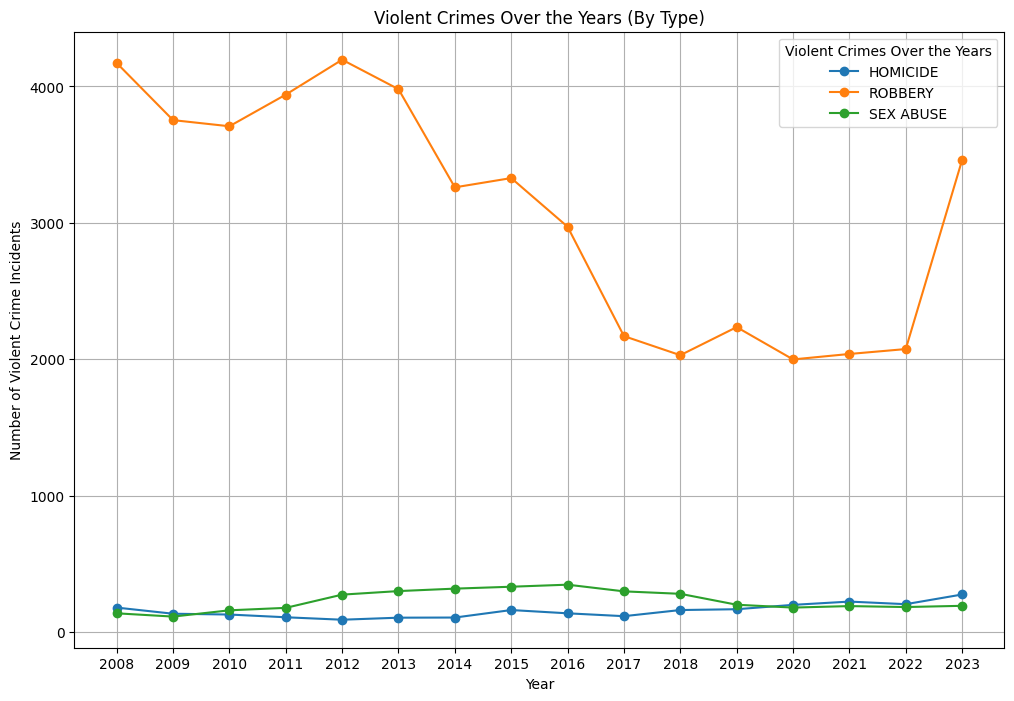

In [7]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']
violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
print(violent_crime_by_year_offense)


plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

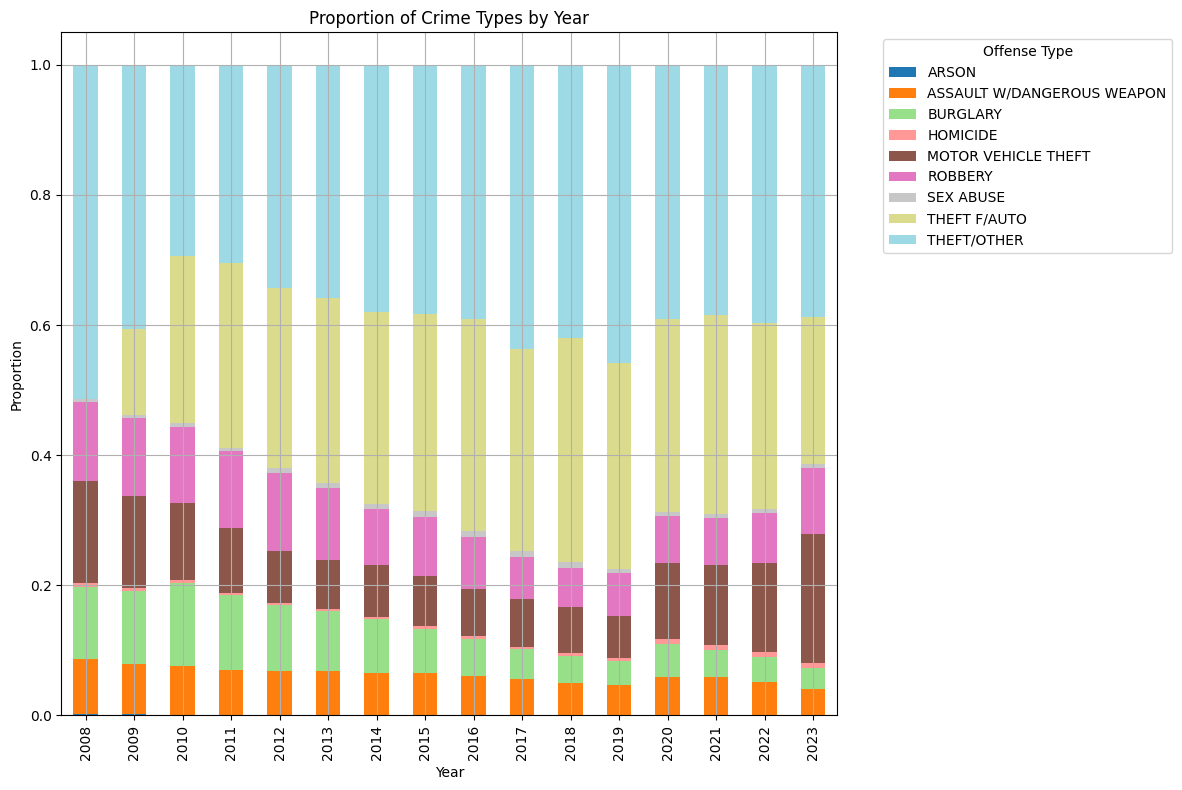

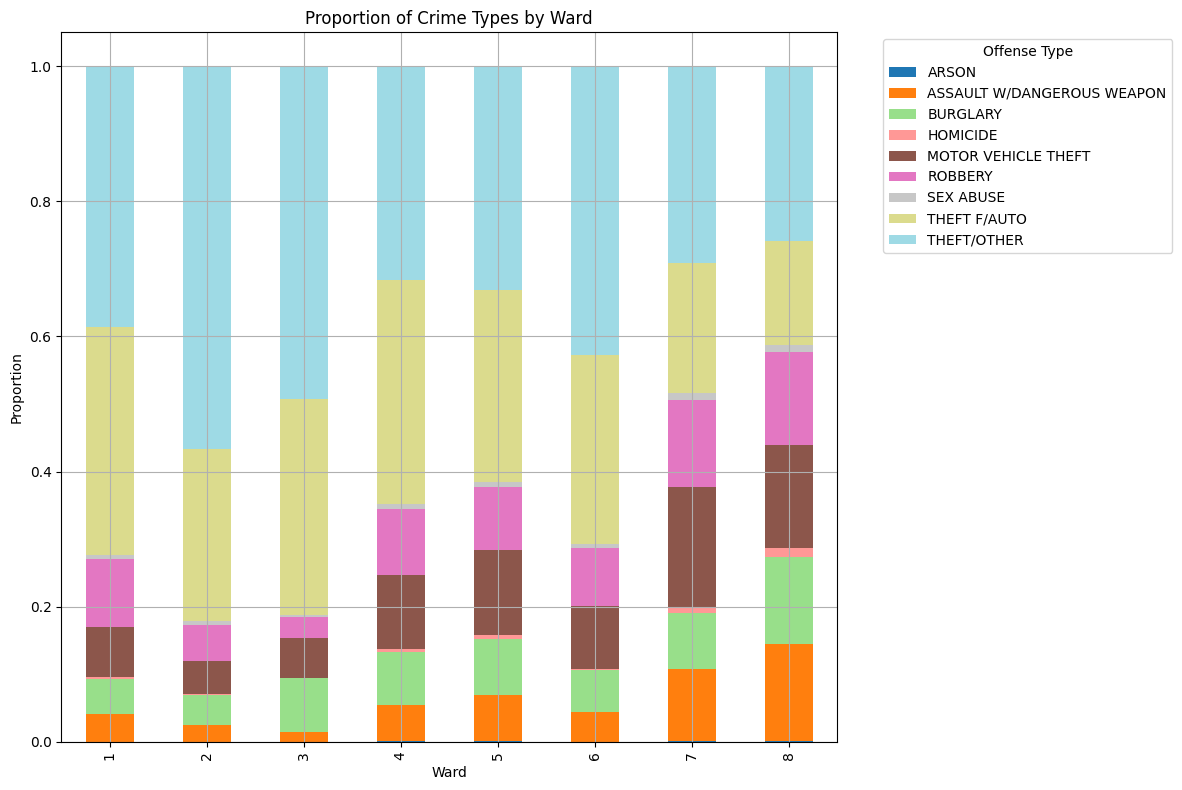

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


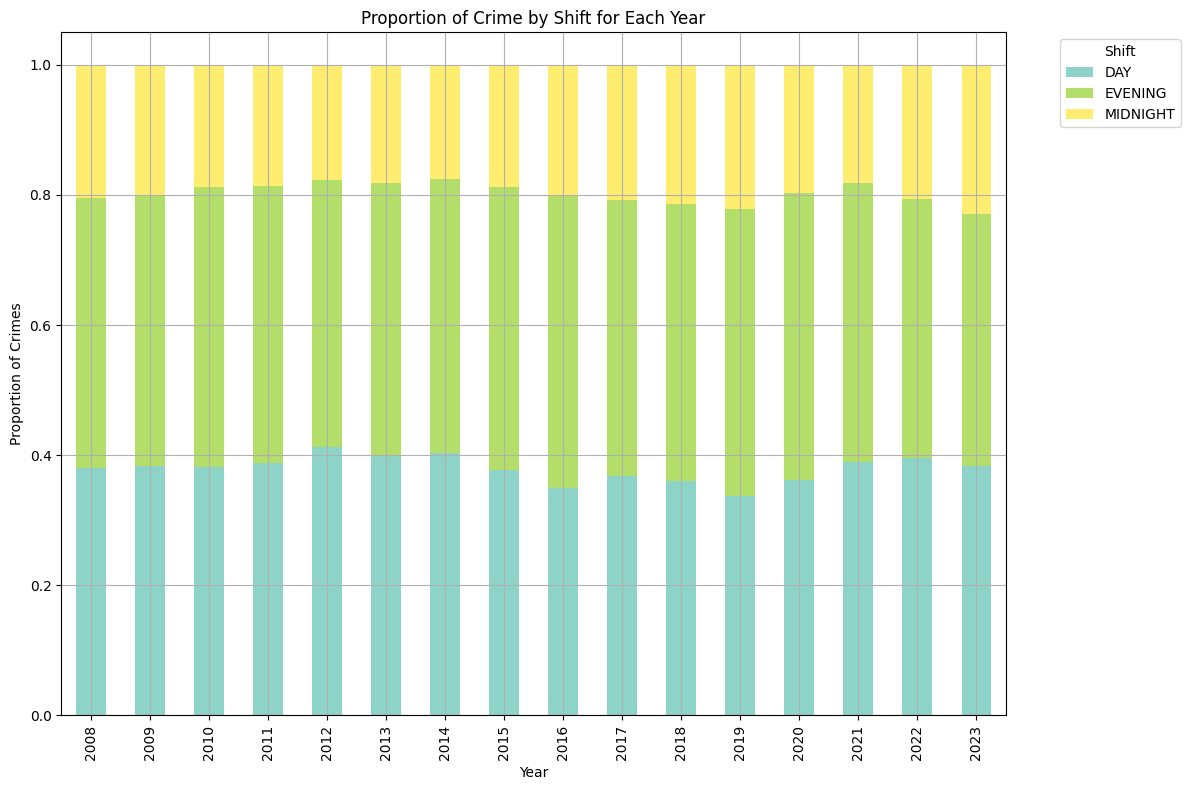

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


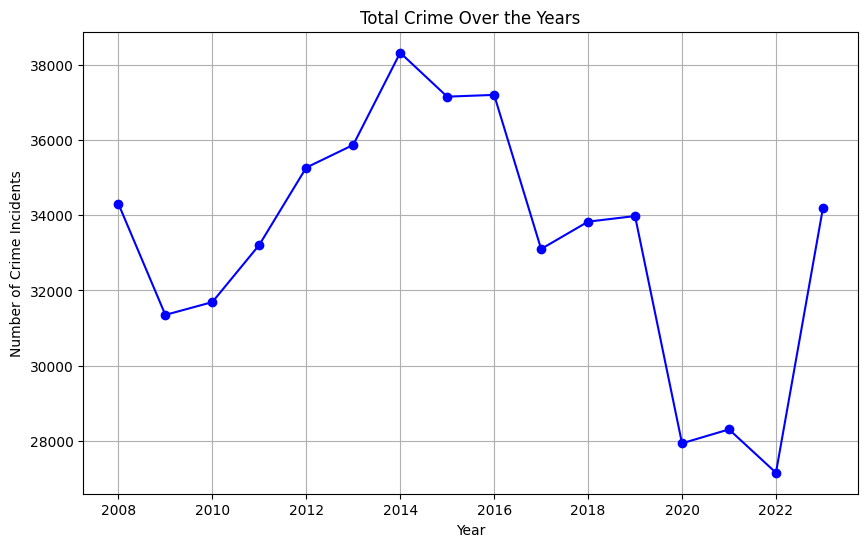

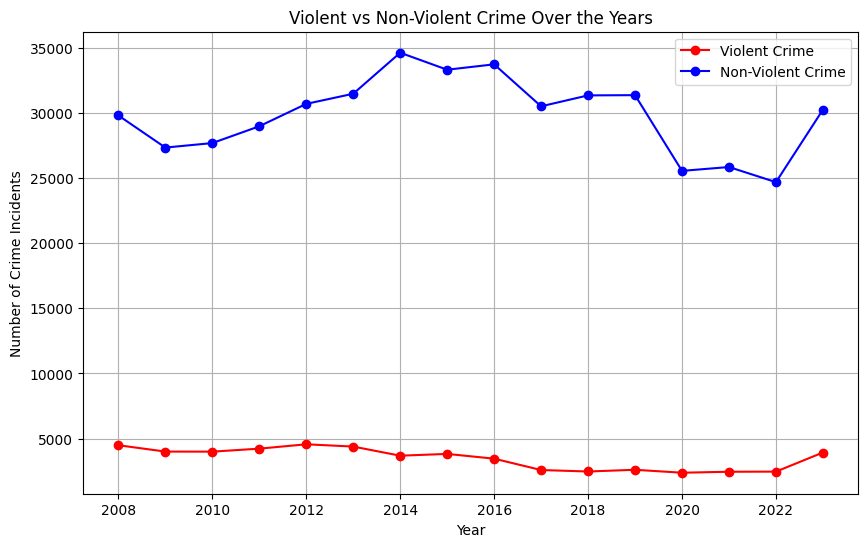

OFFENSE  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                 
2008          178     4172        136
2009          133     3753        112
2010          127     3708        158
2011          107     3940        176
2012           89     4196        273
2013          104     3980        299
2014          105     3260        317
2015          160     3328        331
2016          136     2971        346
2017          115     2169        297
2018          160     2029        279
2019          166     2235        199
2020          198     1998        178
2021          222     2038        189
2022          203     2074        182
2023          274     3461        191


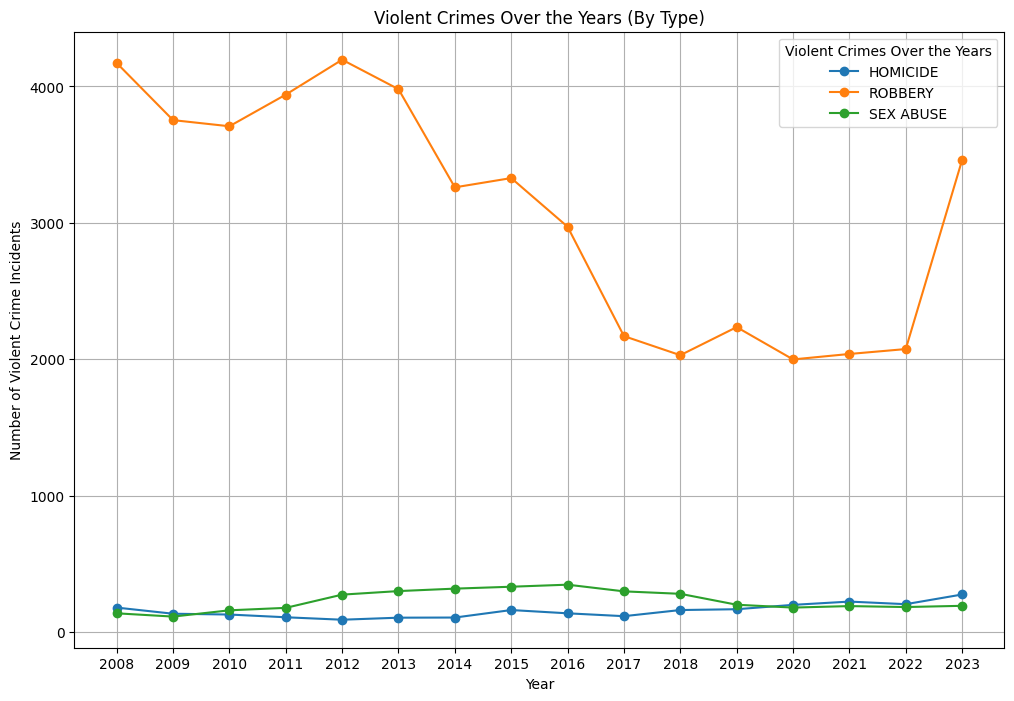

In [8]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

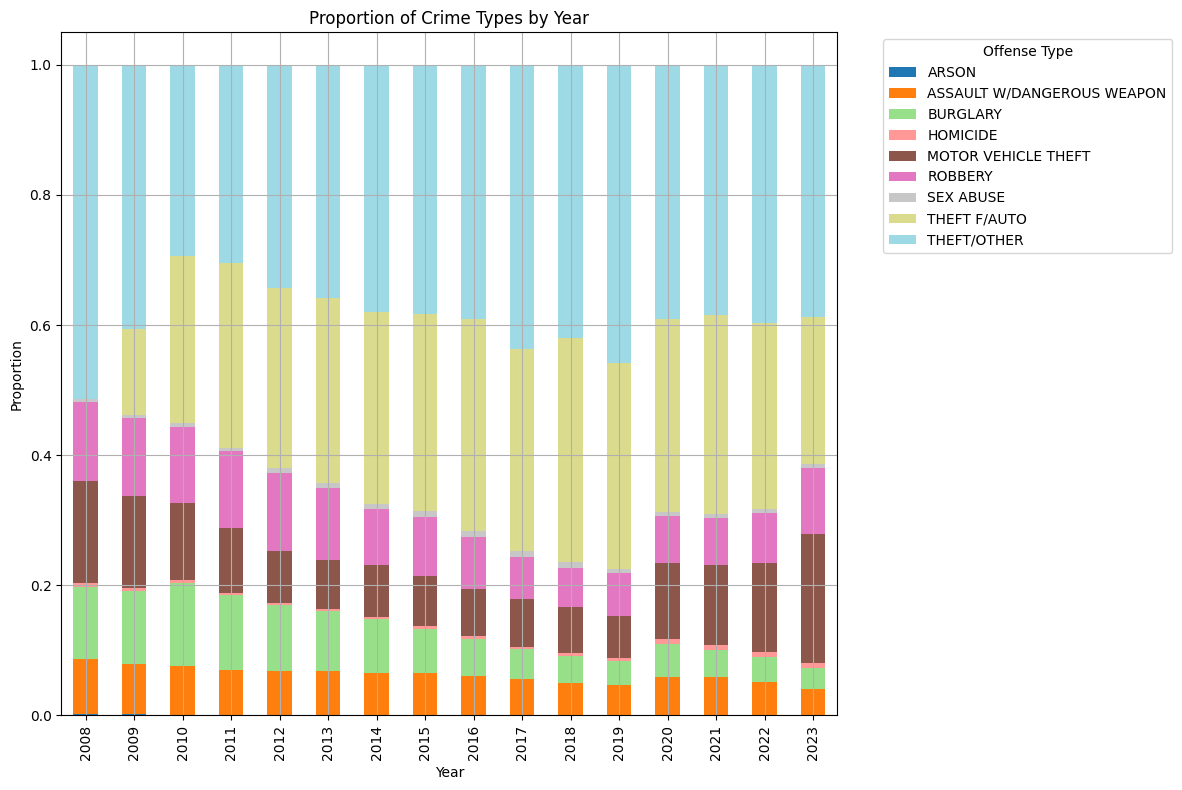

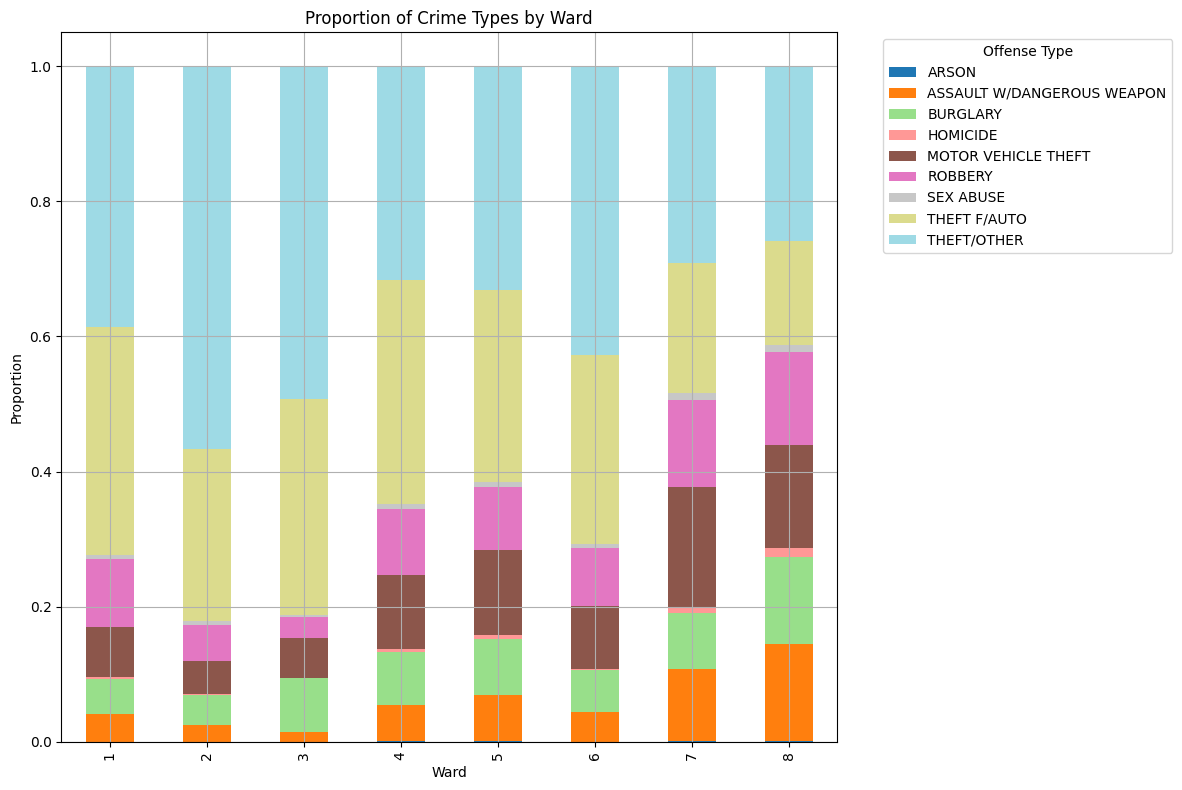

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


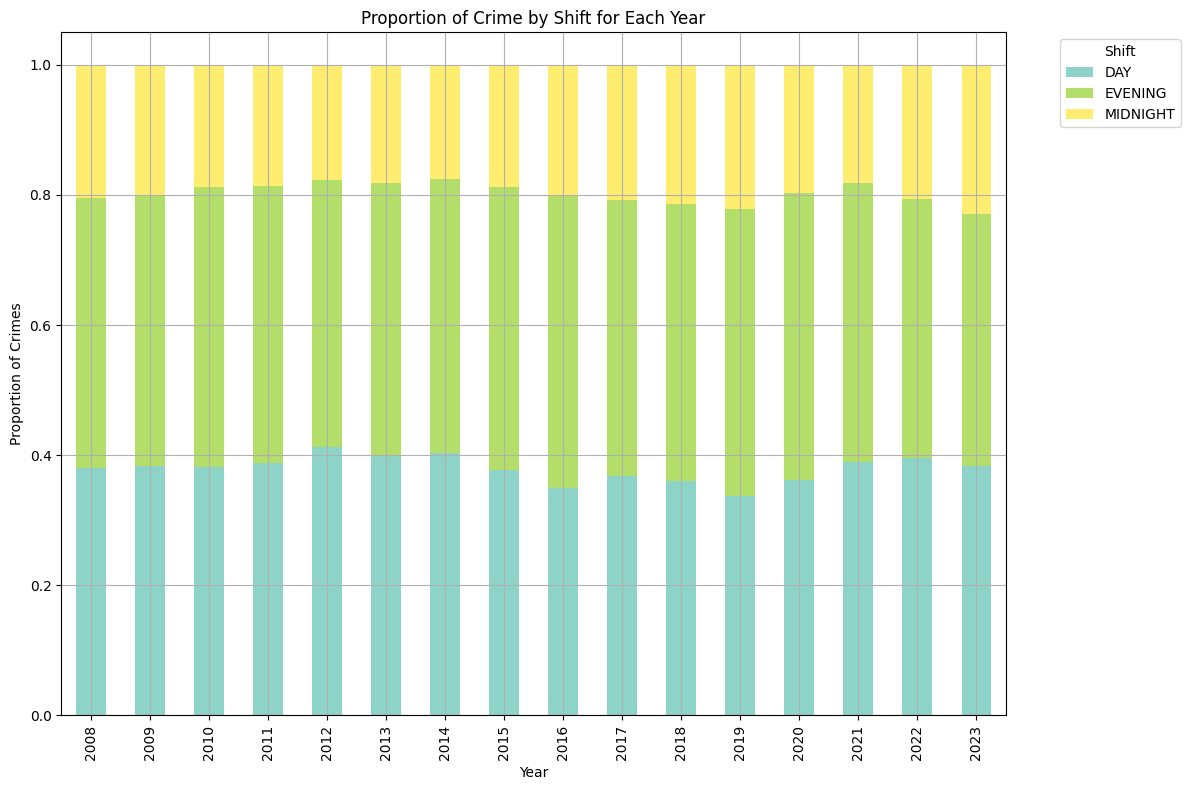

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


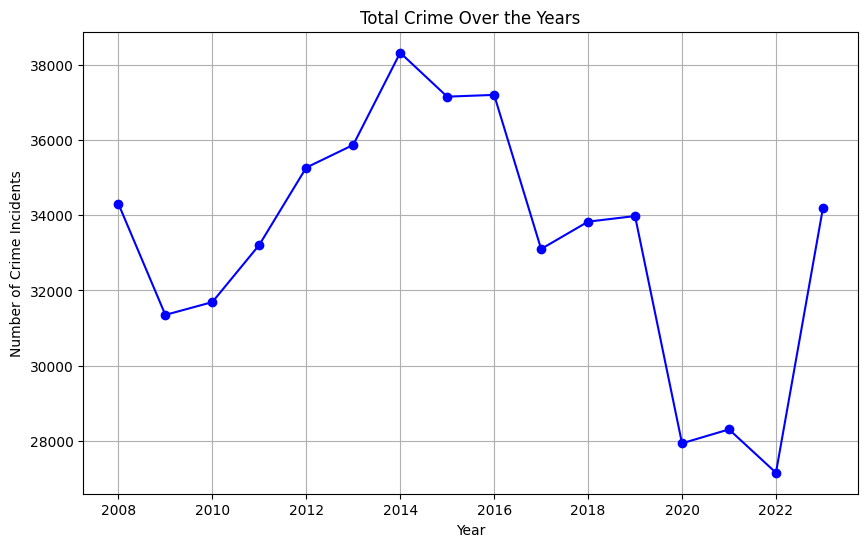

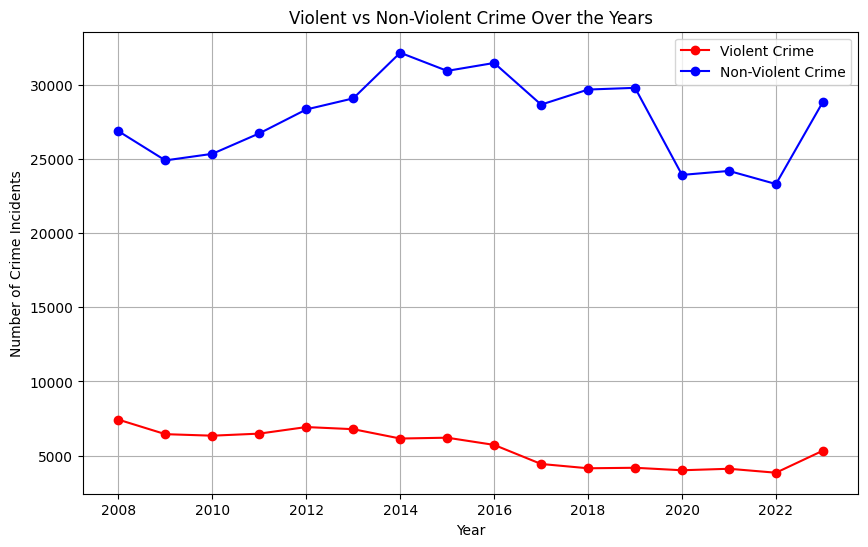

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

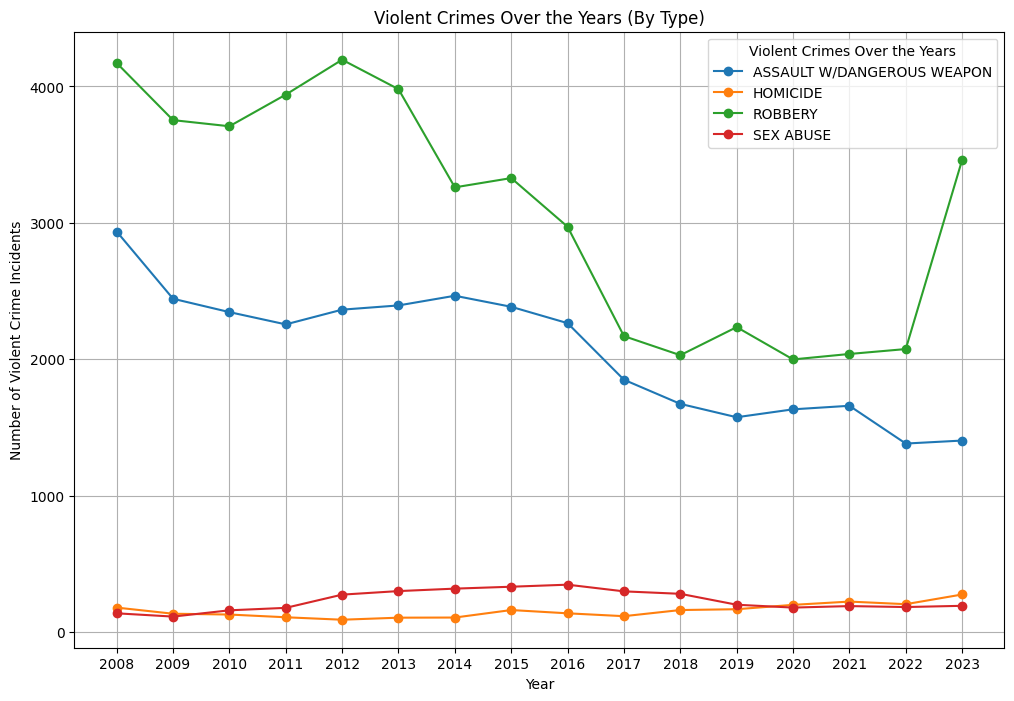

In [9]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

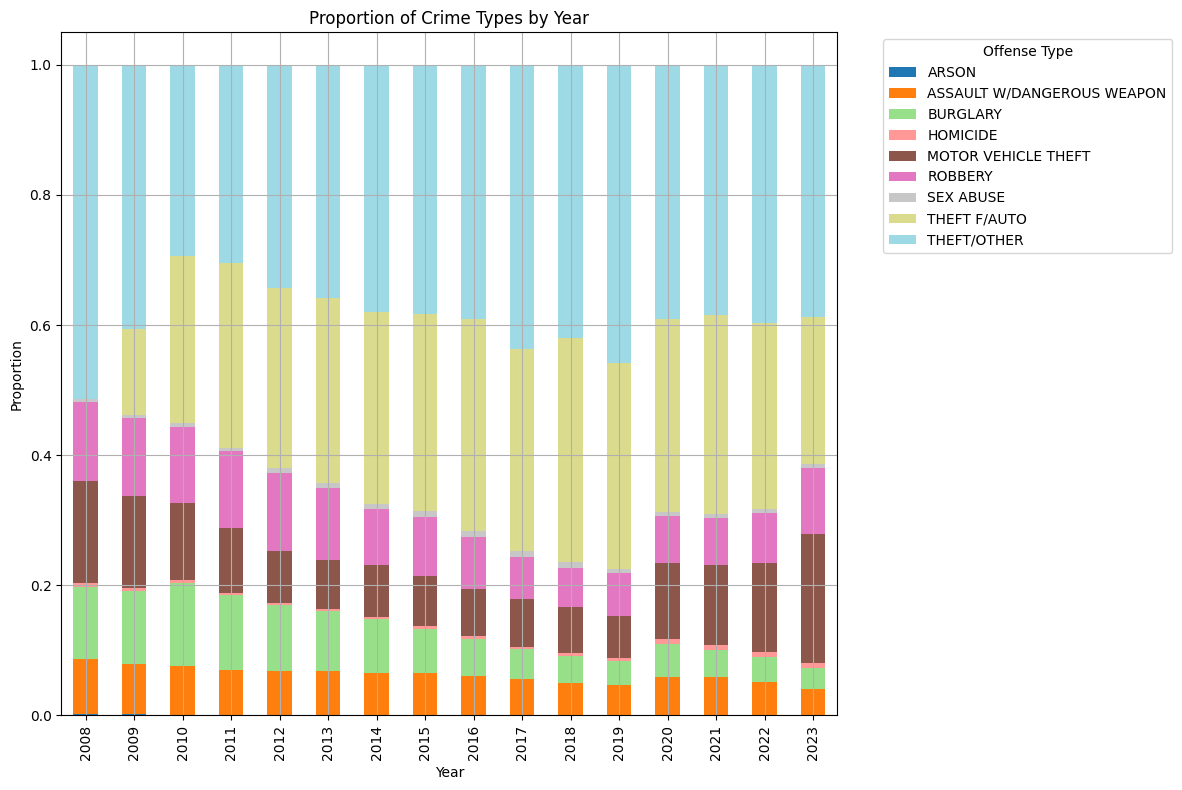

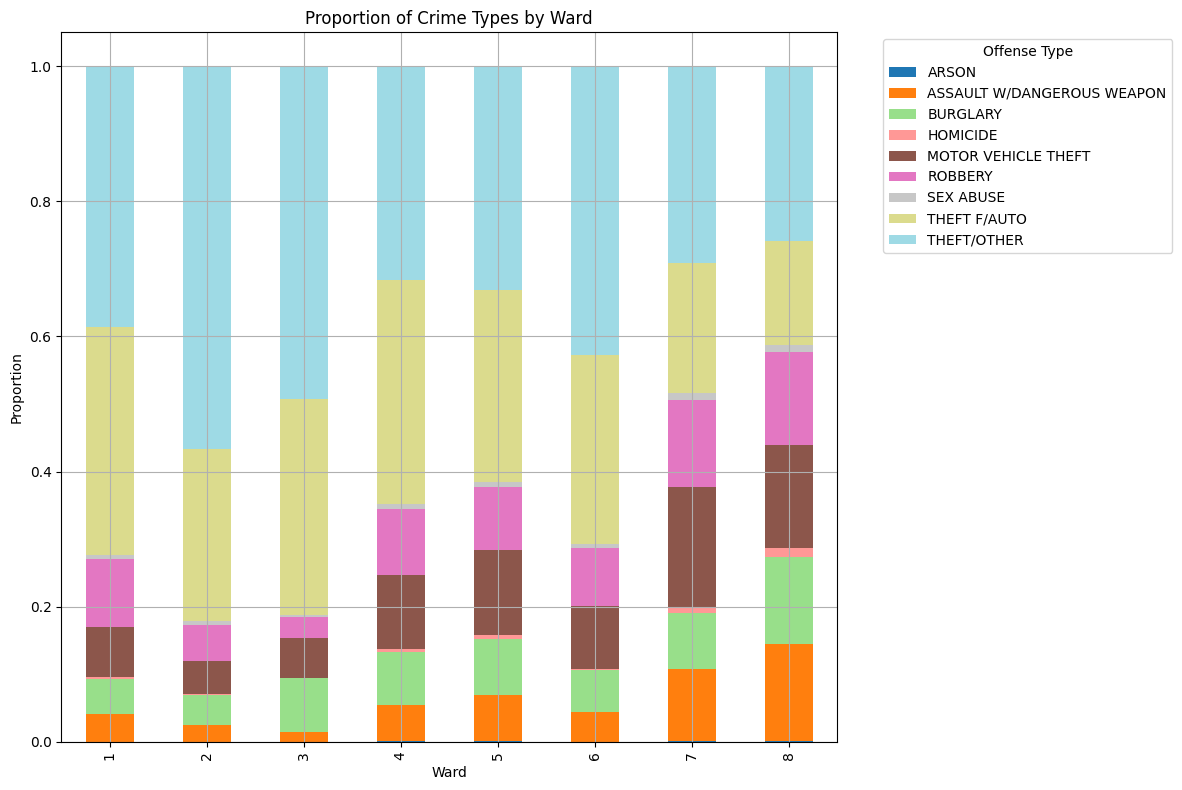

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


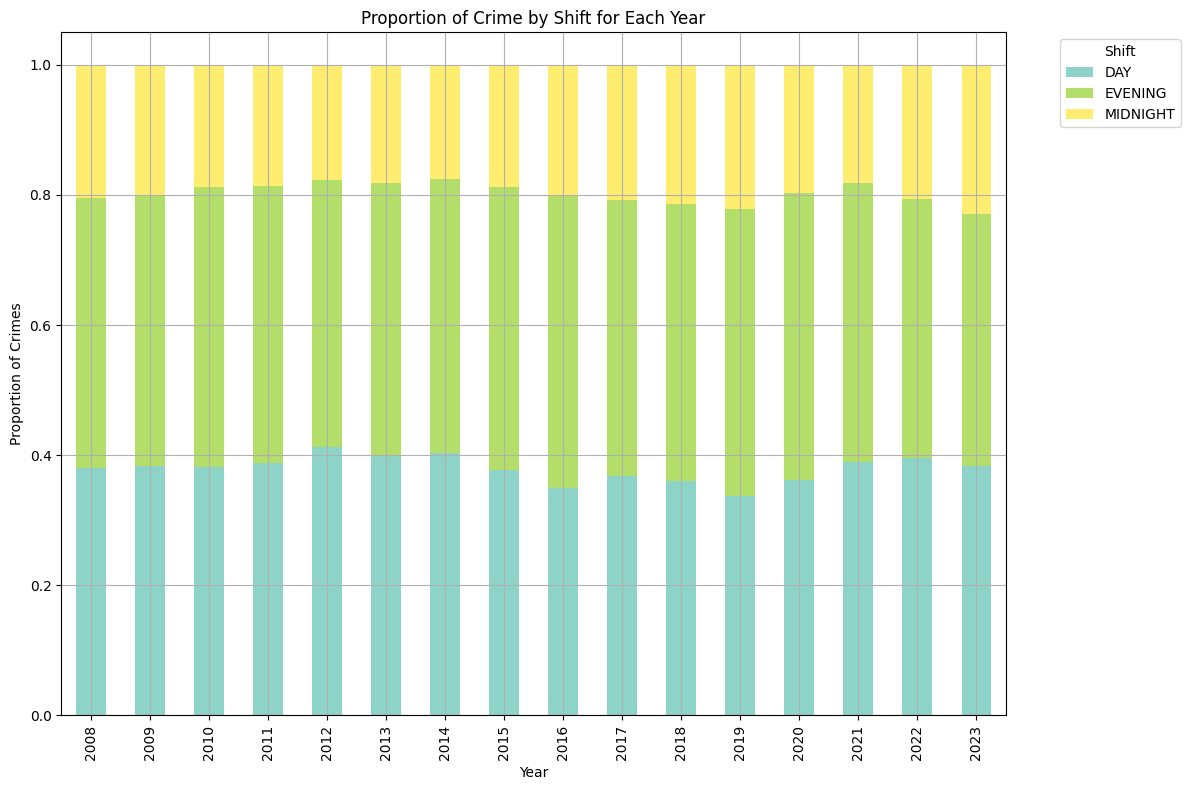

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


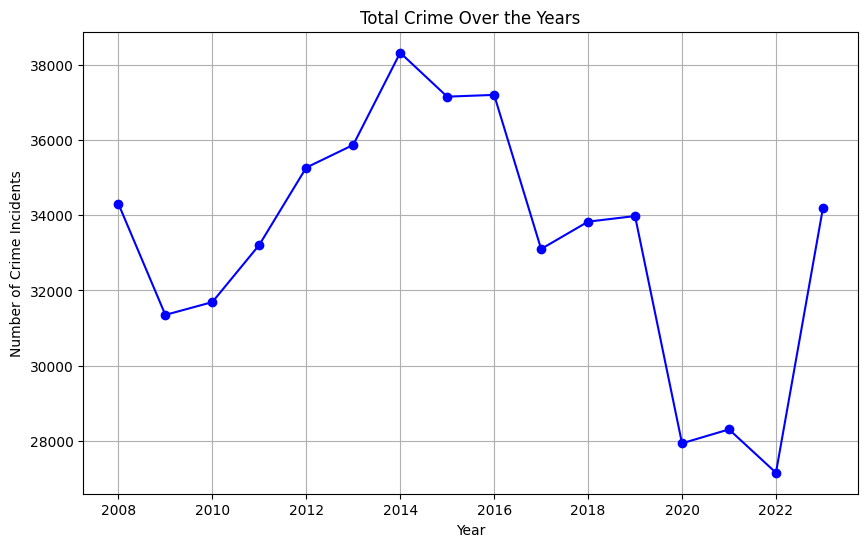

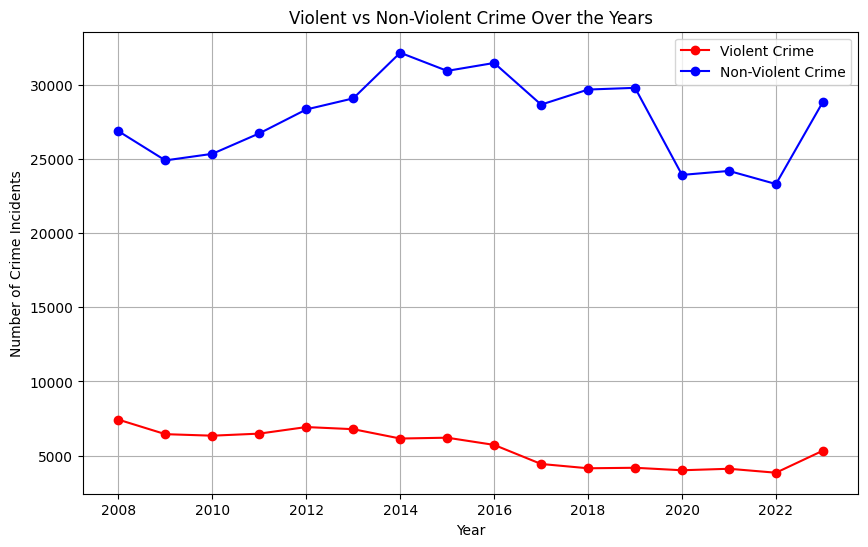

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

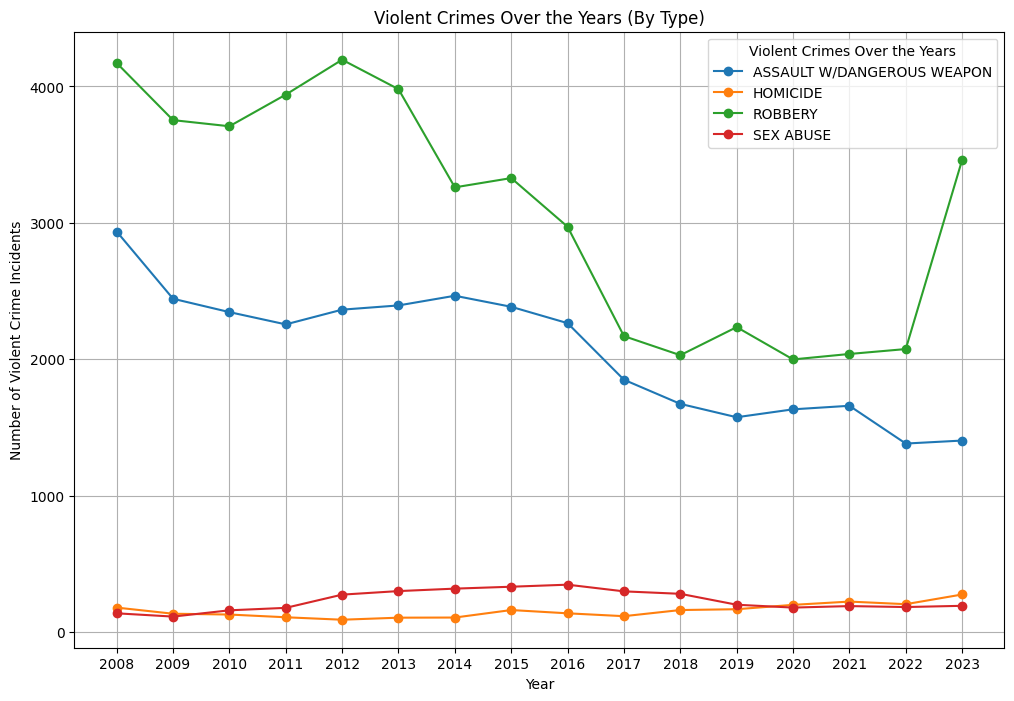

NameError: name 'non_violent_crime_by_year_offense' is not defined

<Figure size 1200x800 with 0 Axes>

In [10]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()


# Non-Violent crime over the years
violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/ A DANGEROUS WEAPON', 'ROBBERY']

non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))


for crime_type in non_violent_crime_by_year_offense.columns:
    plt.plot(non_violent_crime_by_year_offense.index, non_violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)


plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(non_violent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Type')

# Display grid
plt.grid(True)

# Show plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

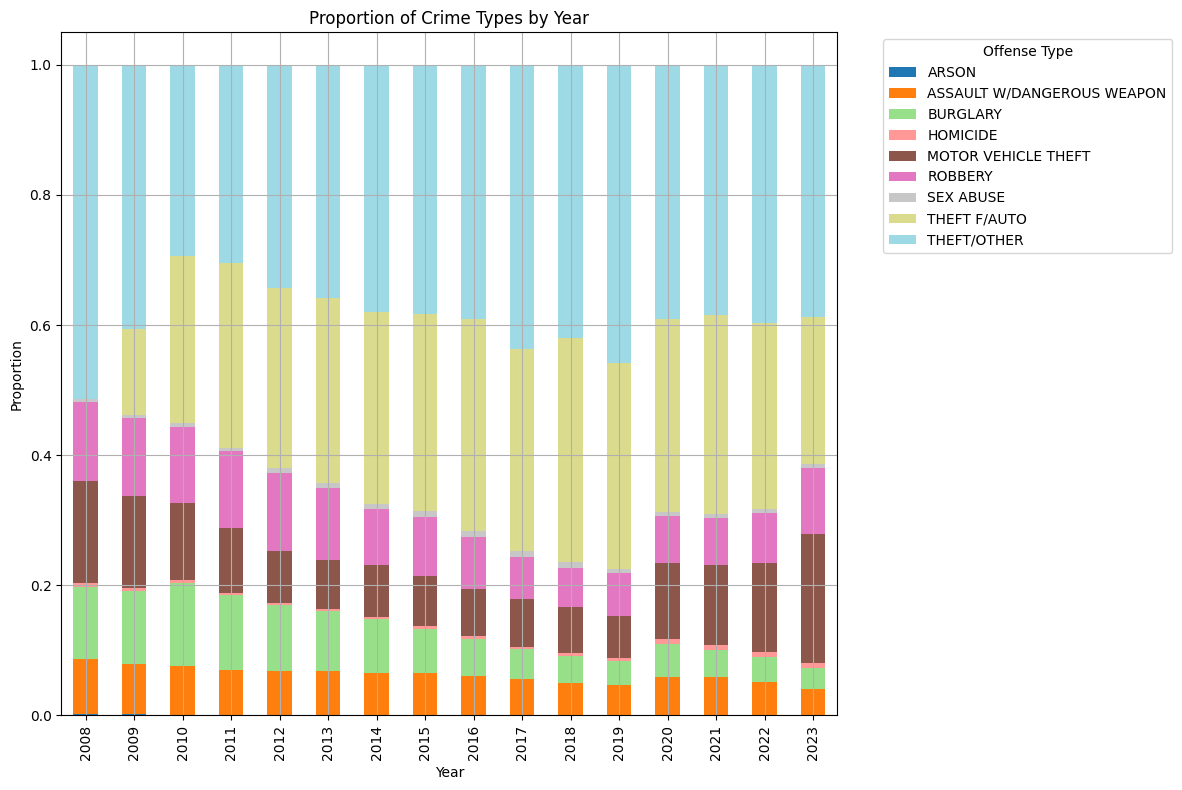

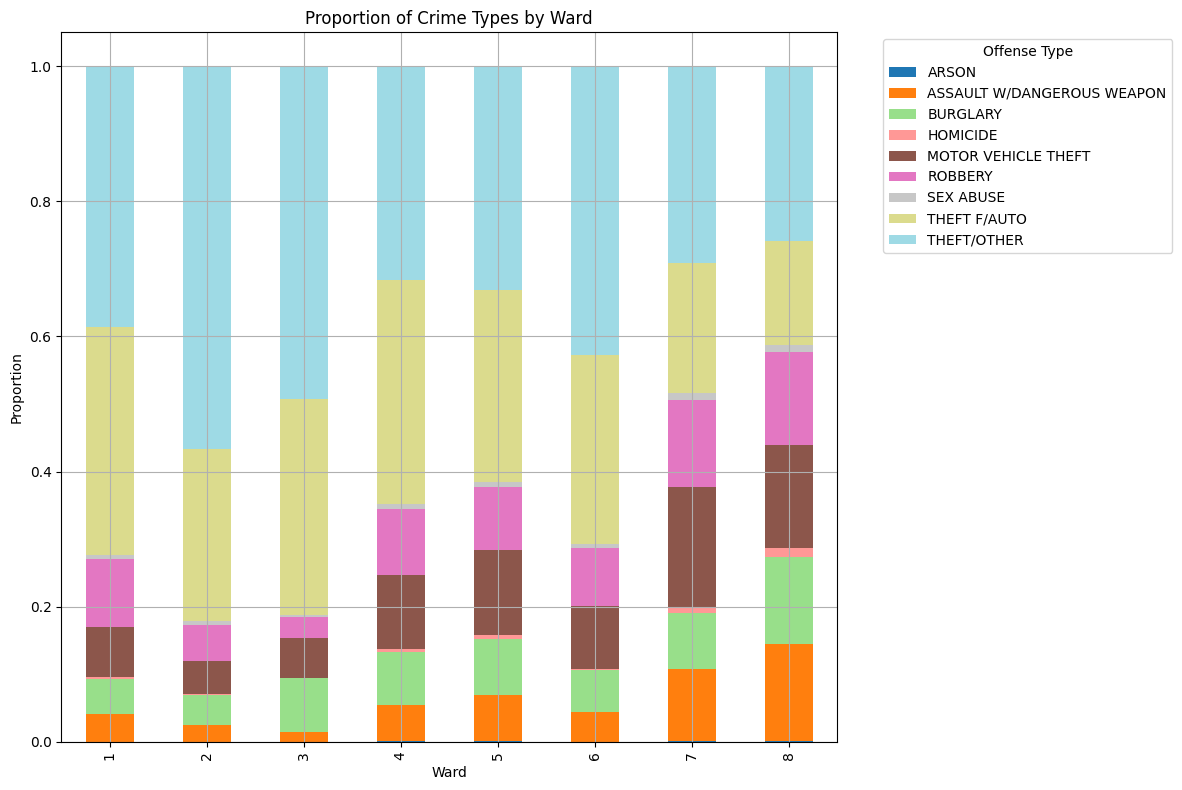

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


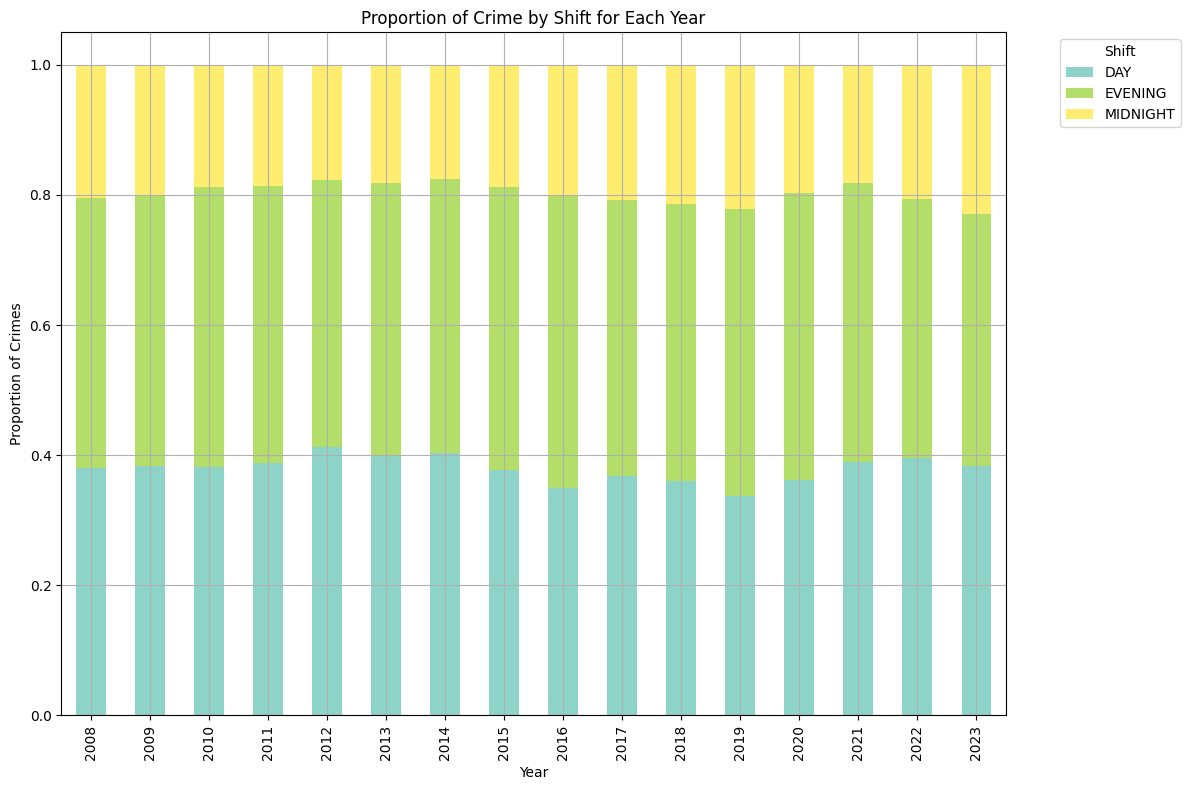

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


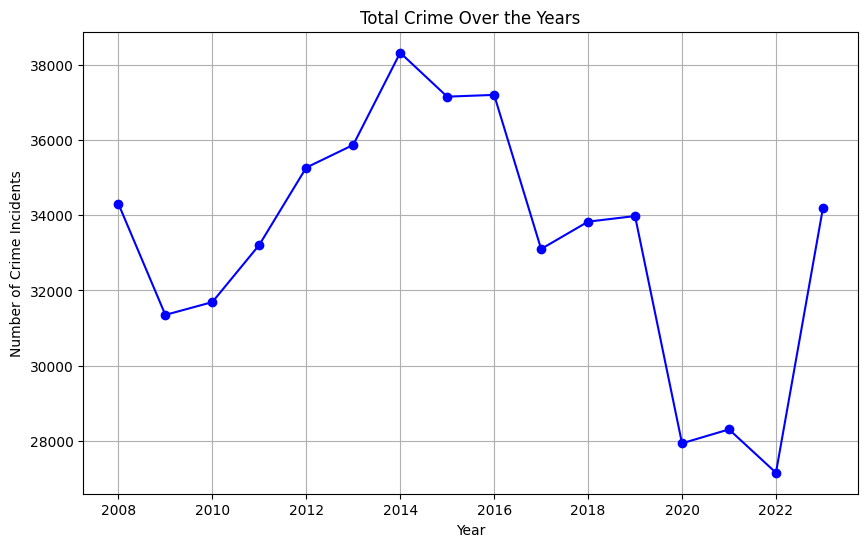

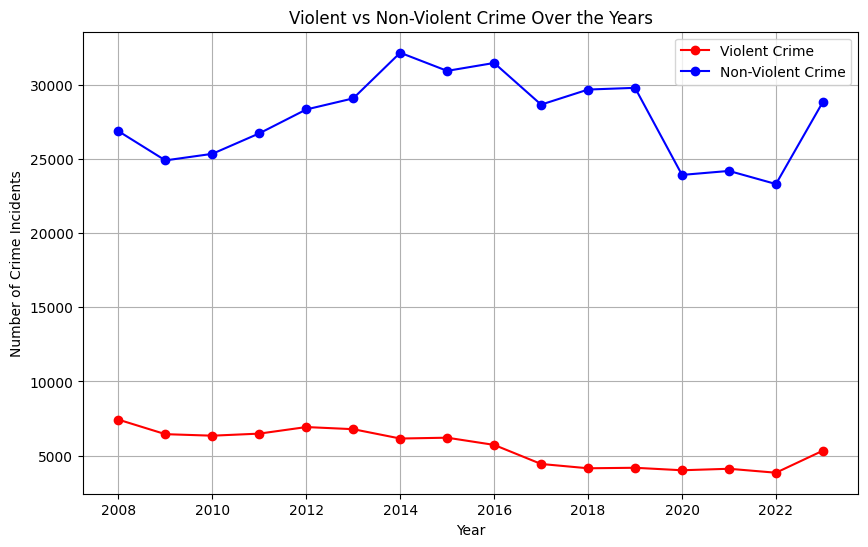

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

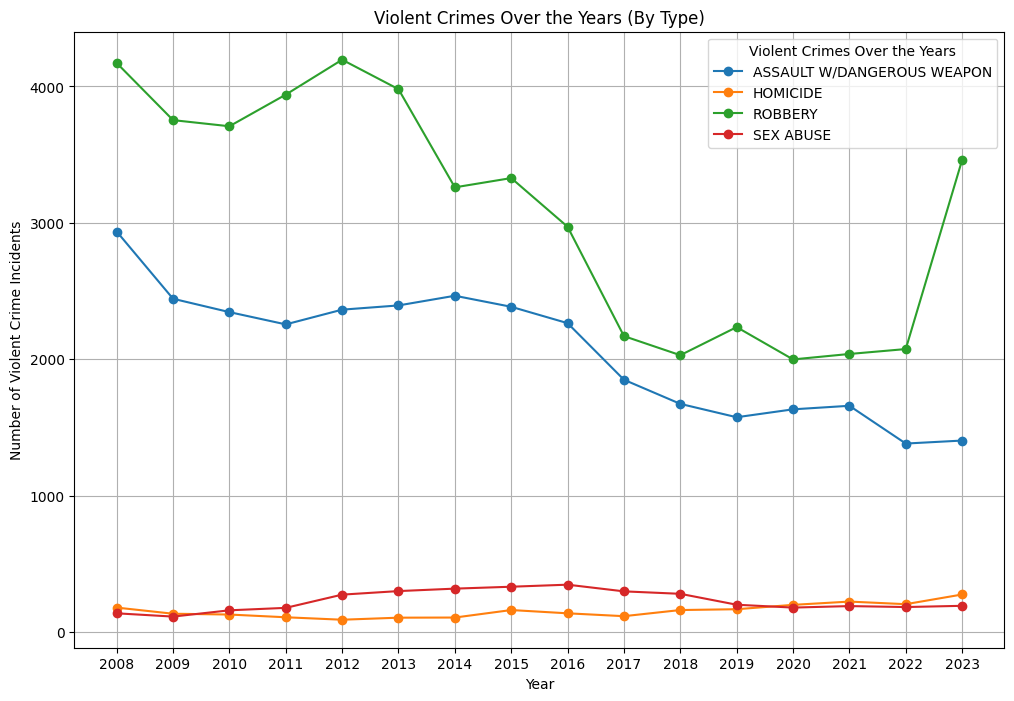

NameError: name 'non_violent_crime_by_year_offense' is not defined

<Figure size 1200x800 with 0 Axes>

In [11]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()


# Non-Violent crime over the years
violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))


for crime_type in non_violent_crime_by_year_offense.columns:
    plt.plot(non_violent_crime_by_year_offense.index, non_violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)


plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(non_violent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Type')

# Display grid
plt.grid(True)

# Show plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

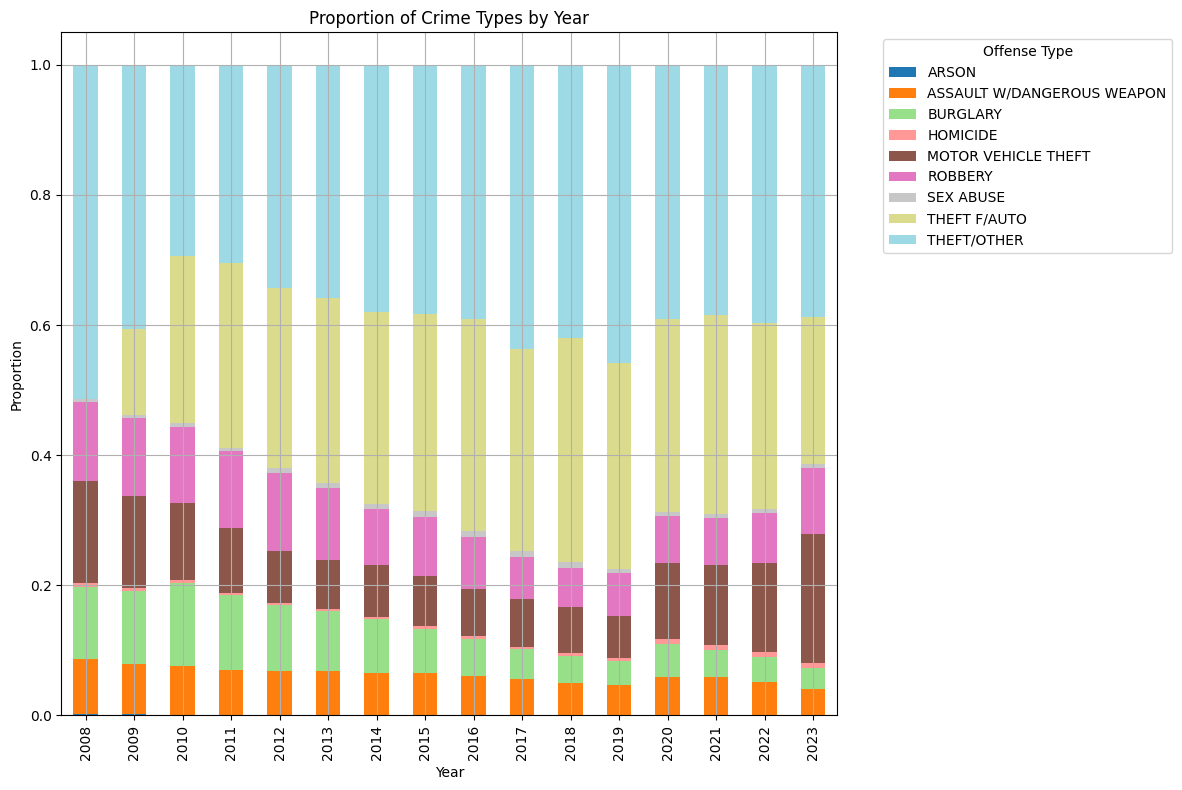

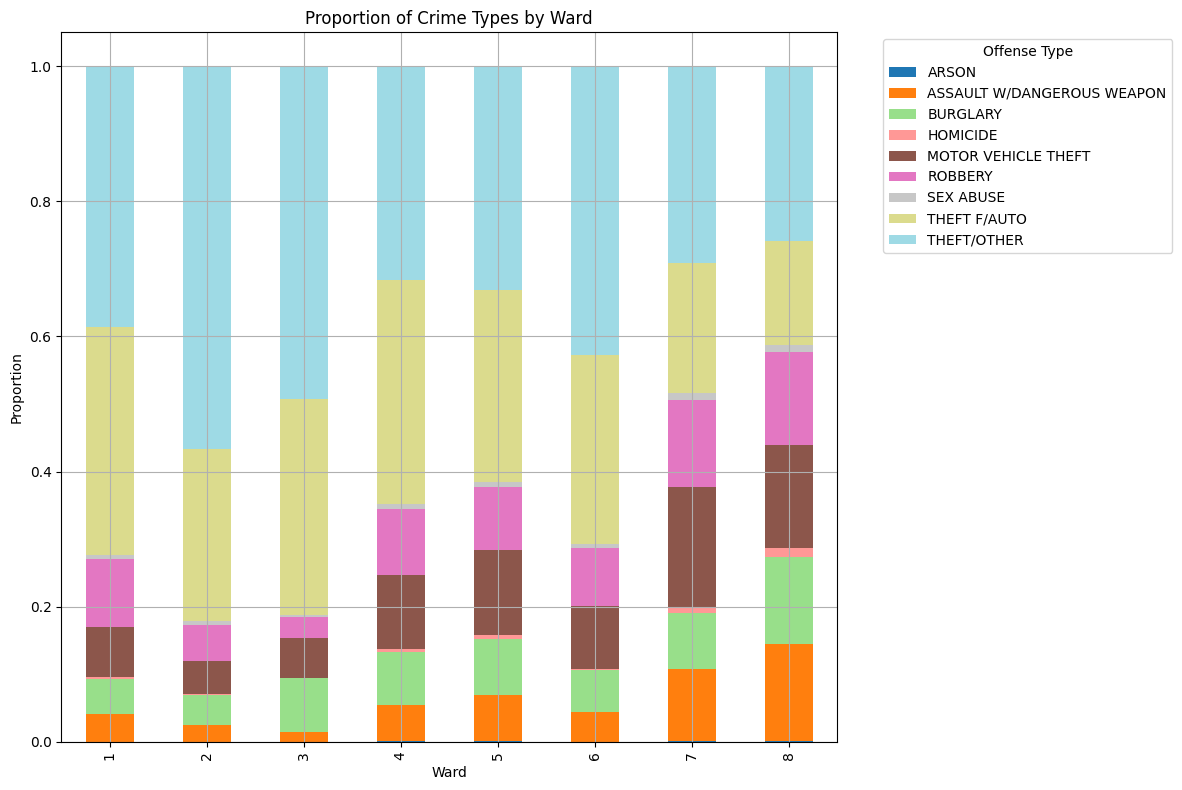

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


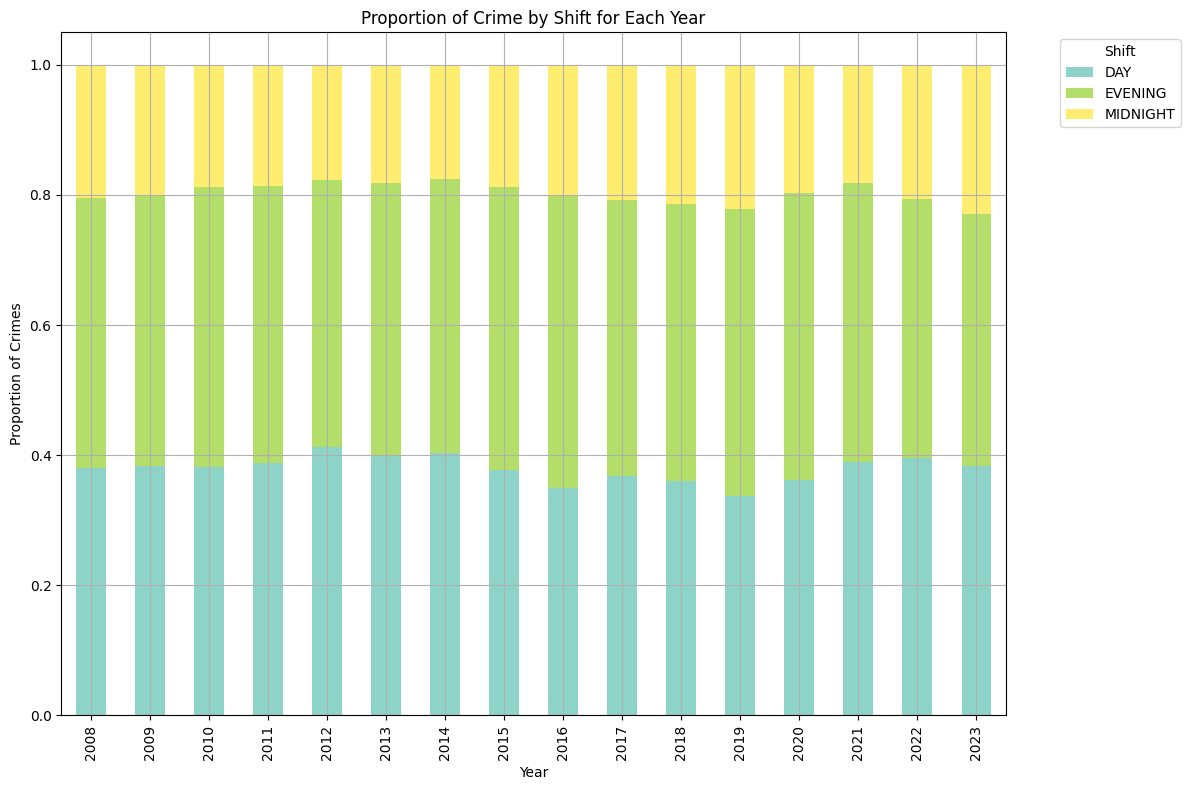

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


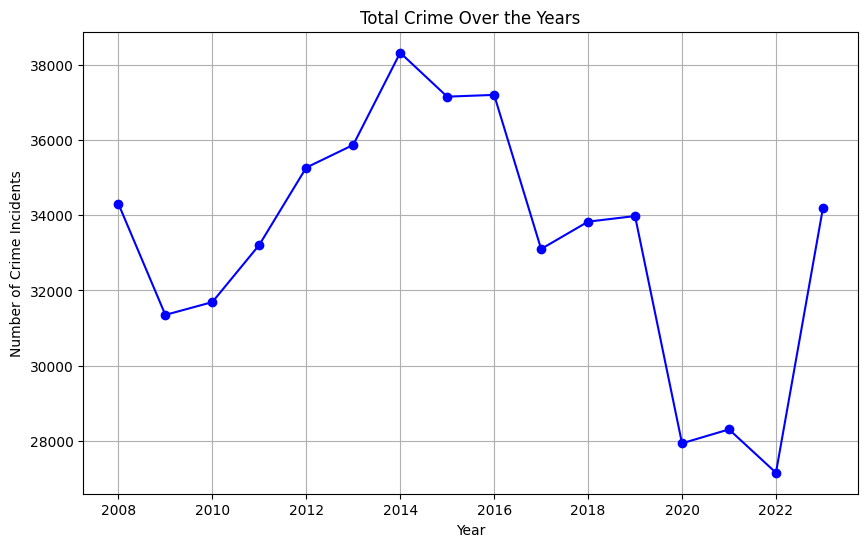

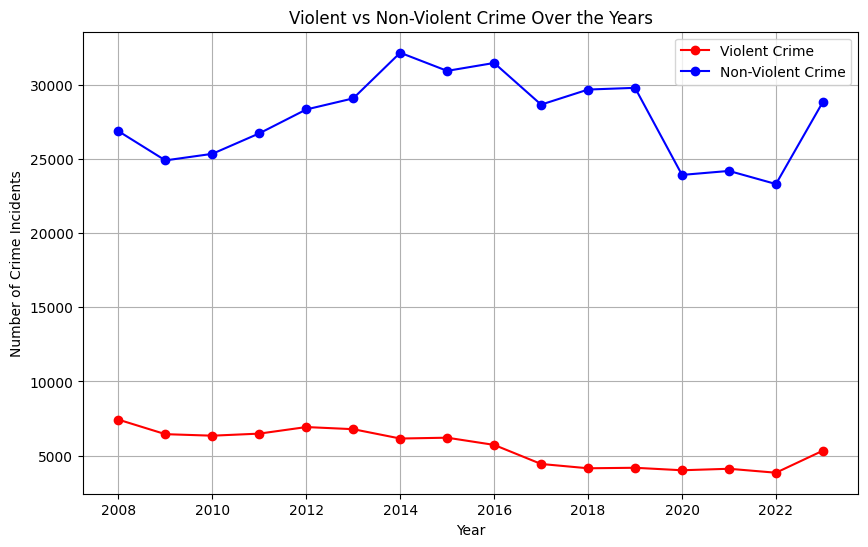

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

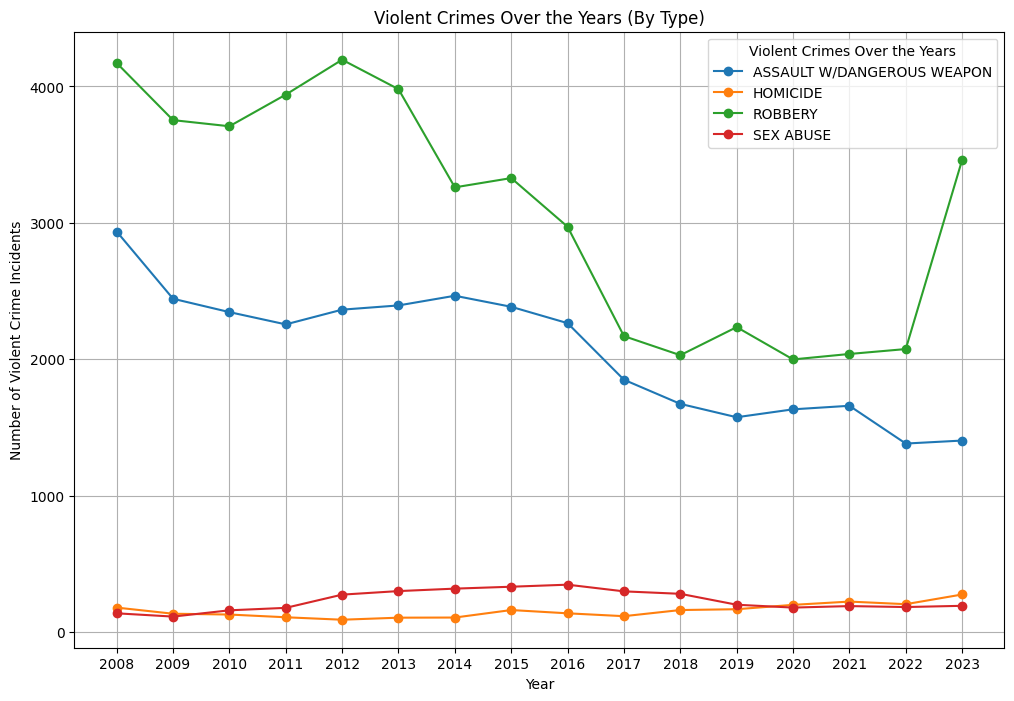

In [12]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()


# Non-Violent crime over the years
violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))


for crime_type in non_violent_crime_data.columns:
    plt.plot(non_violent_crime_data.index, non_violent_crime_data[crime_type], 
             marker='o', label=crime_type)


plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(non_violent_crime_data.index)

plt.legend(title='Non-Violent Crime Type')

# Display grid
plt.grid(True)

# Show plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

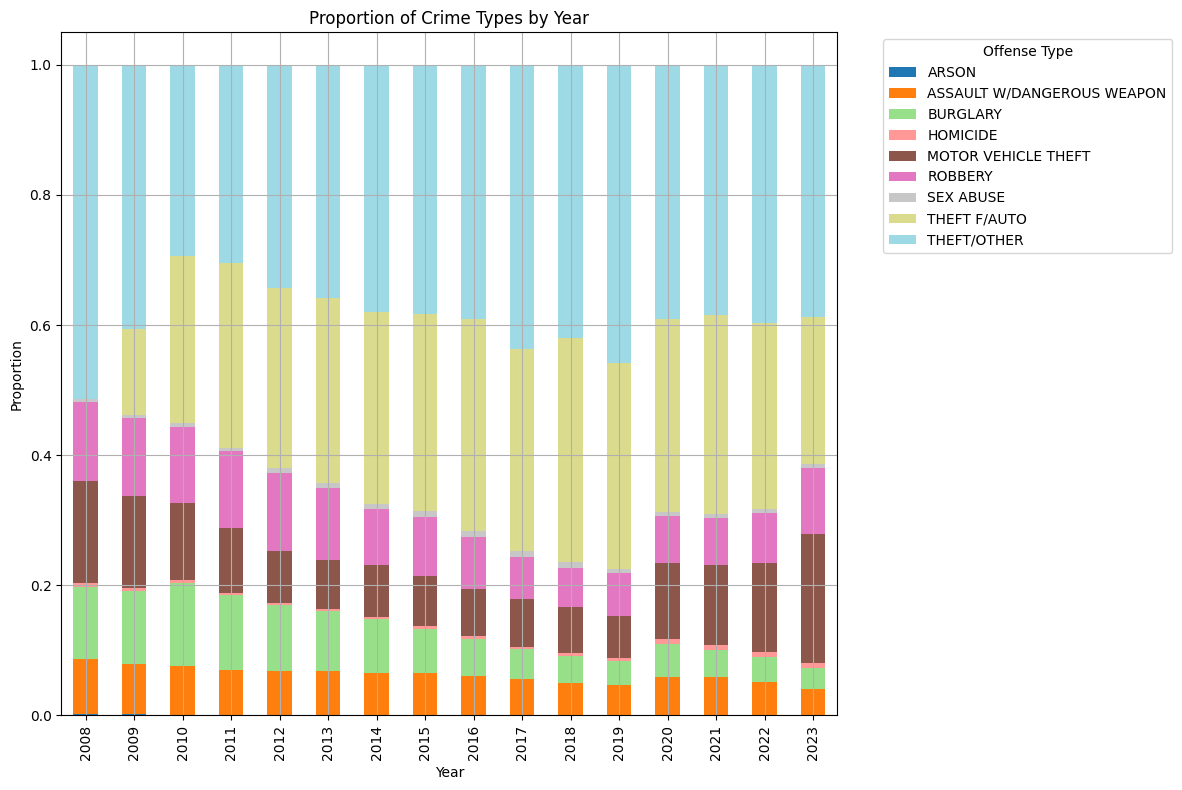

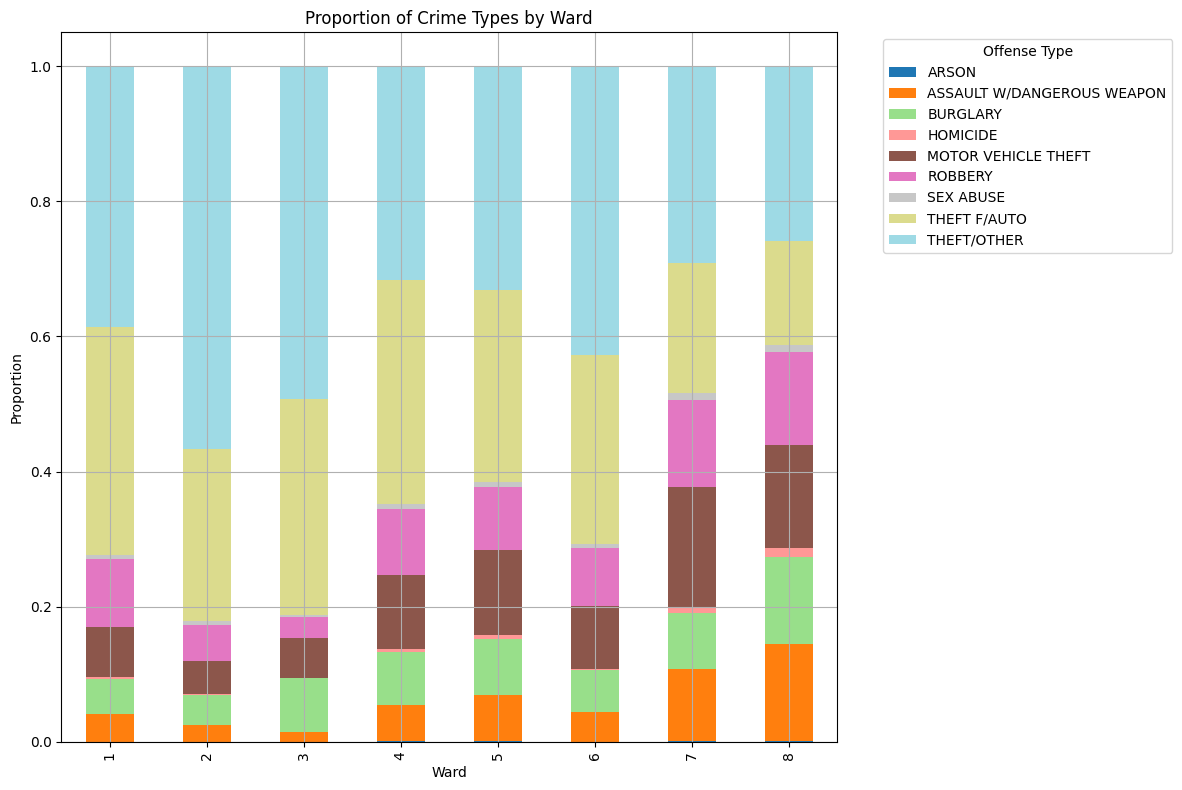

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


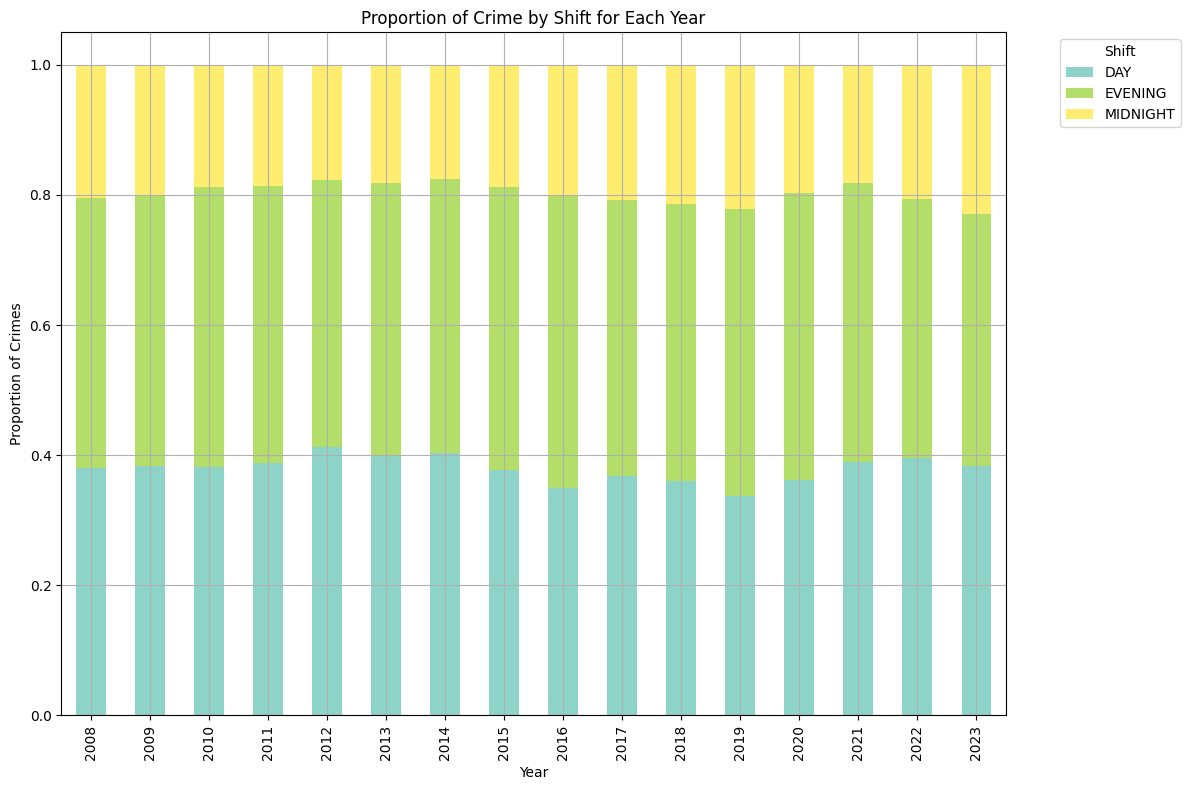

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


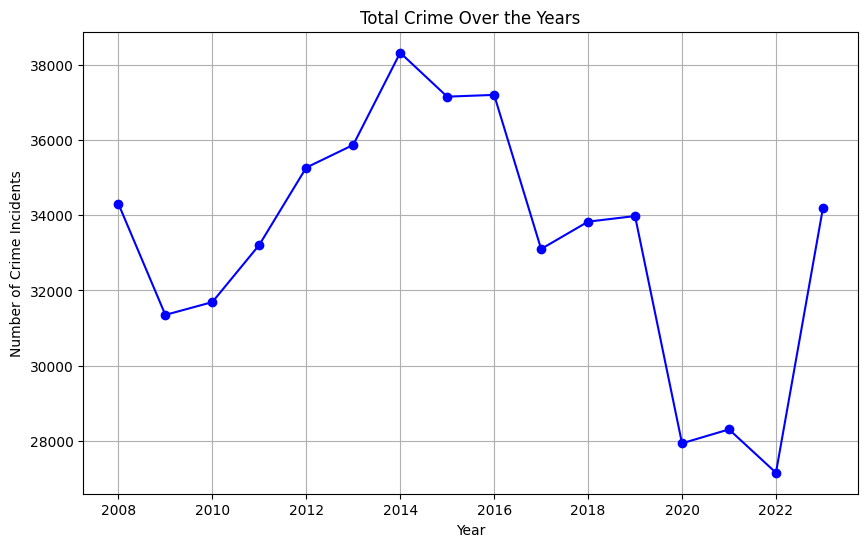

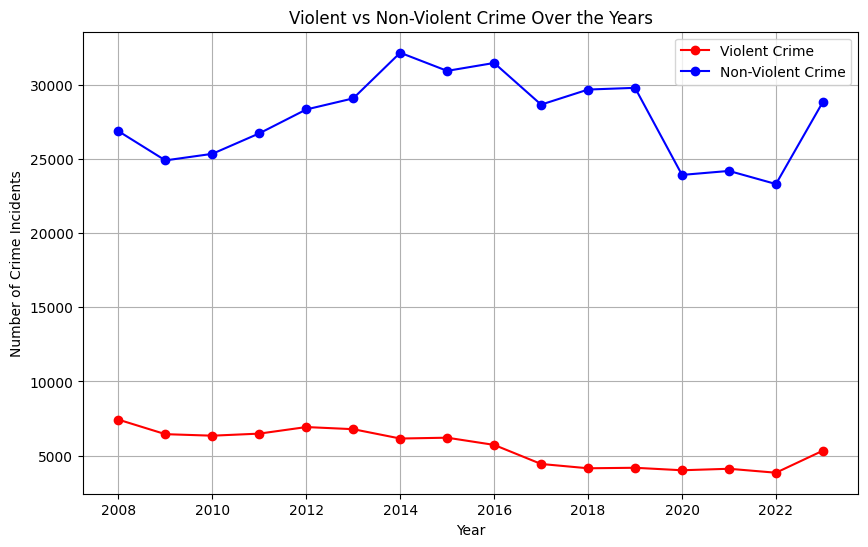

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

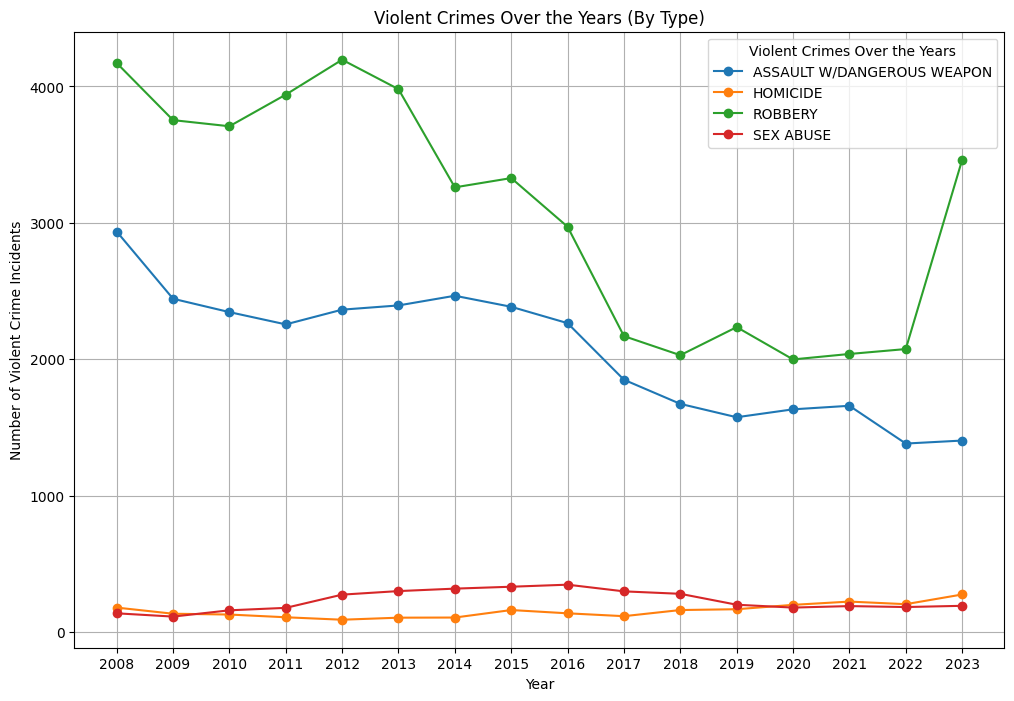

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

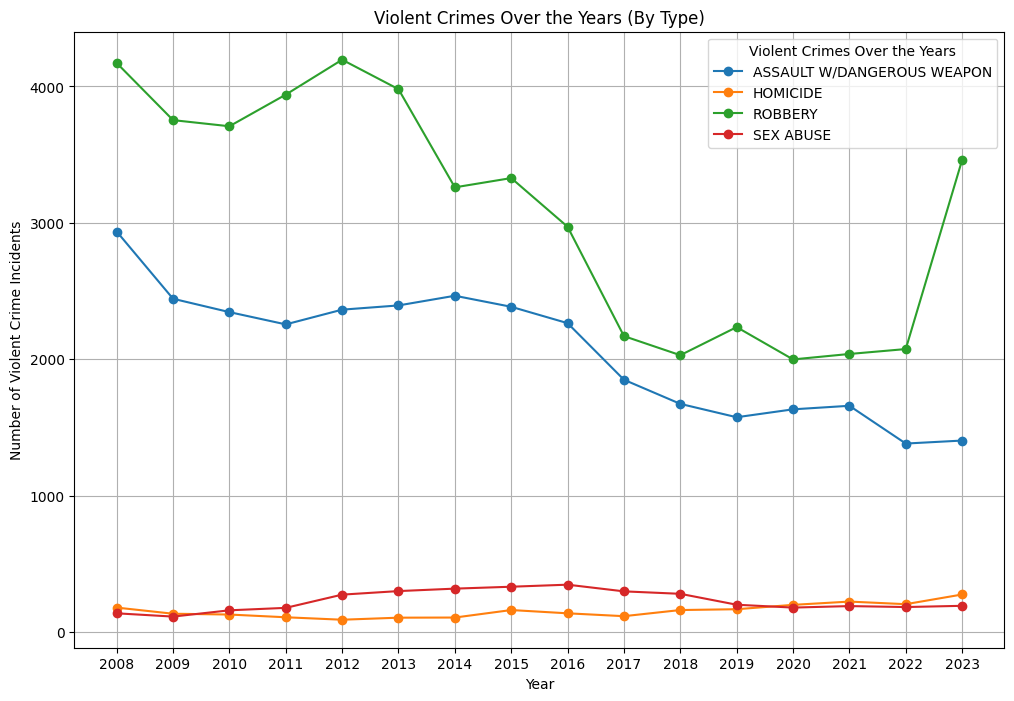

In [1]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()

Restarted Python 3.11.9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

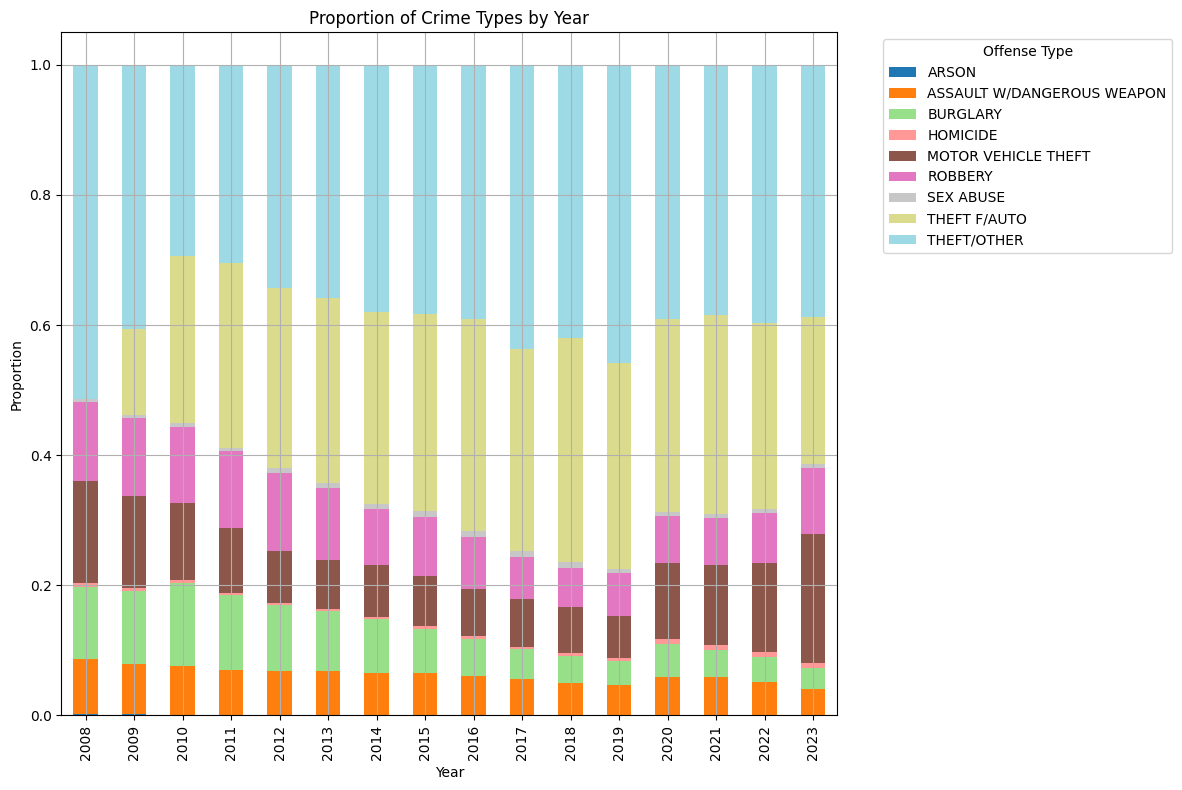

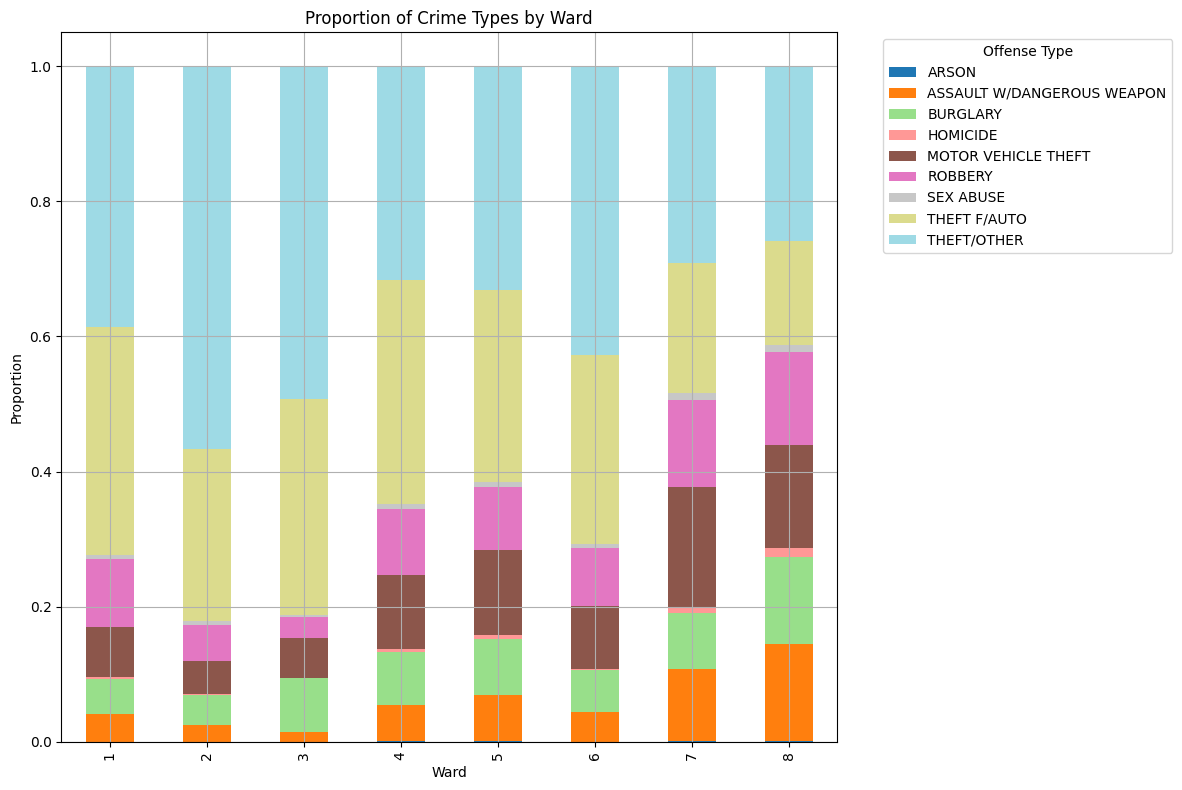

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


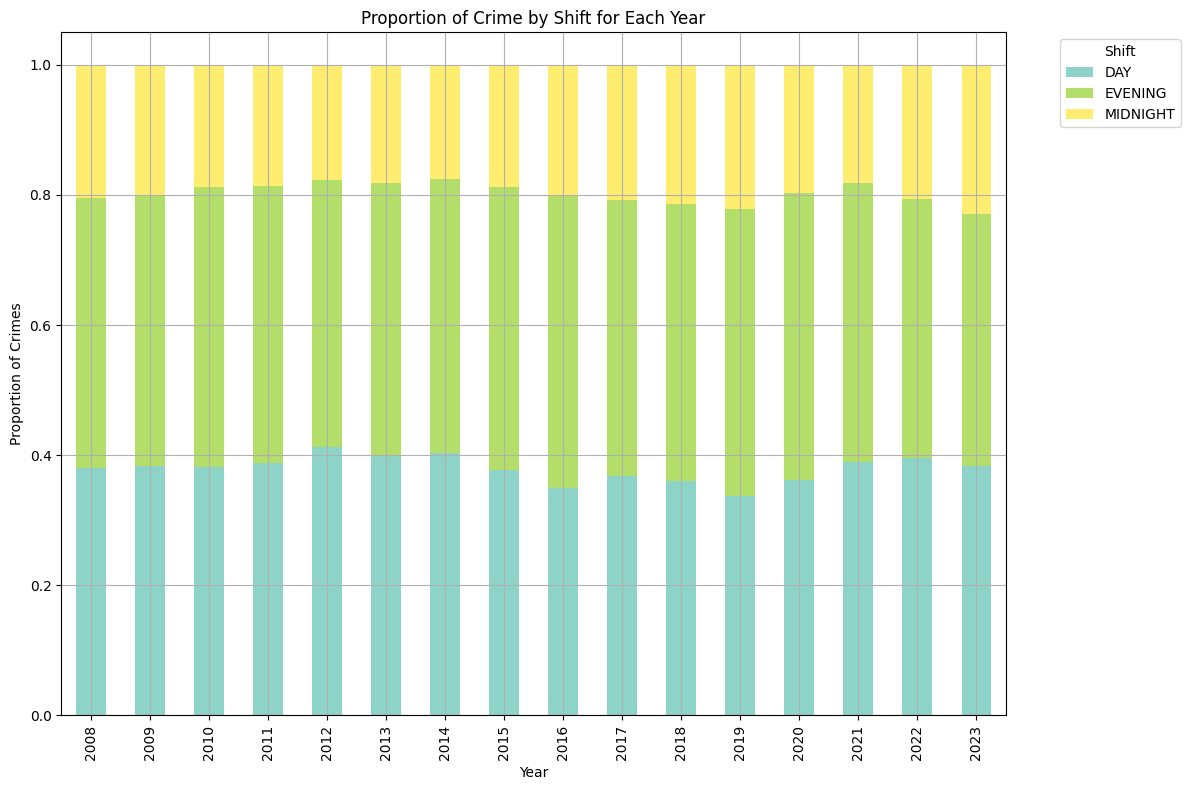

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


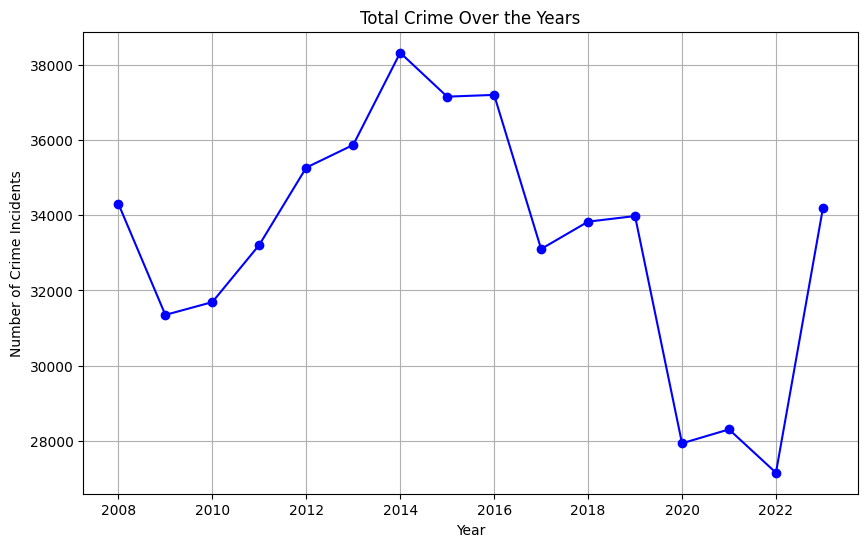

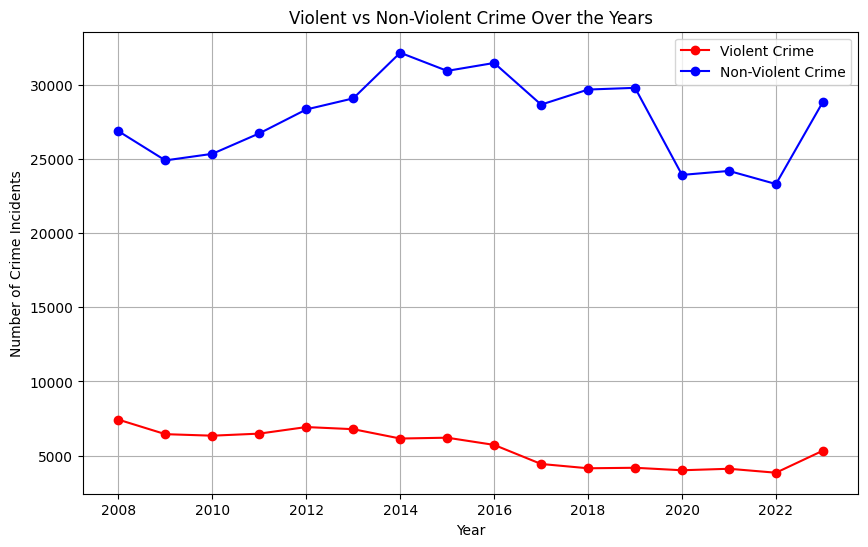

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

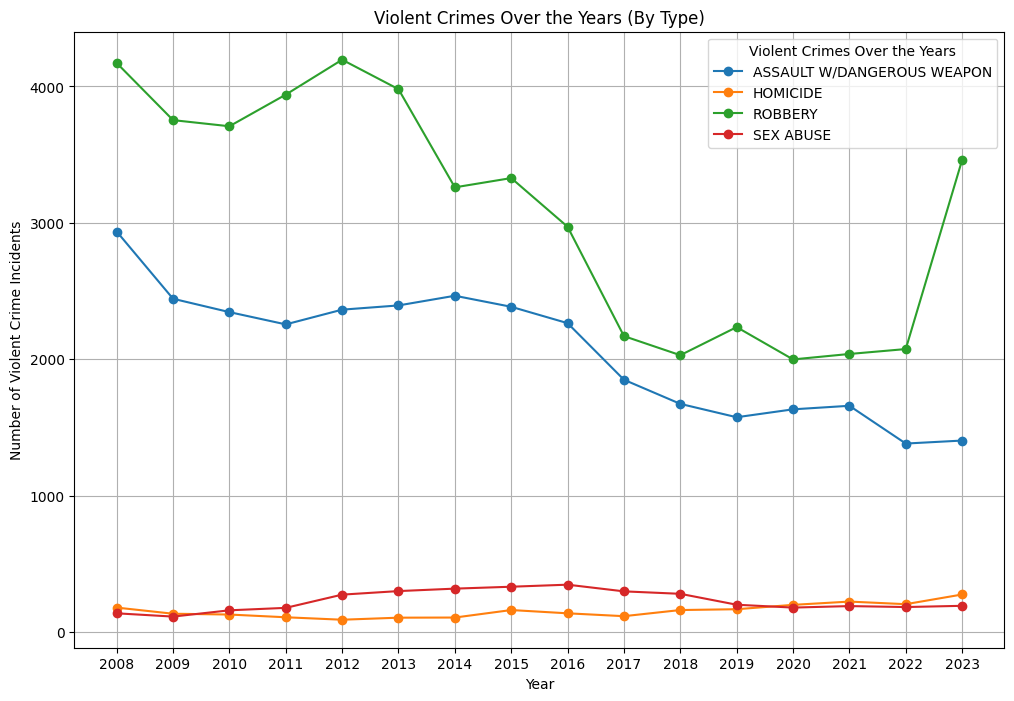

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

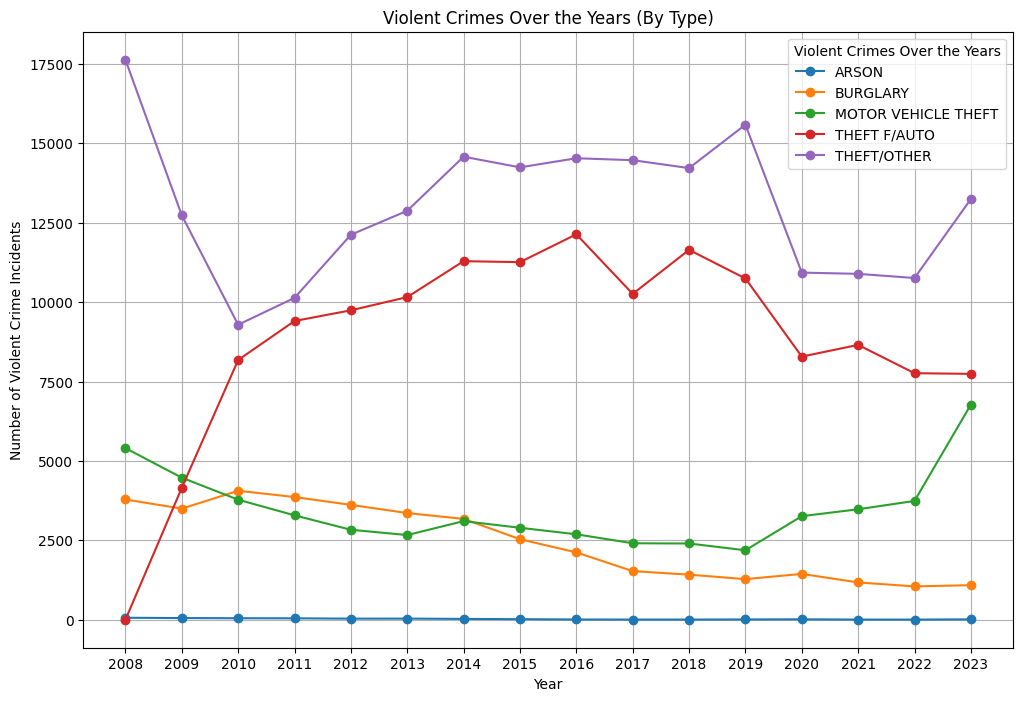

In [2]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Violent Crimes Over the Years')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

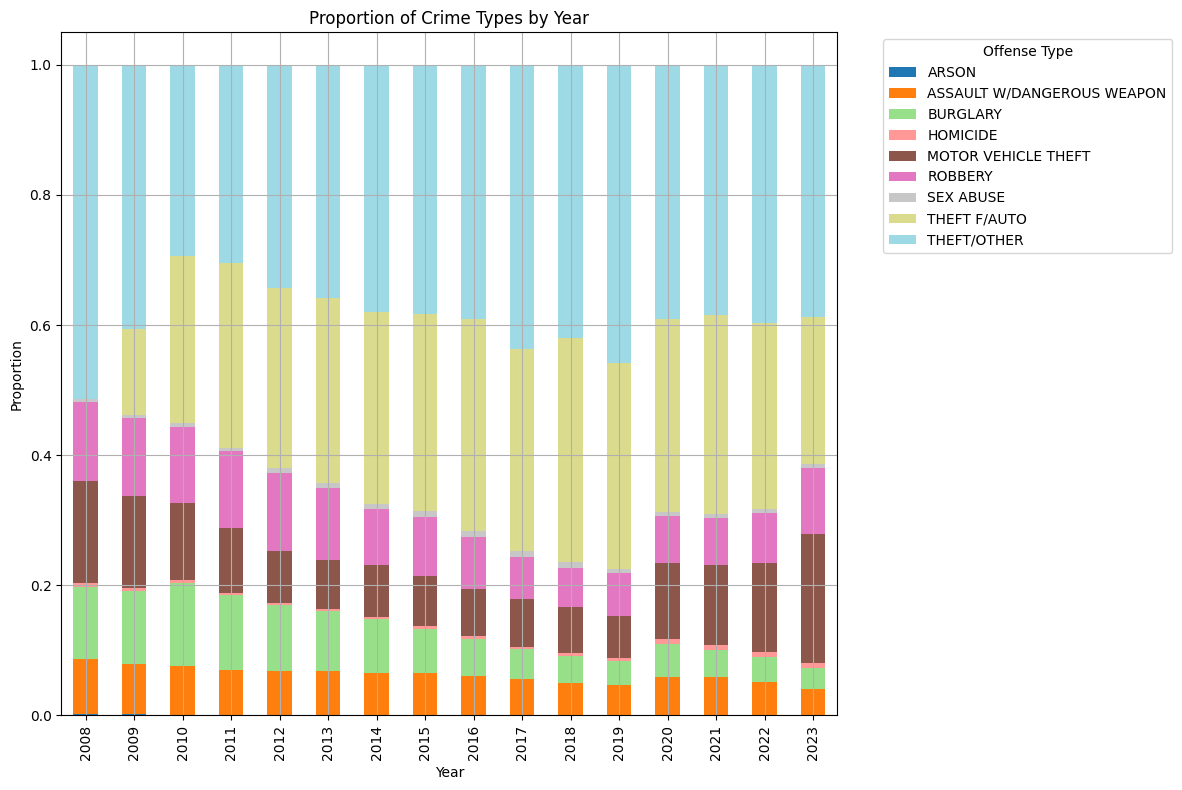

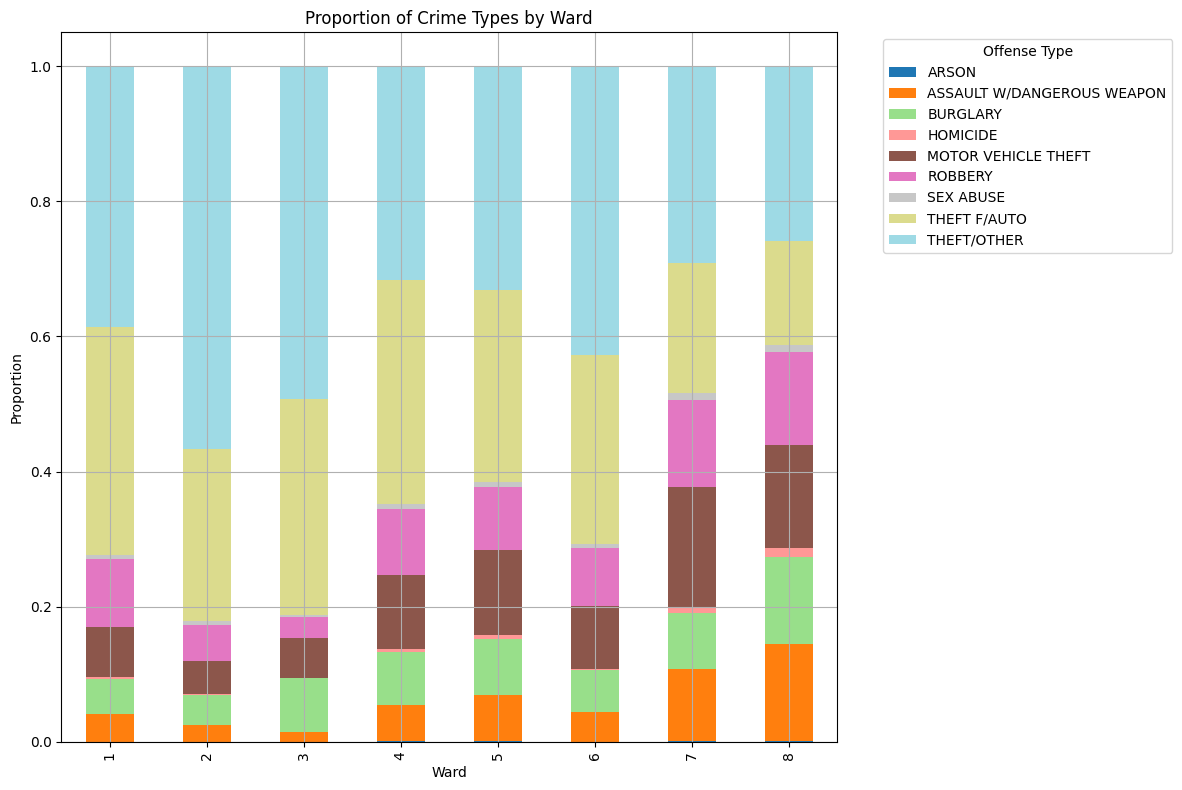

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


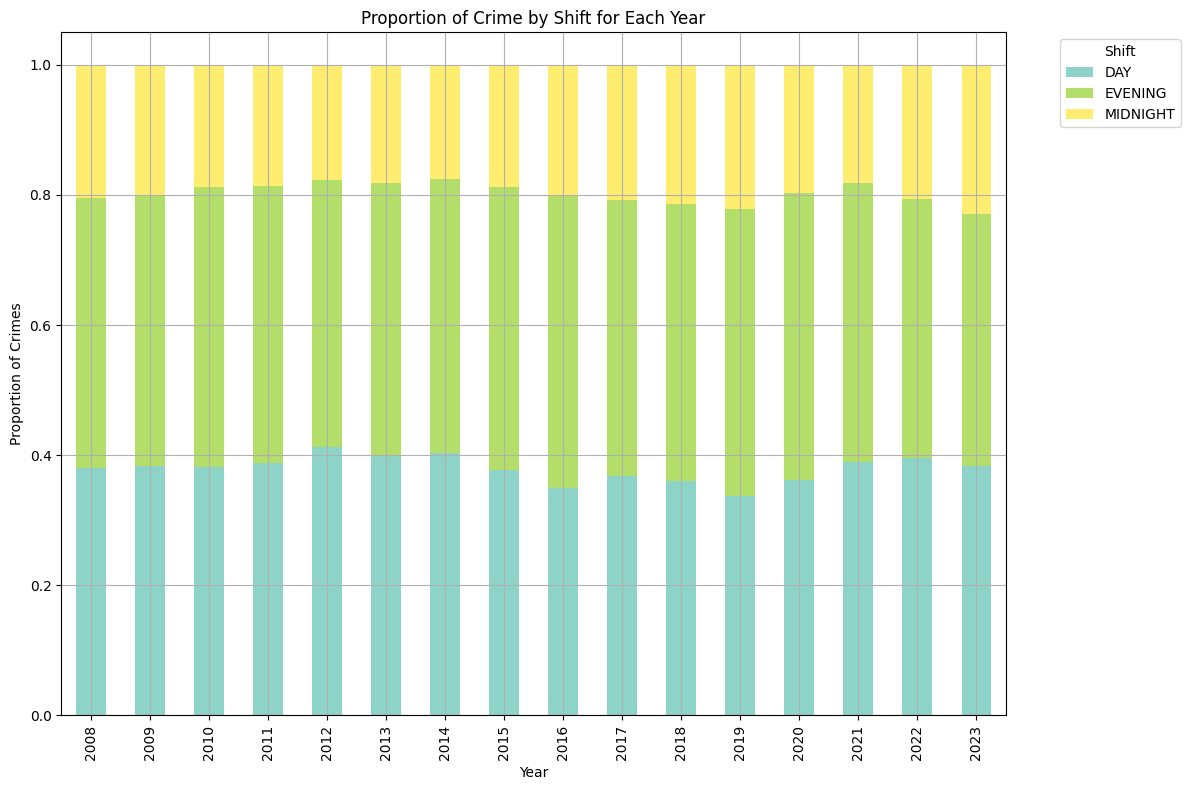

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


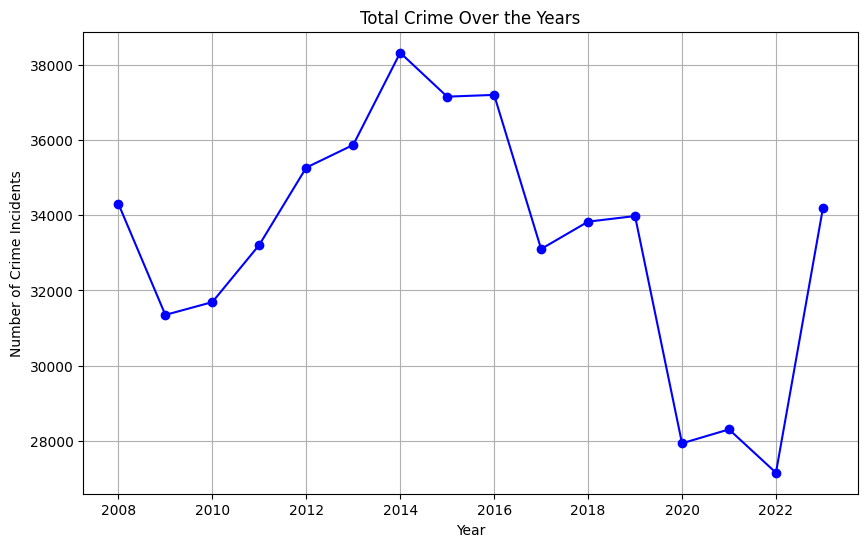

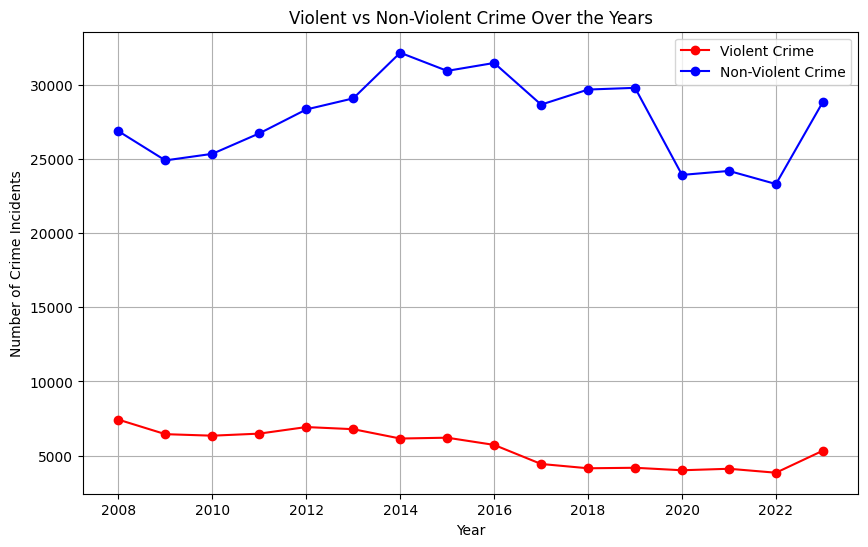

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

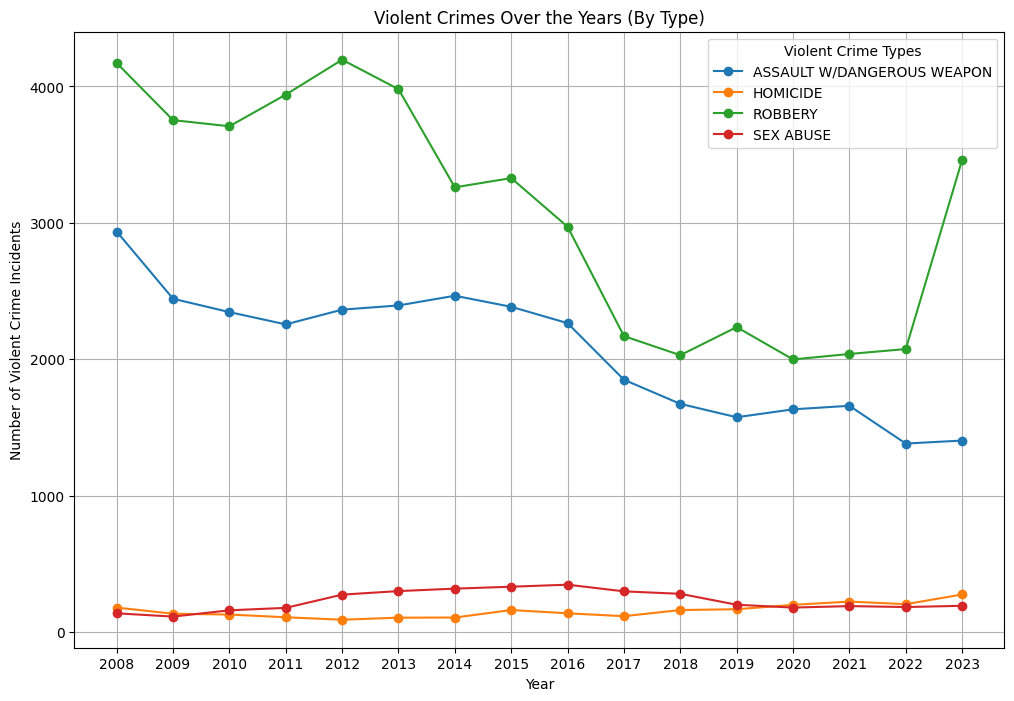

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

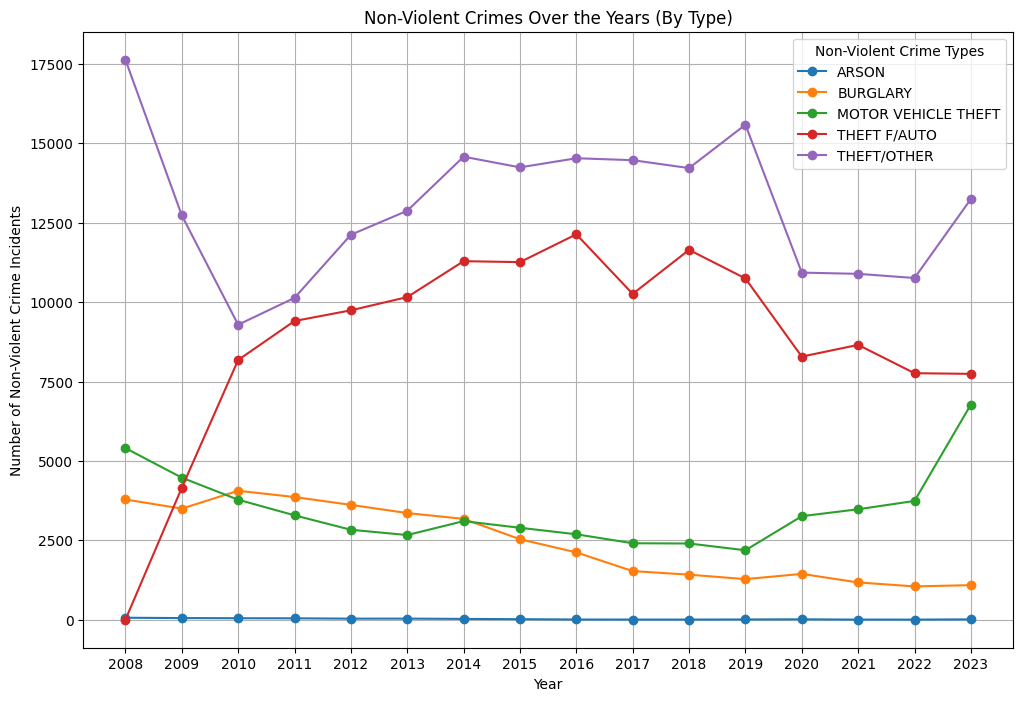

In [3]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

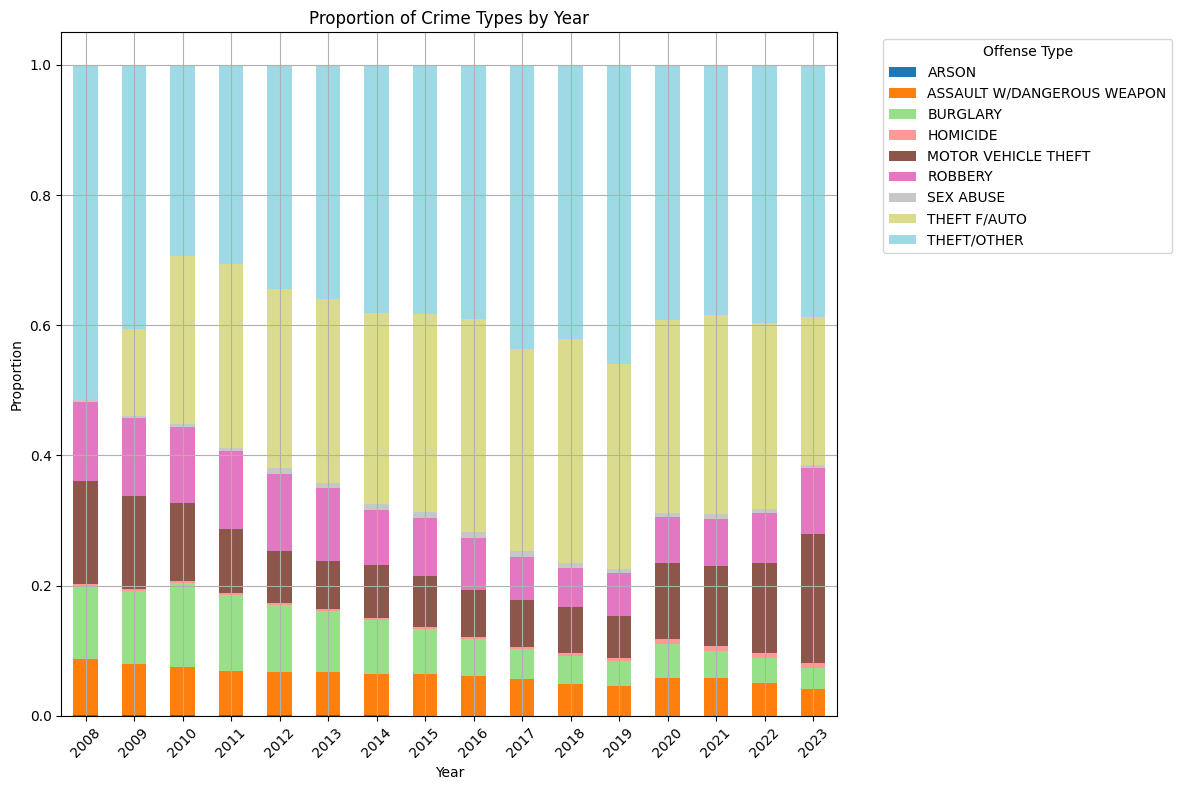

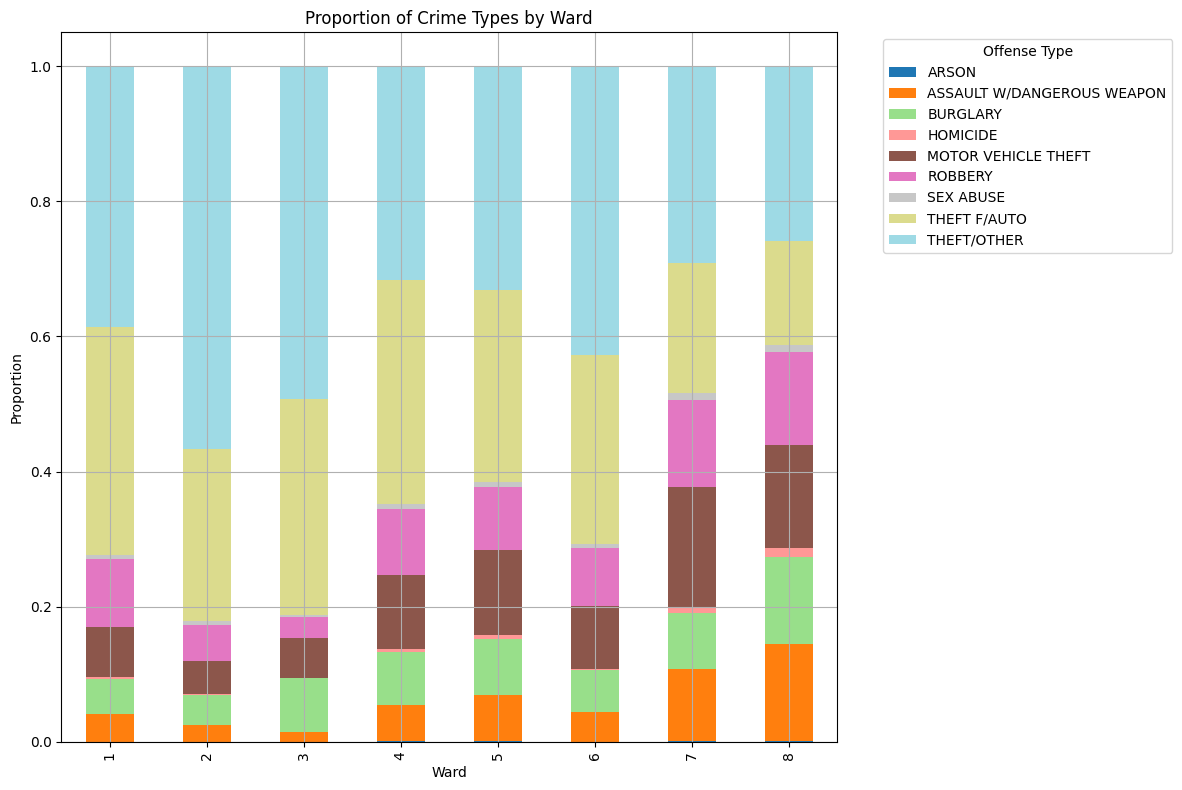

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


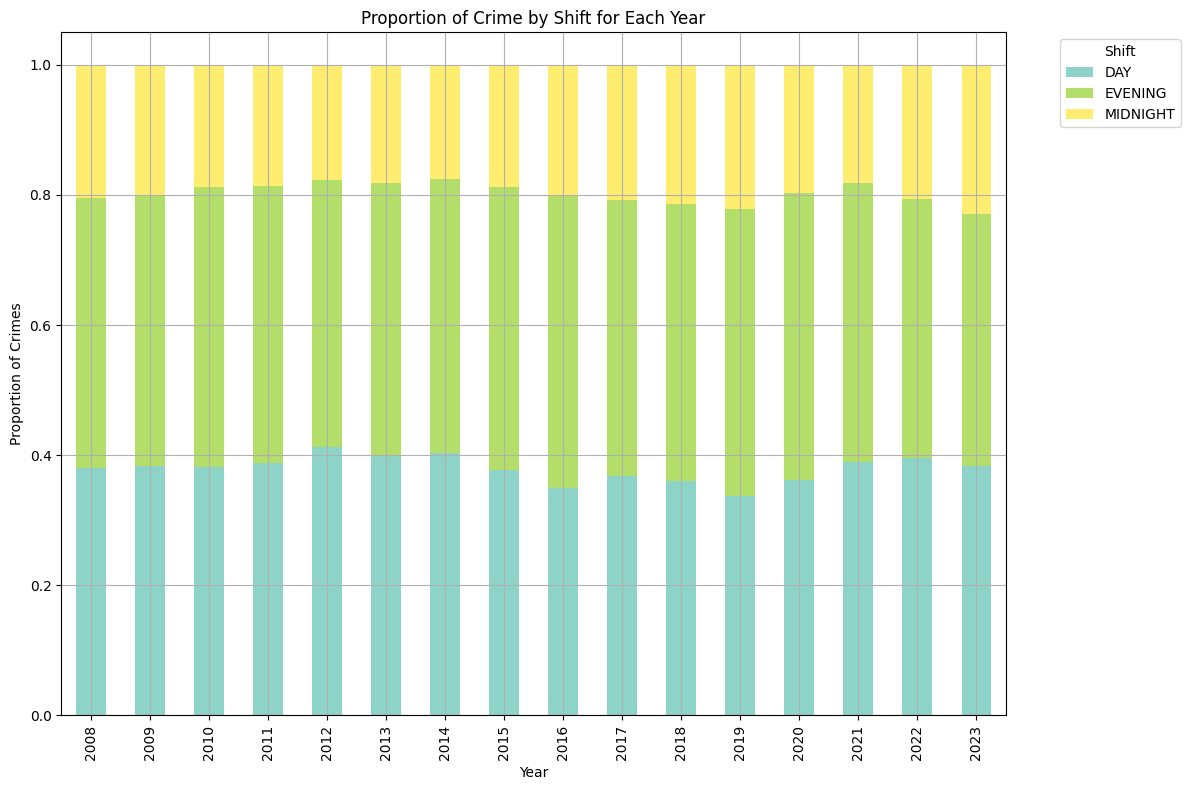

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


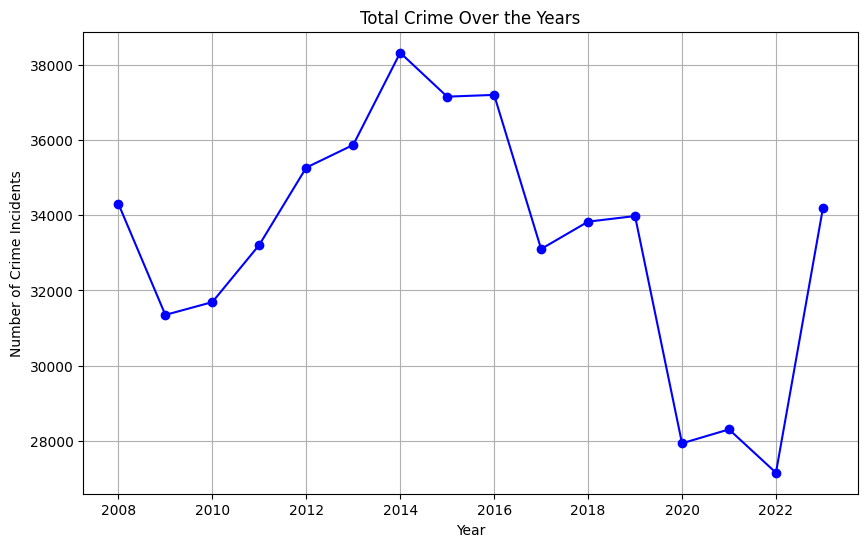

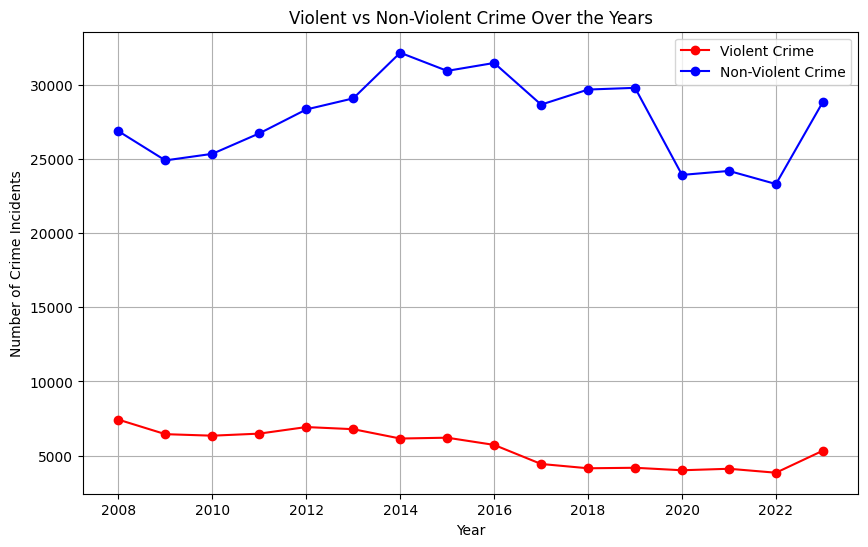

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

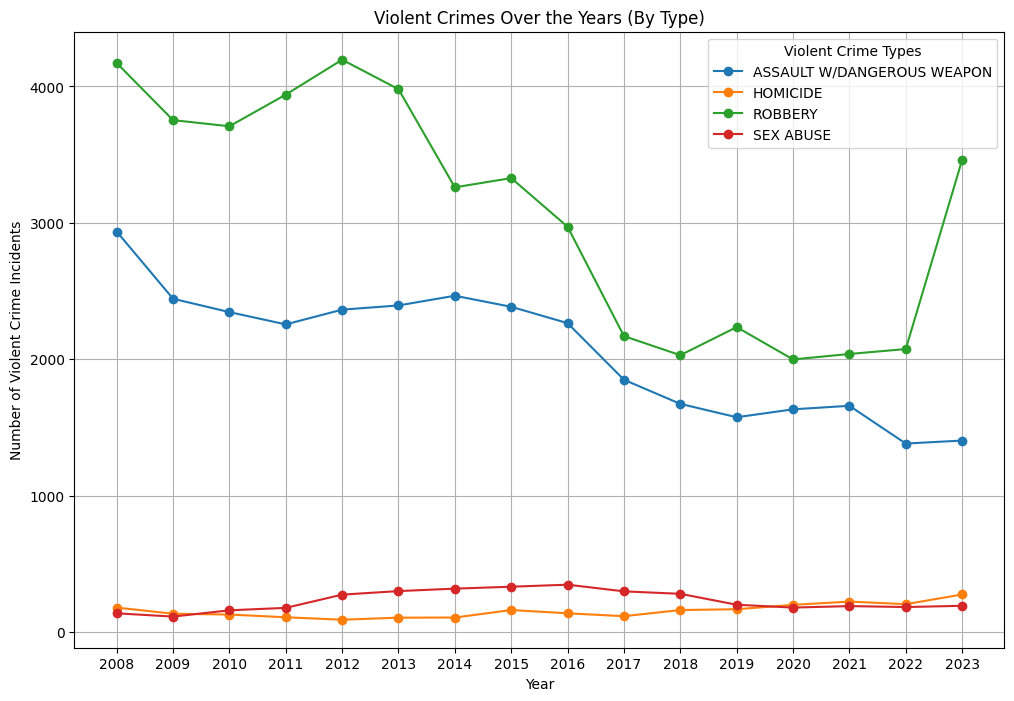

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

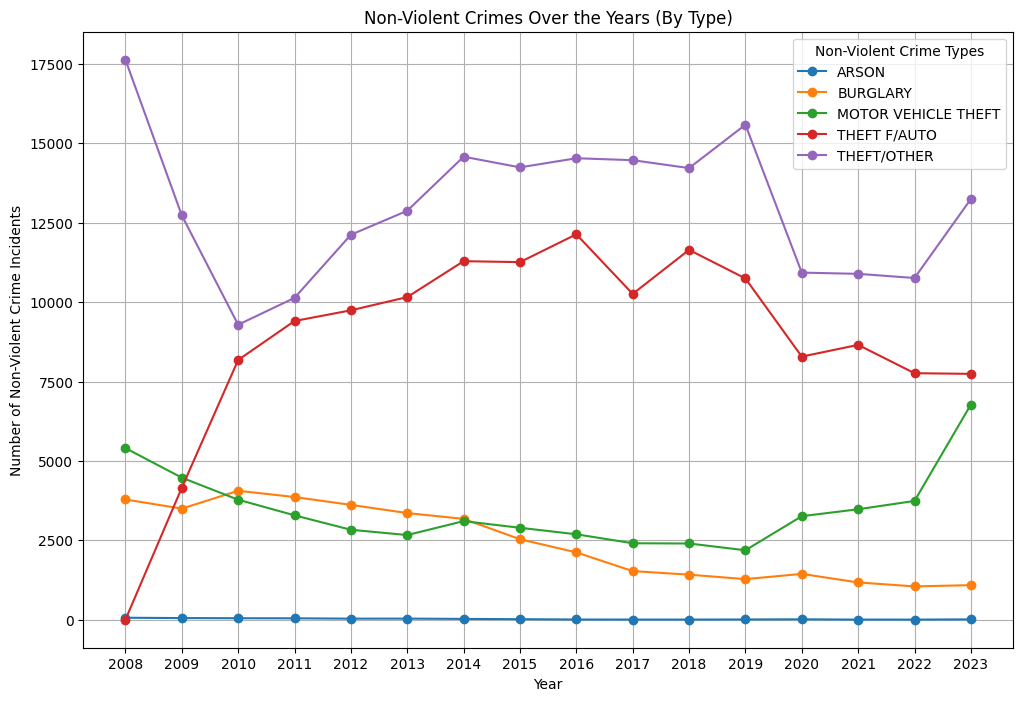

In [4]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(range(len(crime_by_year_offense.index)), crime_by_year_offense.index, rotation=45)
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

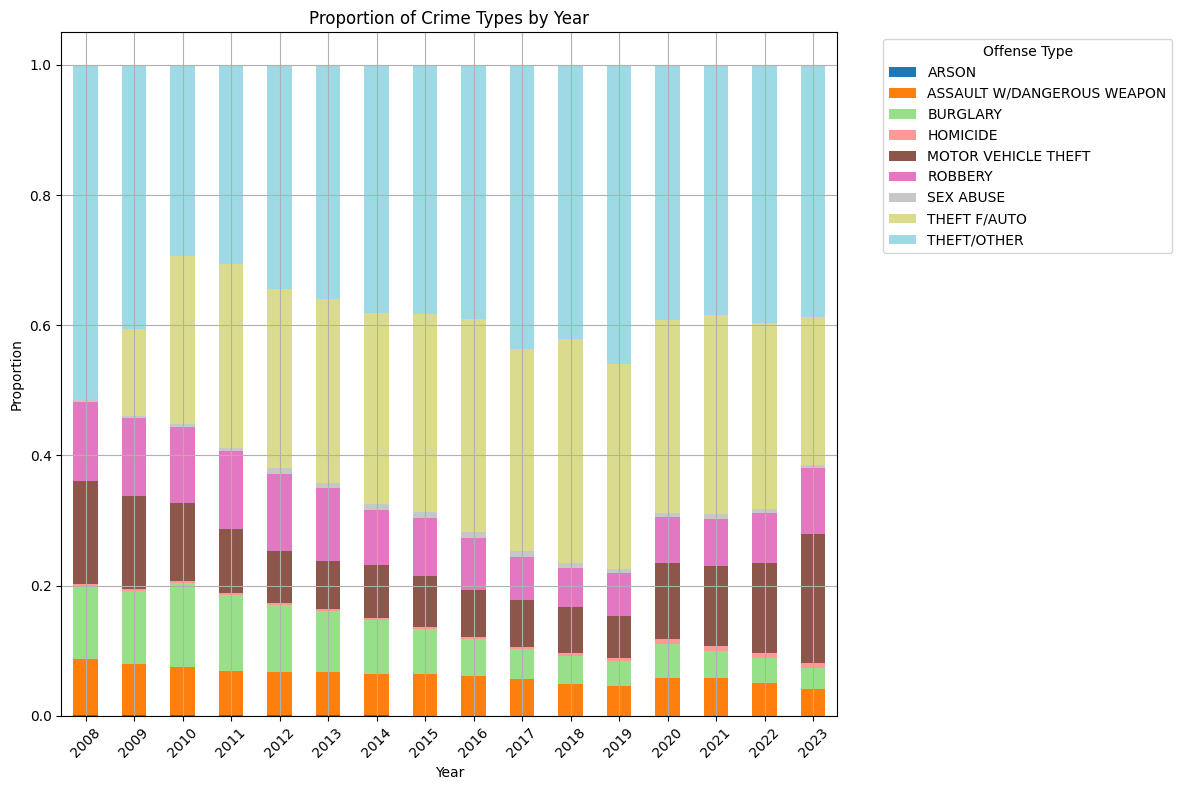

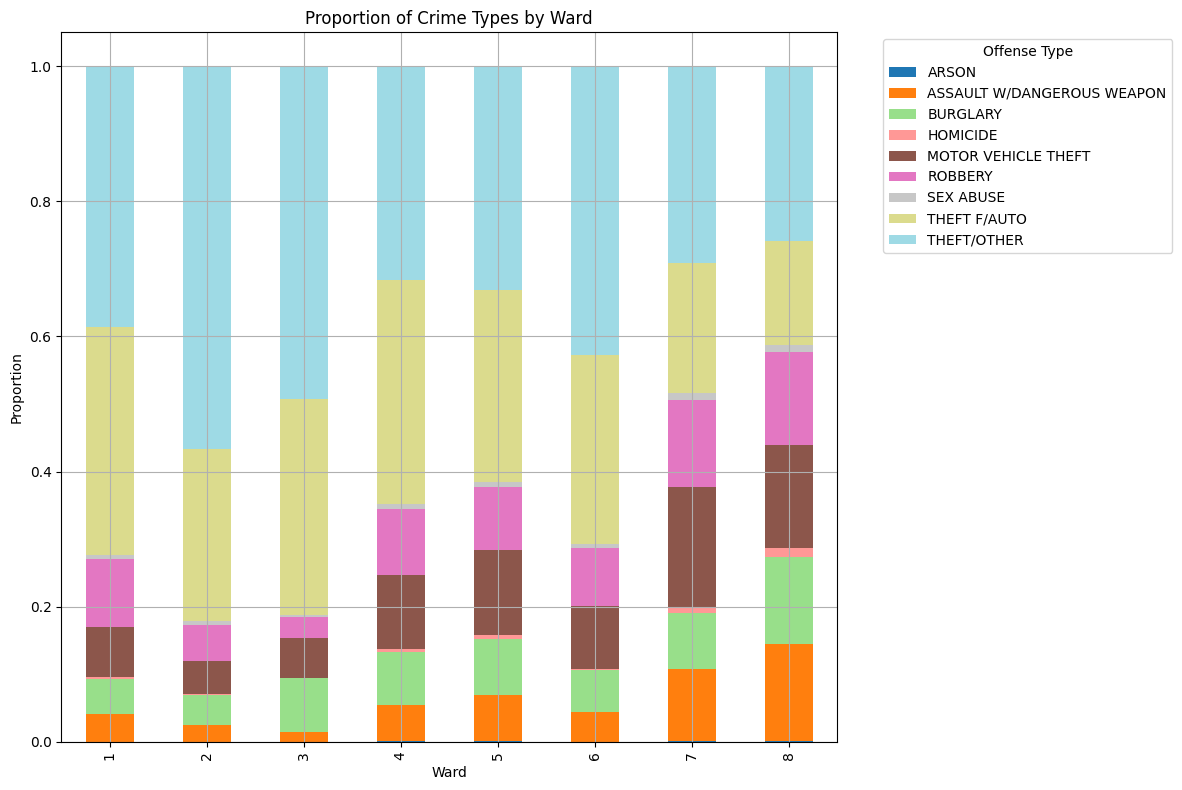

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


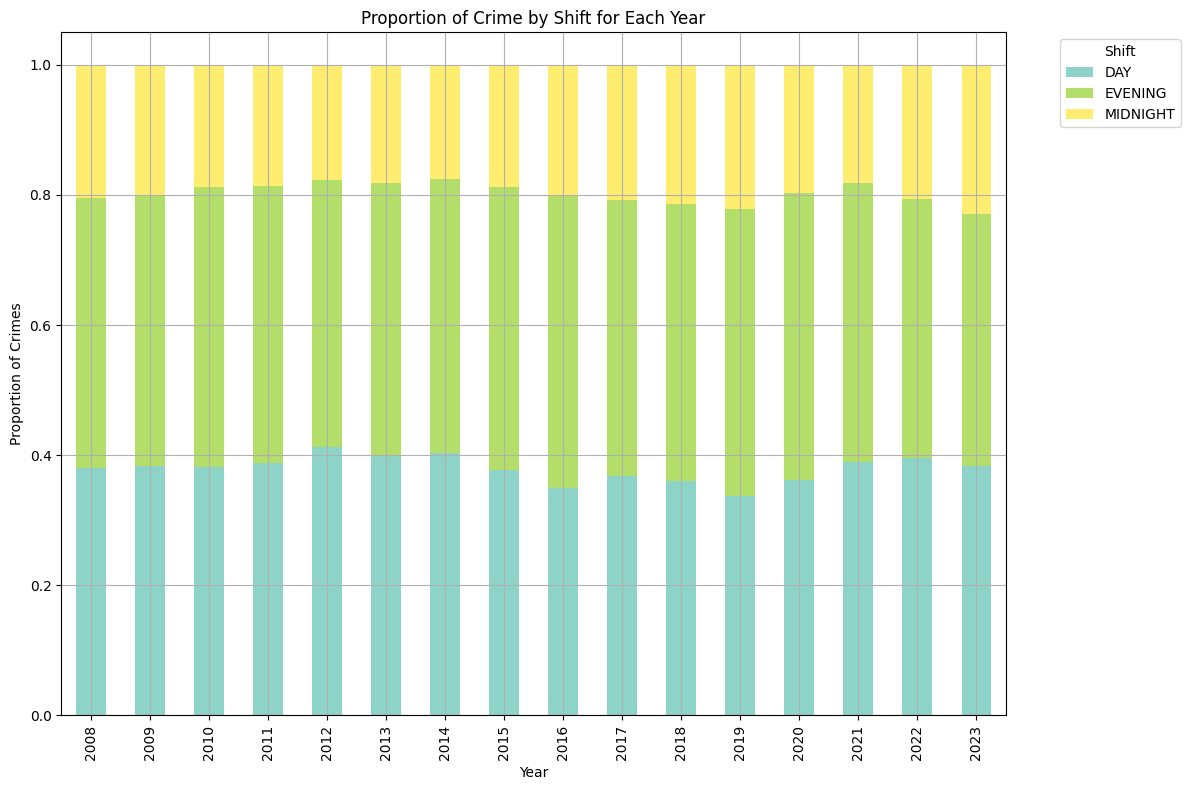

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


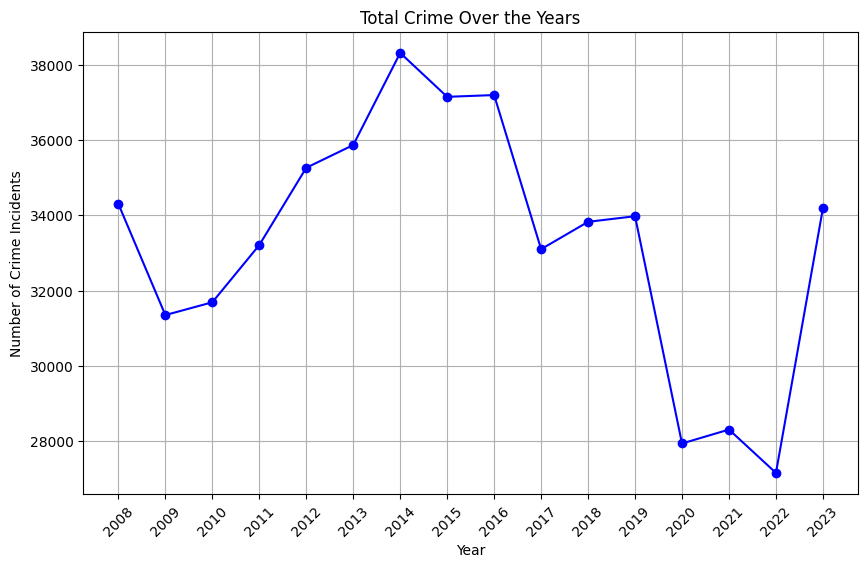

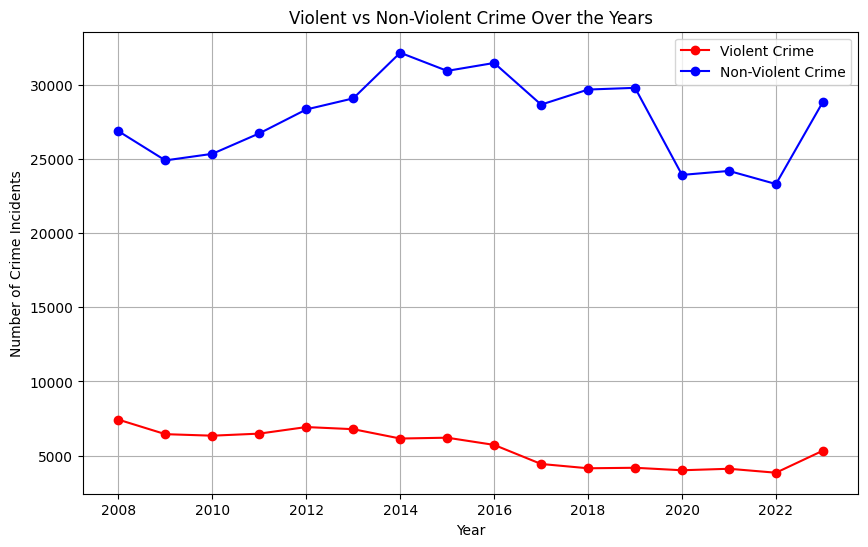

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

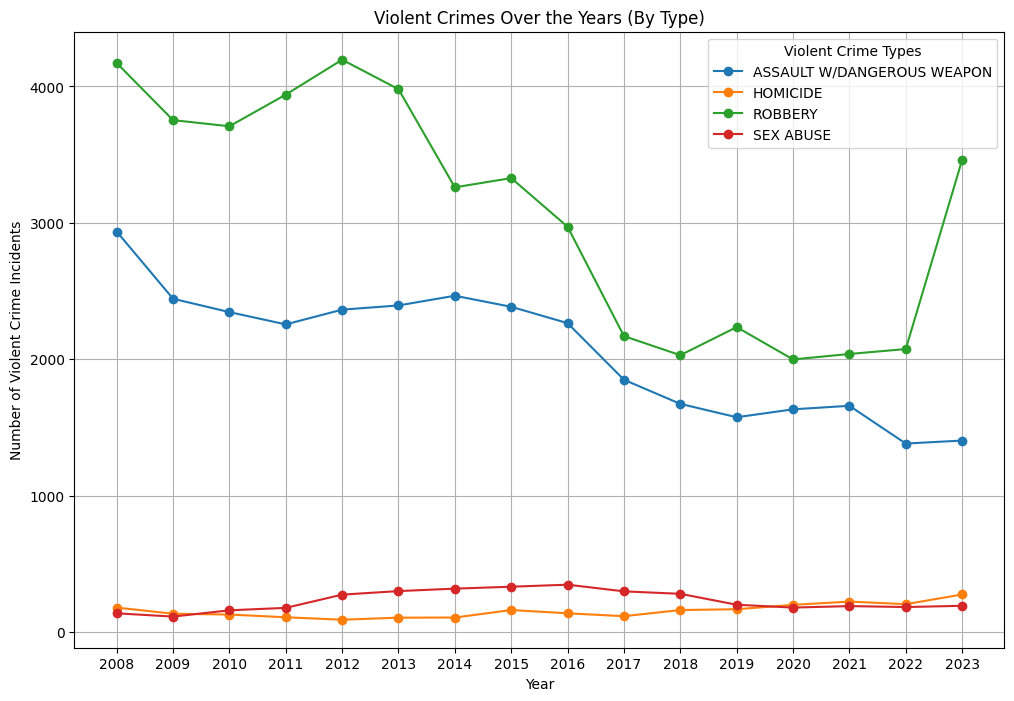

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

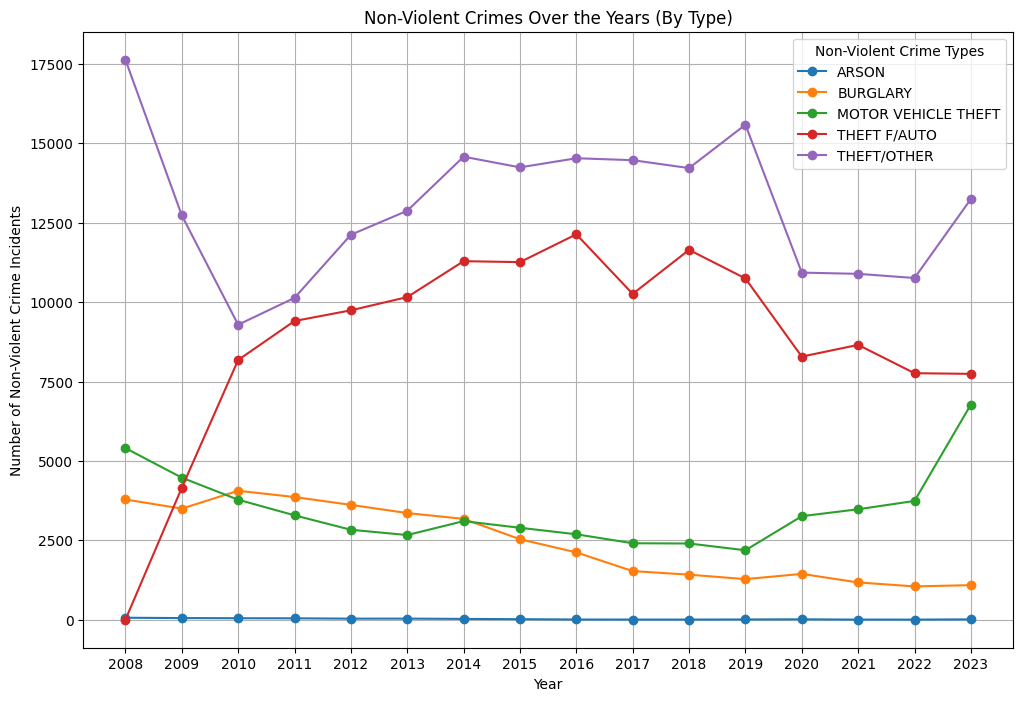

In [5]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(range(len(crime_by_year_offense.index)), crime_by_year_offense.index, rotation=45)
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(crime_by_year.index, rotation=45)
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')

plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

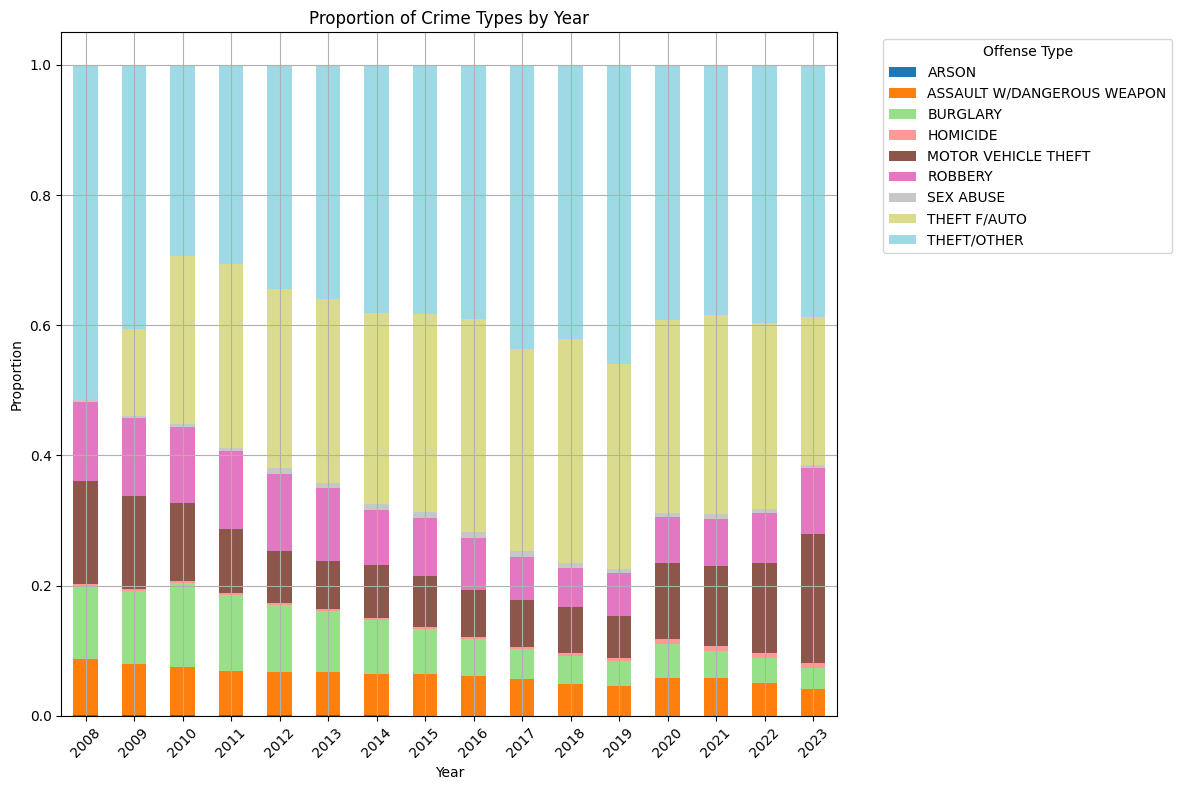

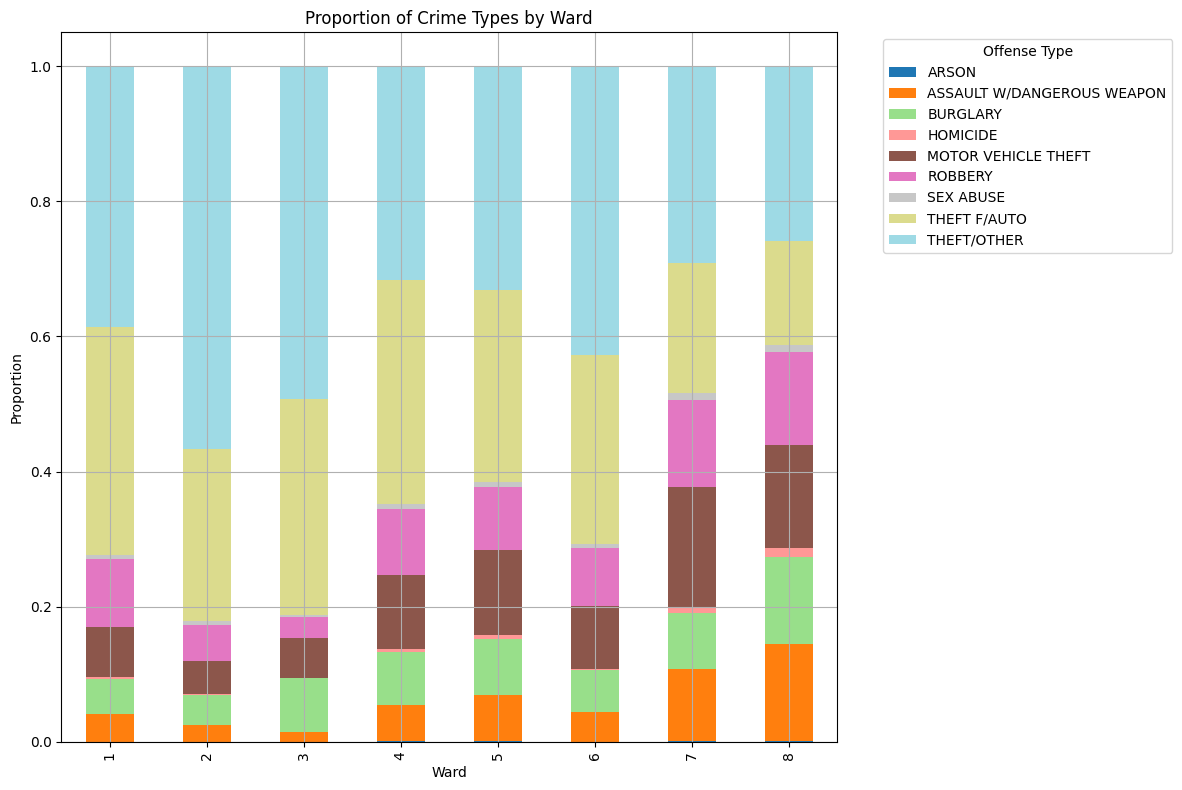

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


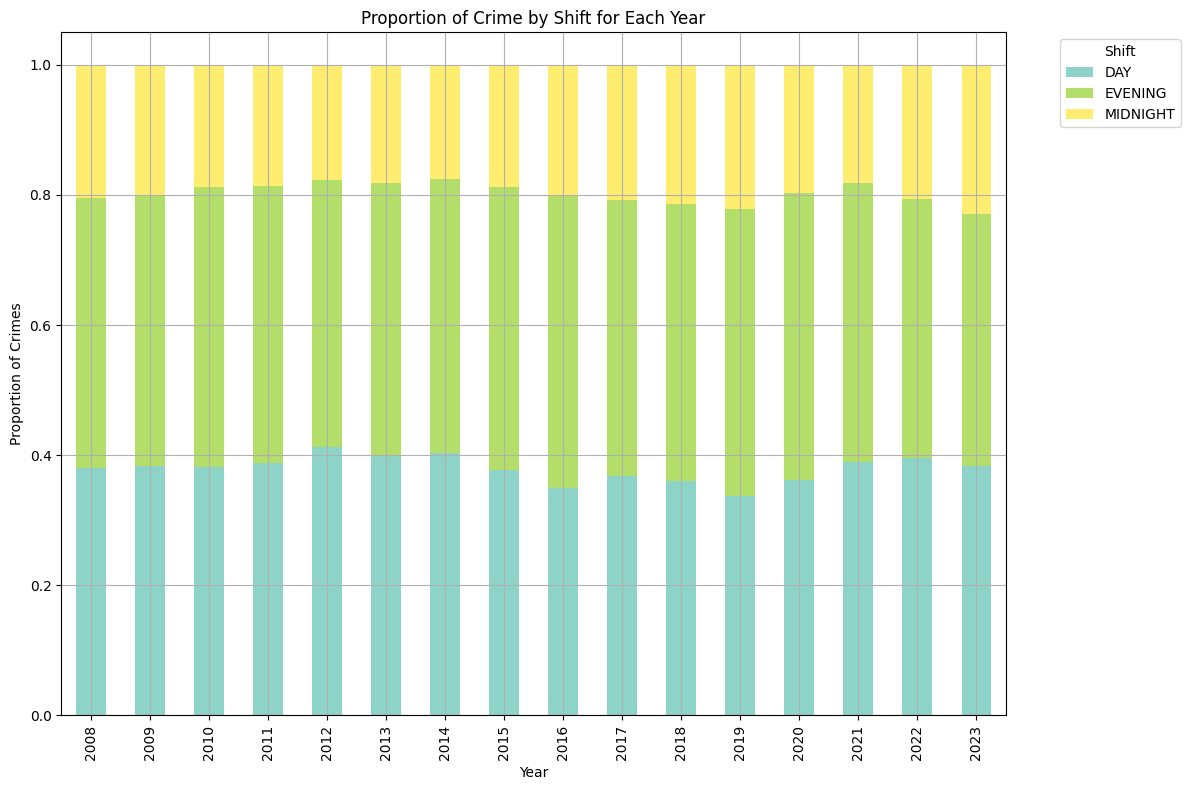

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


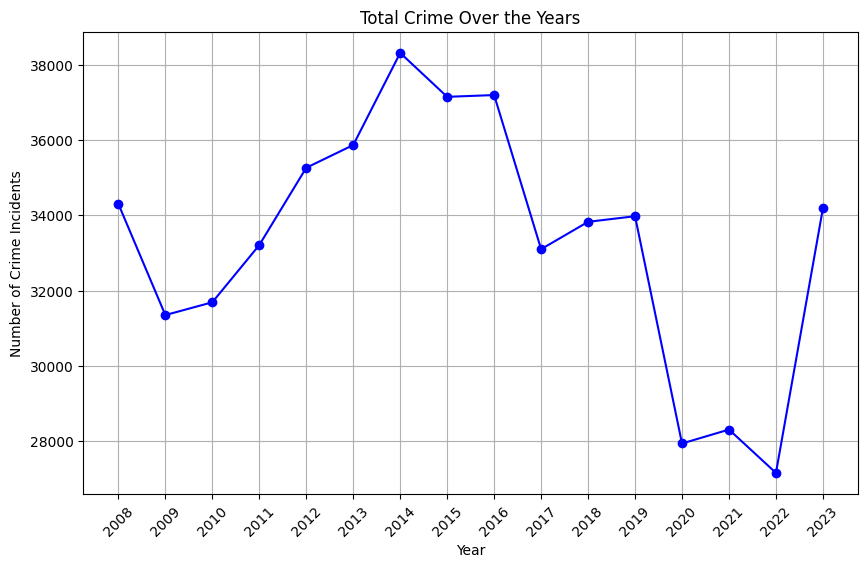

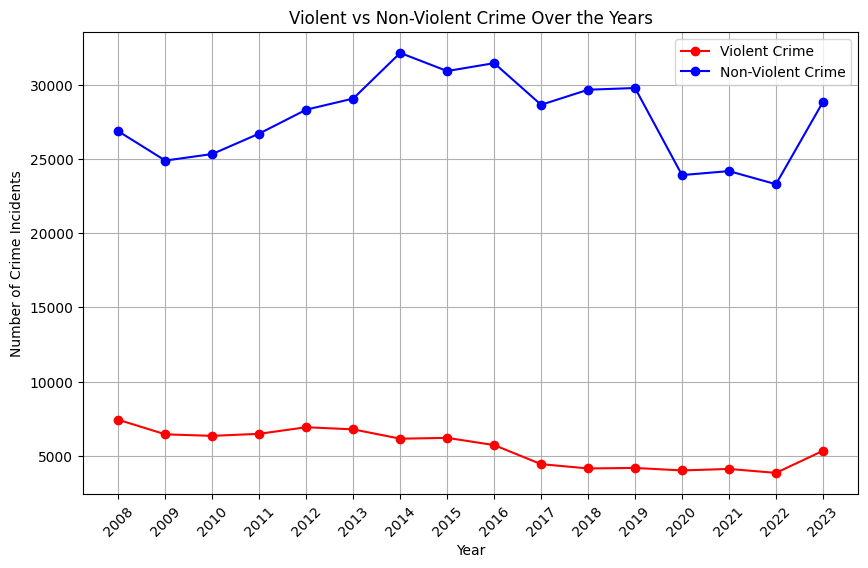

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

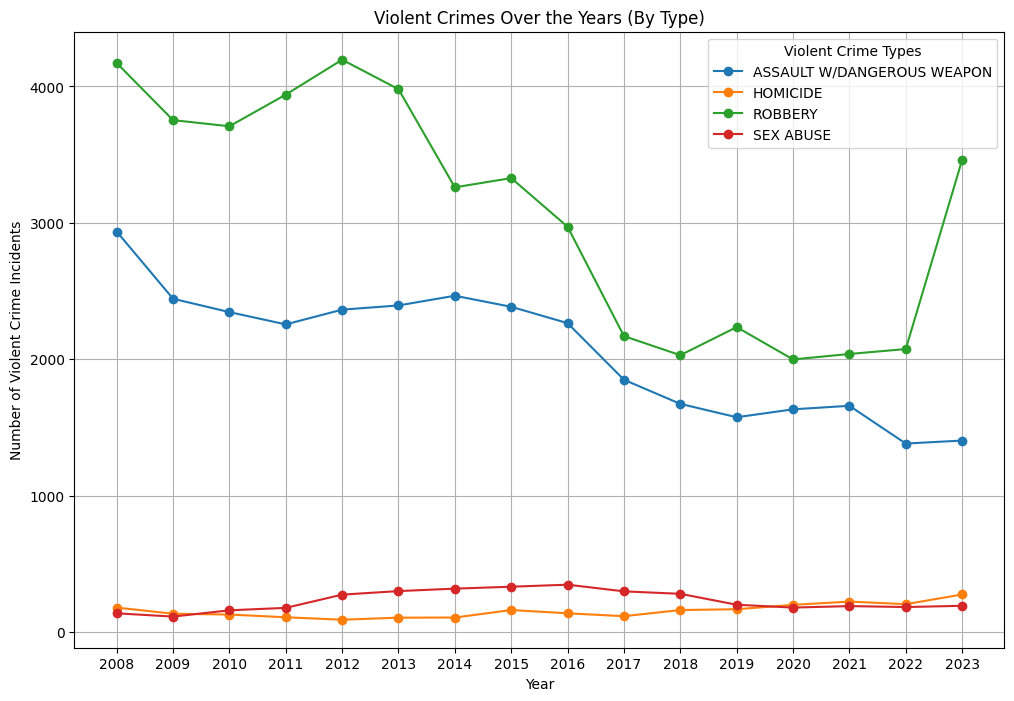

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

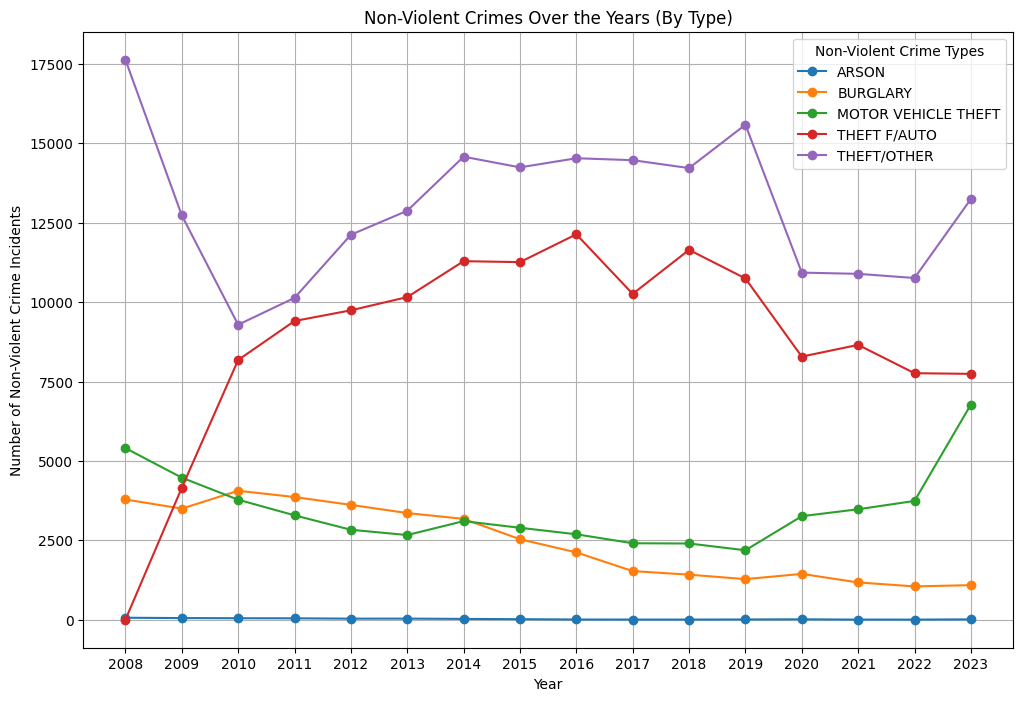

WARD
1    76094
2    97818
3    29050
4    48625
5    74954
6    77915
7    67728
8    60673
dtype: int64


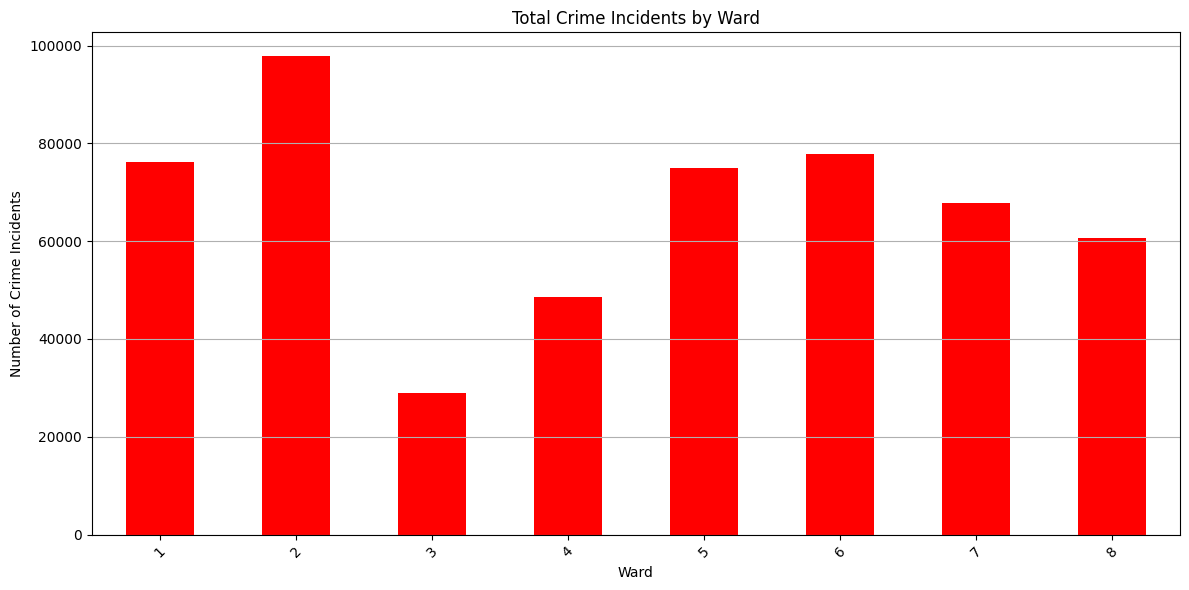

In [6]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(range(len(crime_by_year_offense.index)), crime_by_year_offense.index, rotation=45)
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(crime_by_year.index, rotation=45)
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(non_violent_crime_by_year.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

crime_by_ward = data.groupby('WARD').size()

# Crime incidents by ward
print(crime_by_ward)

plt.figure(figsize=(12, 6))
crime_by_ward.plot(kind='bar', color='red')
plt.title('Total Crime Incidents by Ward')
plt.xlabel('Ward')
plt.ylabel('Number of Crime Incidents')
plt.xticks(rotation=45)

# Display grid
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

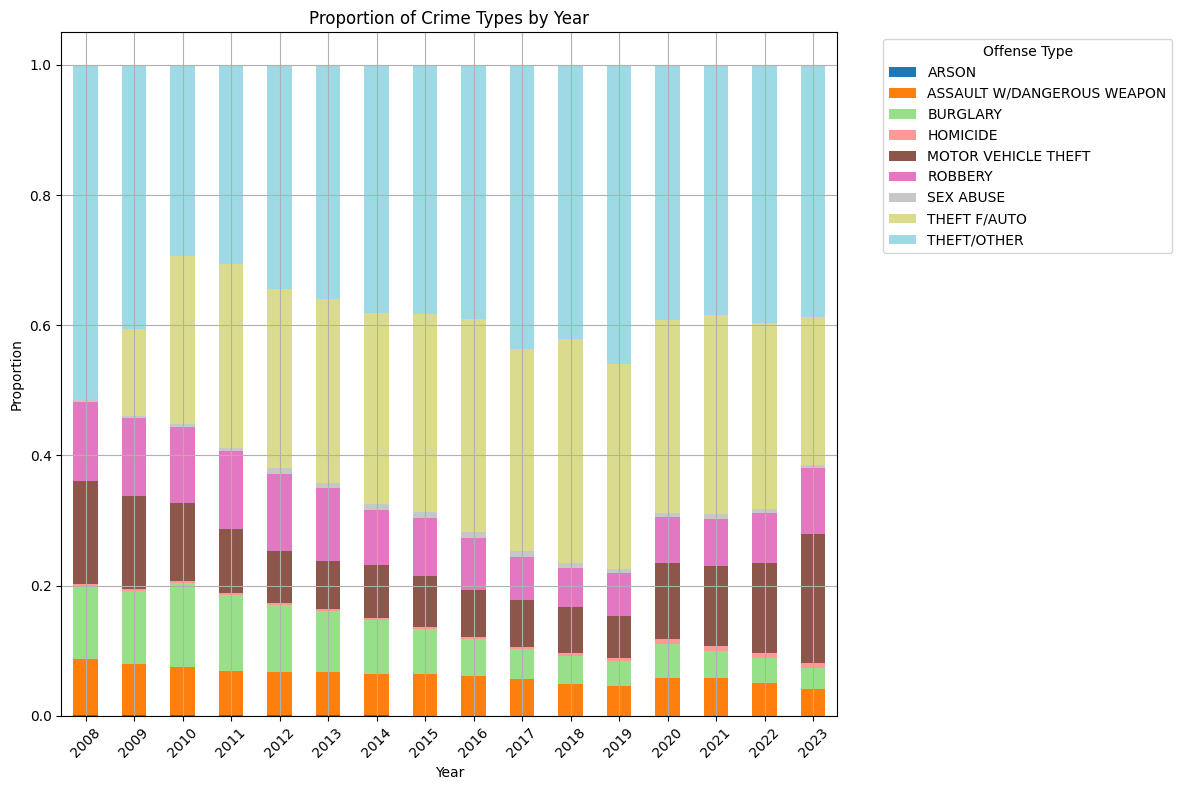

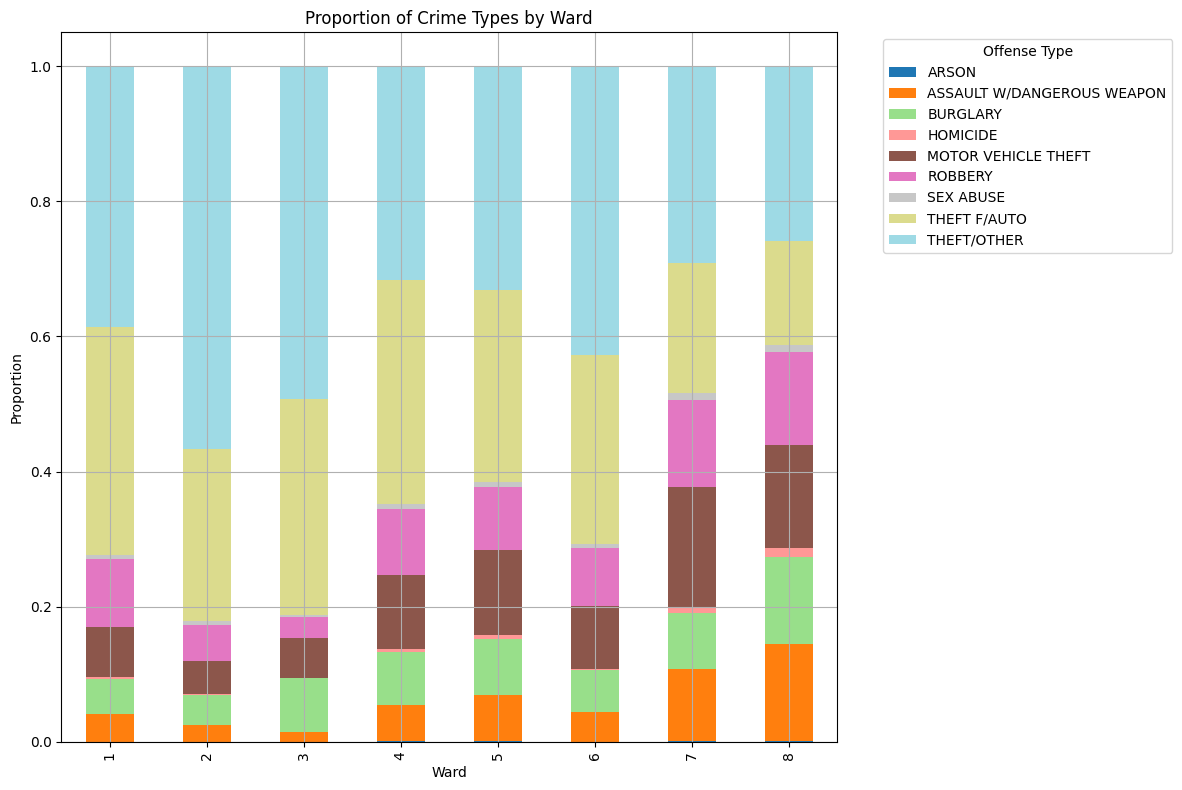

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


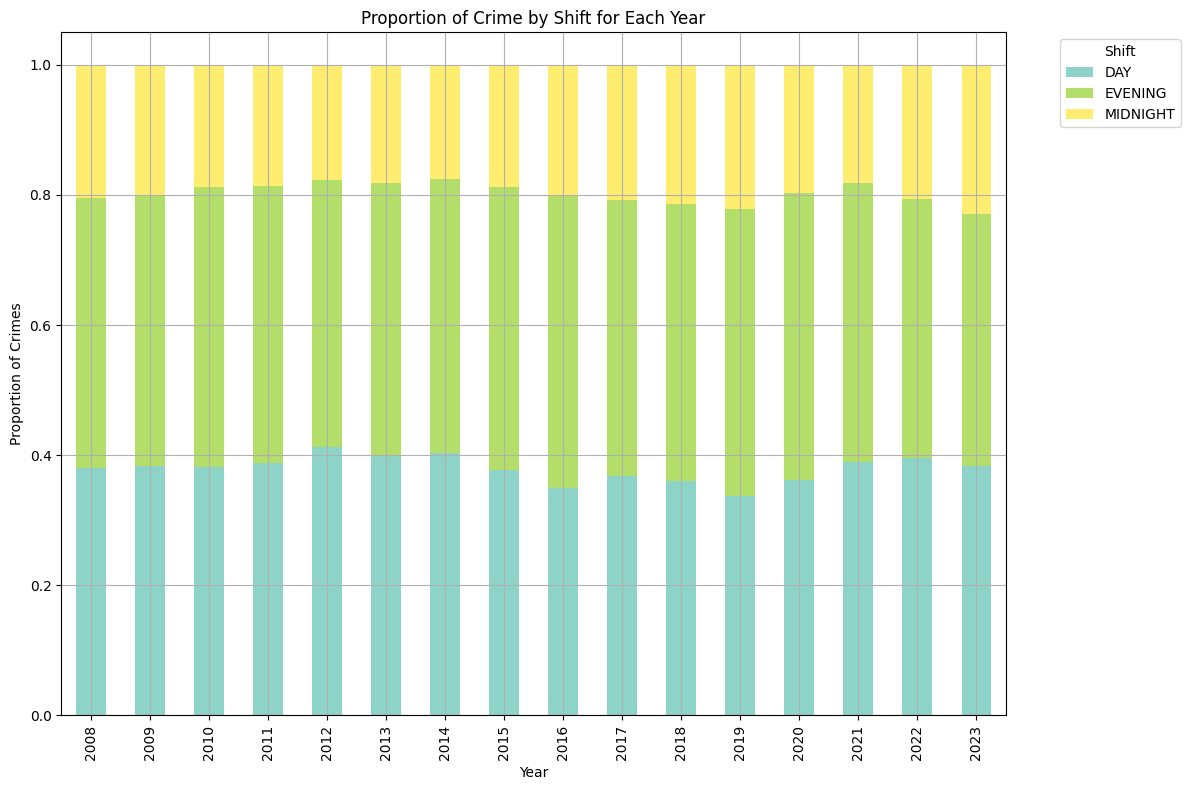

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


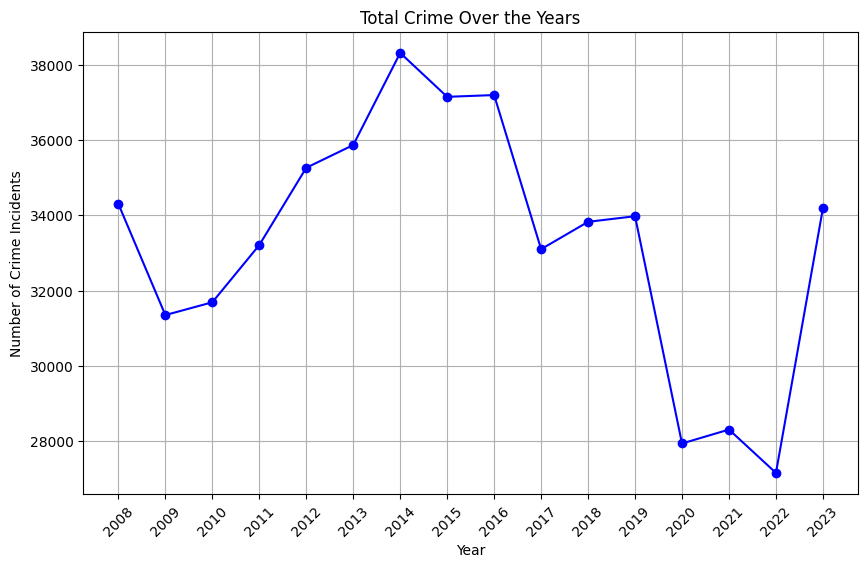

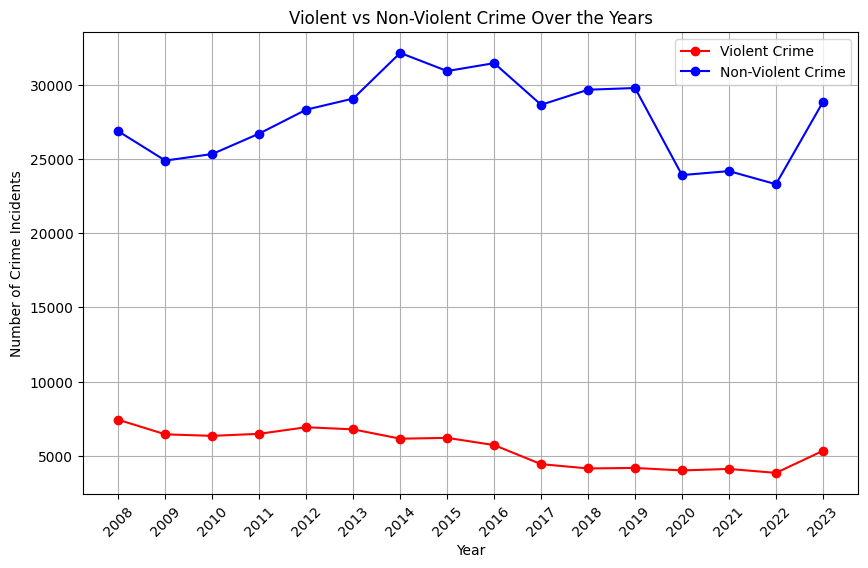

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

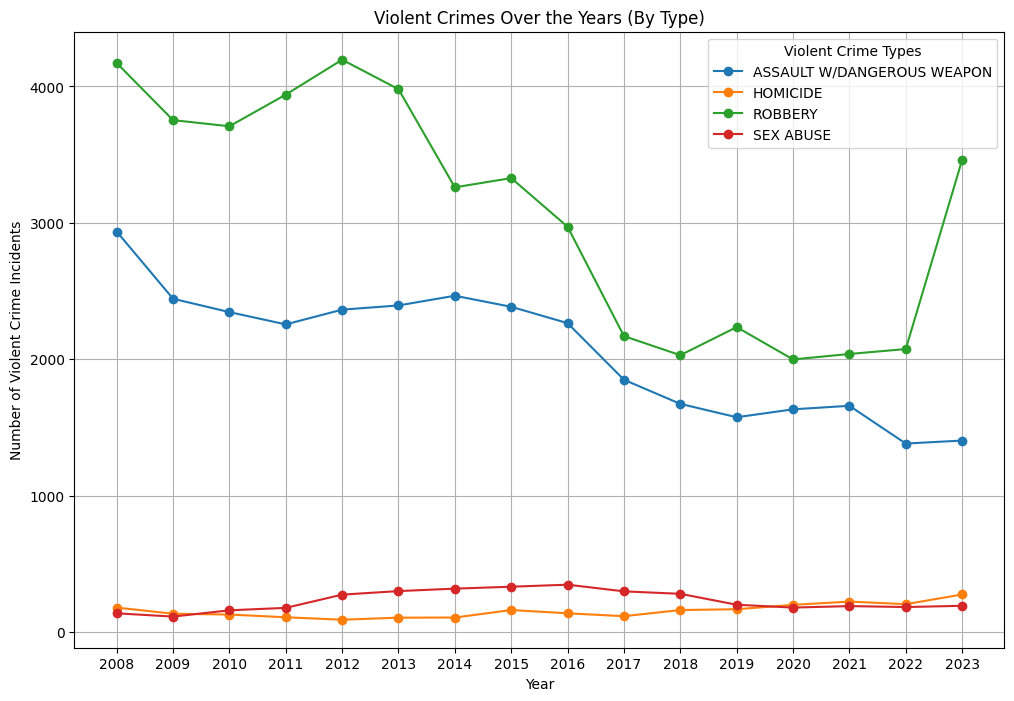

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

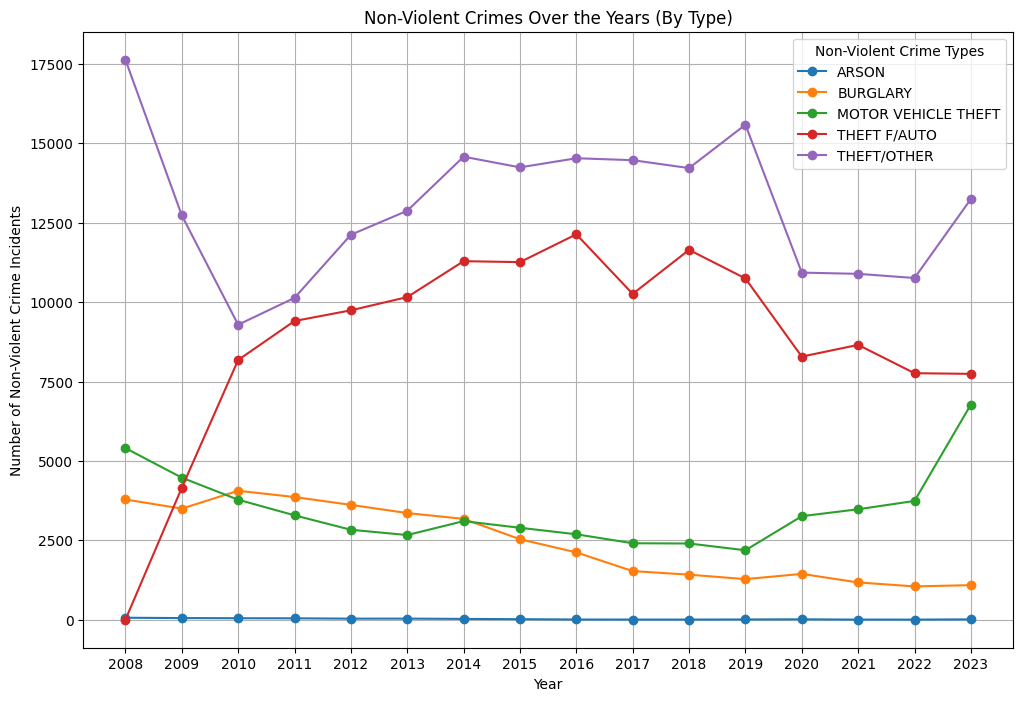

WARD
1    76094
2    97818
3    29050
4    48625
5    74954
6    77915
7    67728
8    60673
dtype: int64


ValueError: Invalid color seafoam

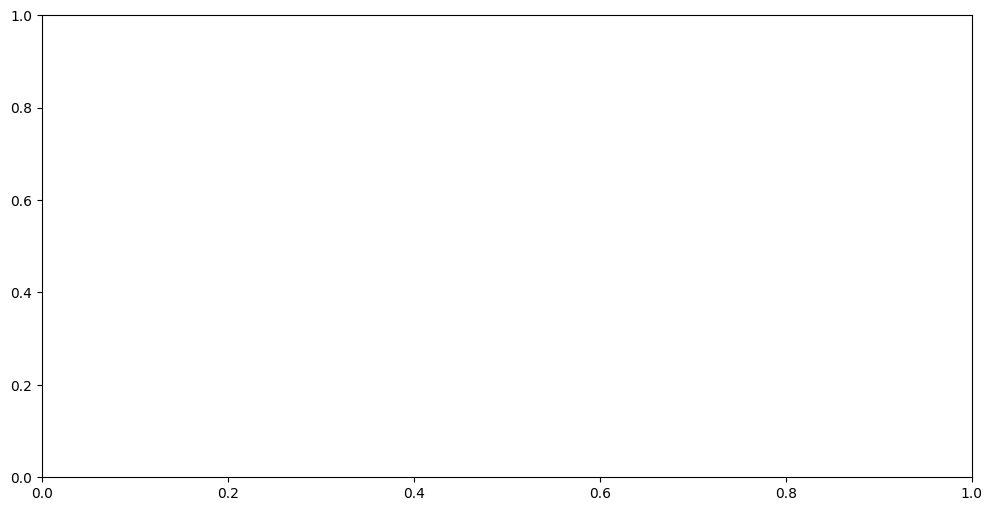

In [7]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(range(len(crime_by_year_offense.index)), crime_by_year_offense.index, rotation=45)
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(crime_by_year.index, rotation=45)
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(non_violent_crime_by_year.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

crime_by_ward = data.groupby('WARD').size()

# Crime incidents by ward
print(crime_by_ward)

plt.figure(figsize=(12, 6))
crime_by_ward.plot(kind='bar', color='seafoam')
plt.title('Total Crime Incidents by Ward')
plt.xlabel('Ward')
plt.ylabel('Number of Crime Incidents')
plt.xticks(rotation=45)

# Display grid
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

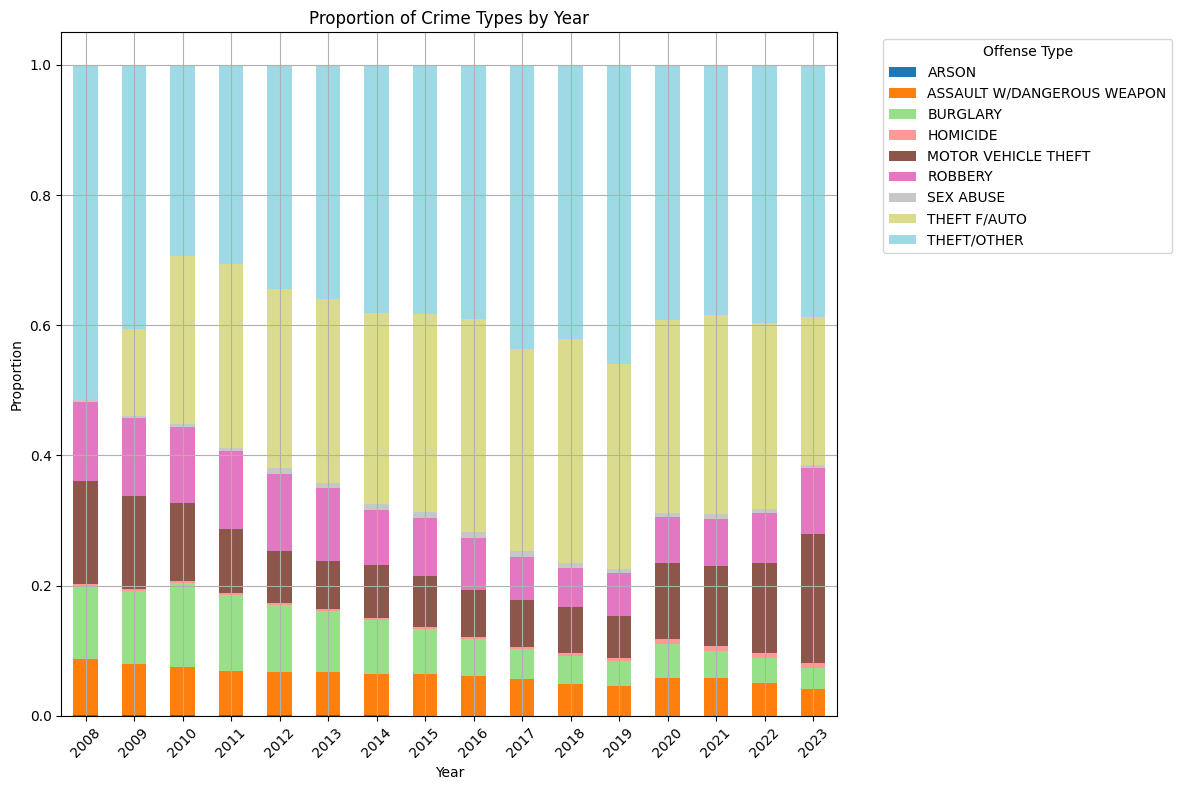

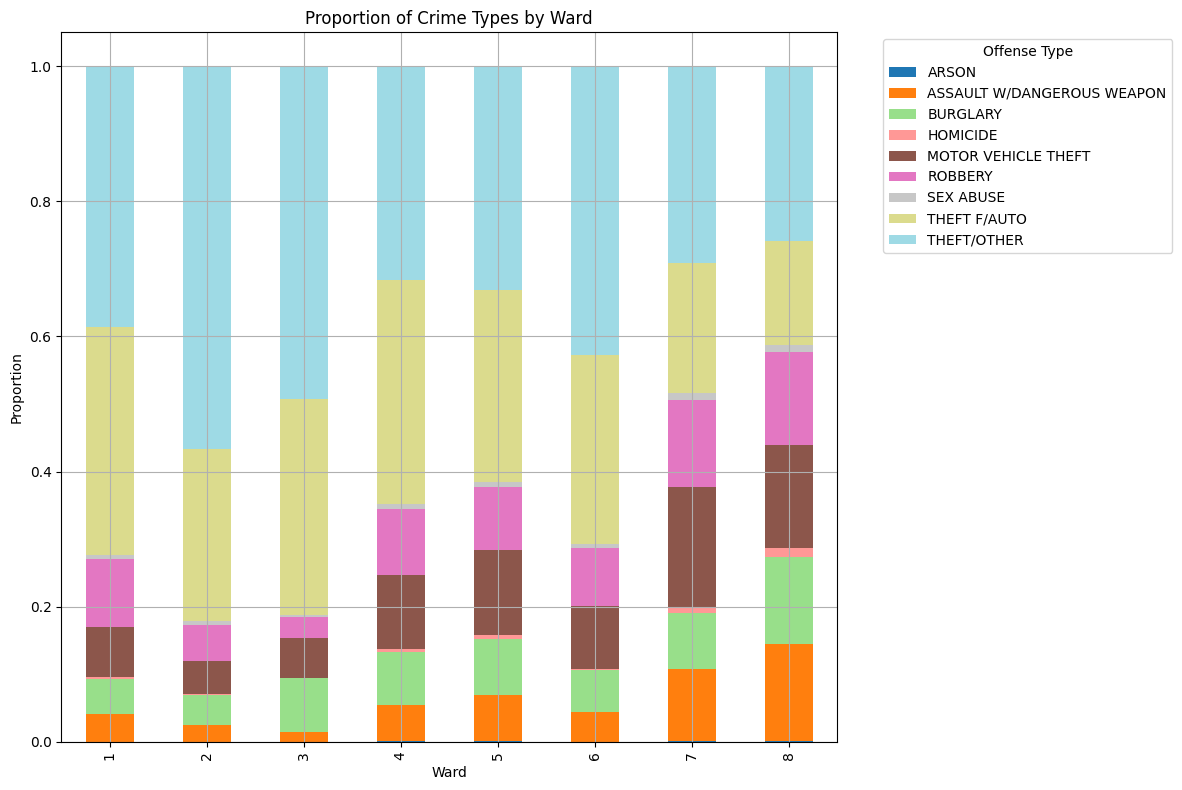

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


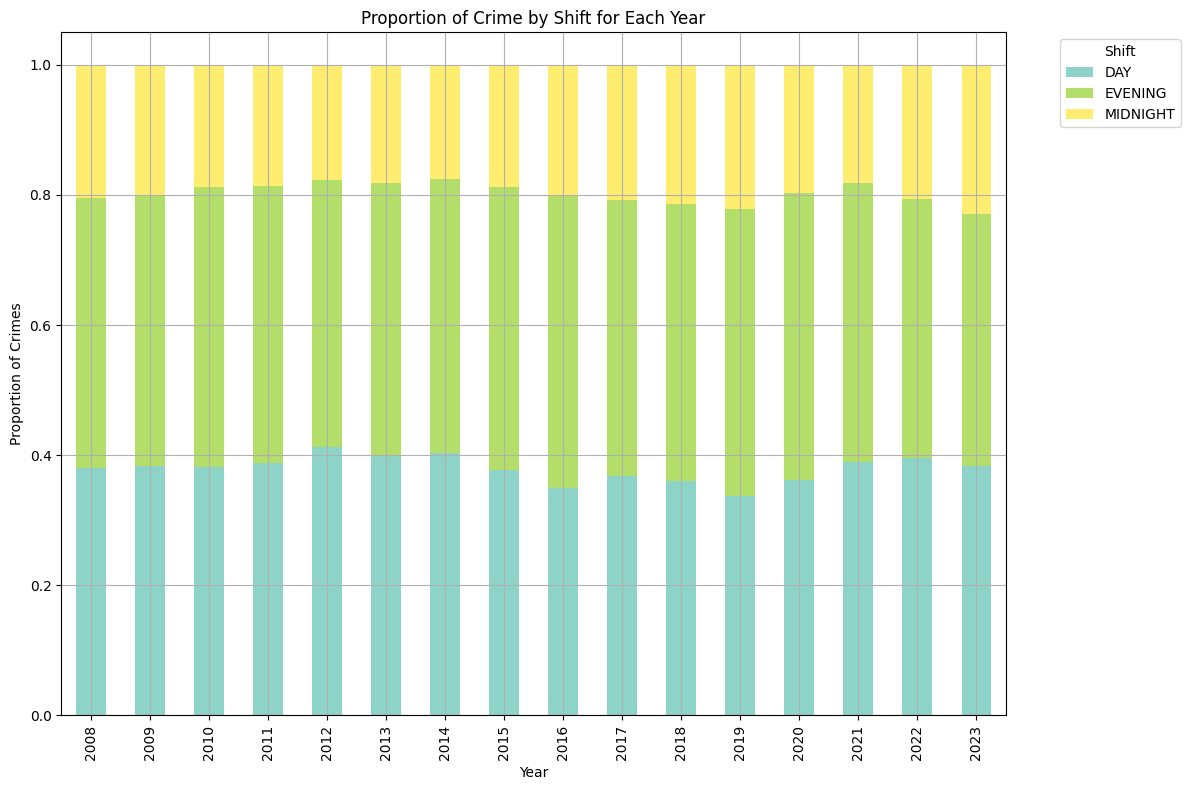

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


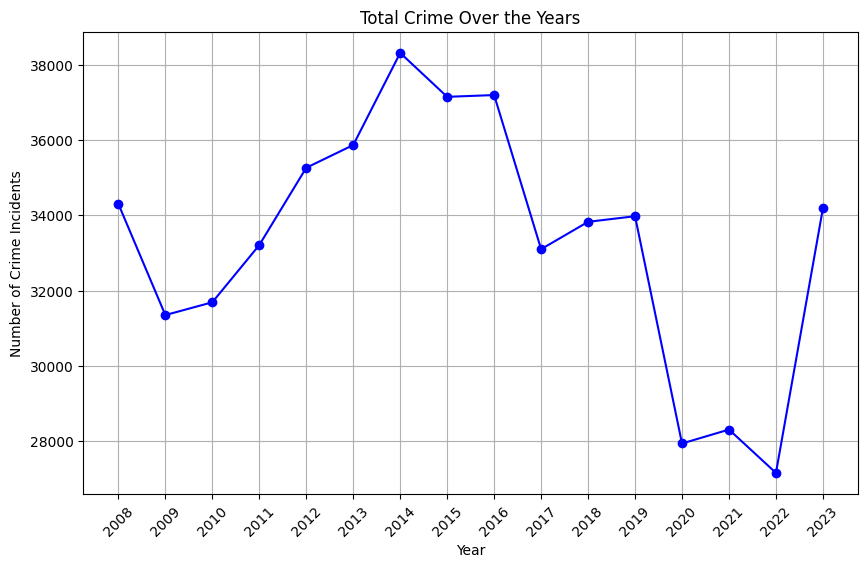

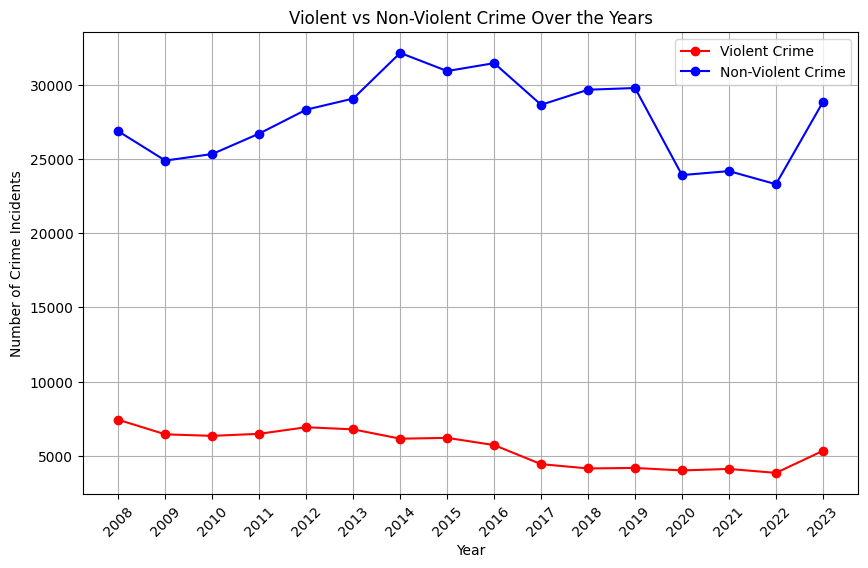

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

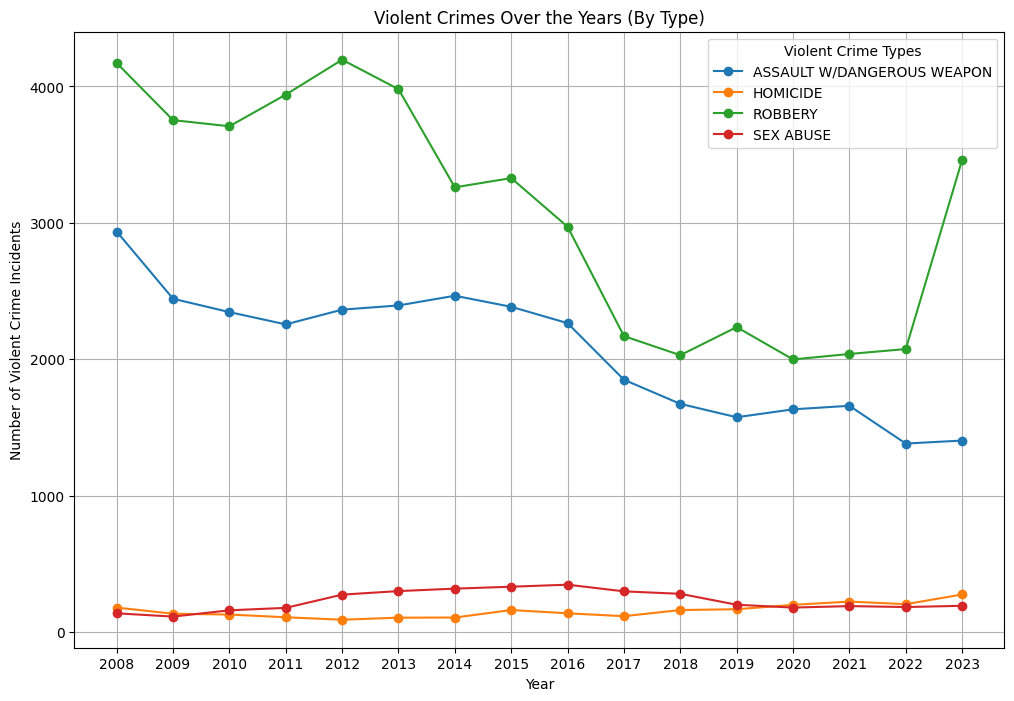

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

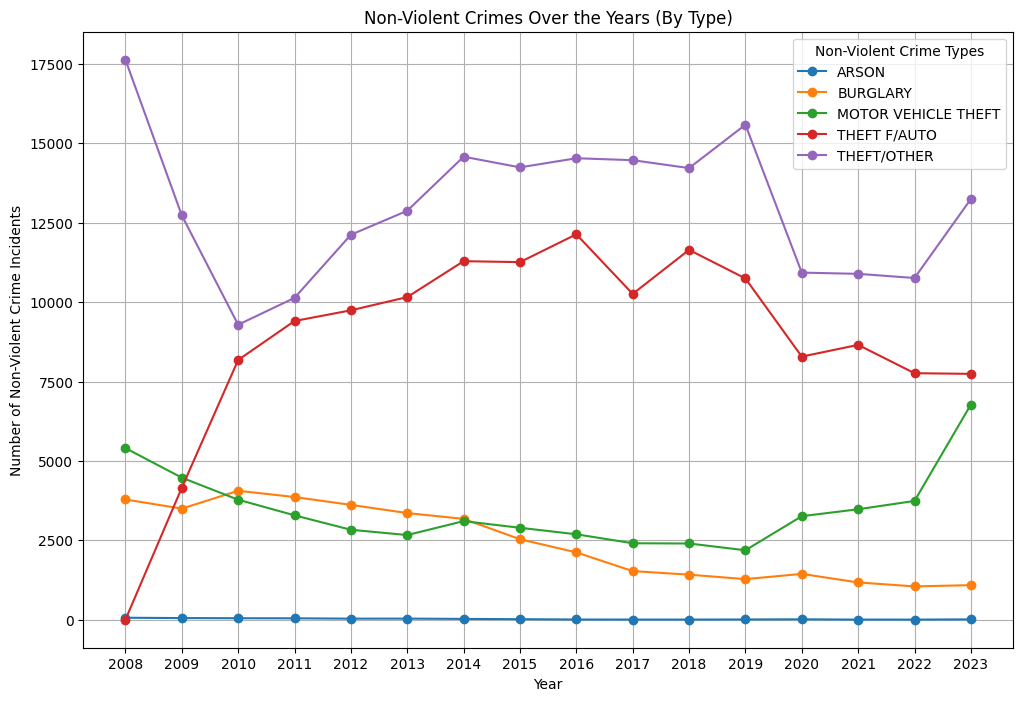

WARD
1    76094
2    97818
3    29050
4    48625
5    74954
6    77915
7    67728
8    60673
dtype: int64


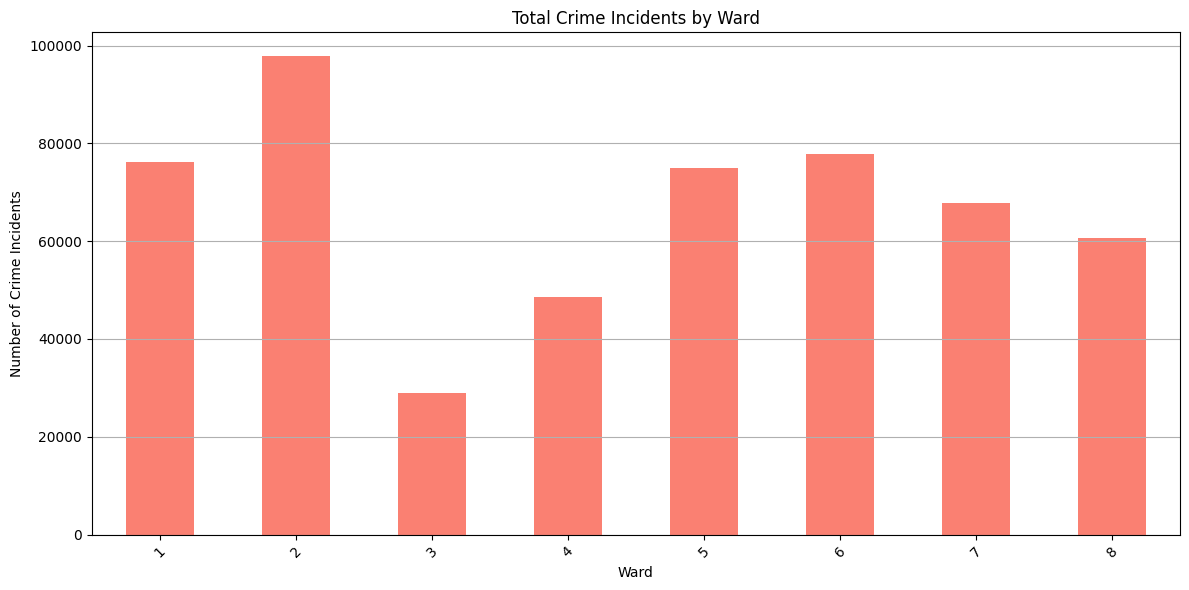

In [8]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(range(len(crime_by_year_offense.index)), crime_by_year_offense.index, rotation=45)
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(crime_by_year.index, rotation=45)
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(non_violent_crime_by_year.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

crime_by_ward = data.groupby('WARD').size()

# Crime incidents by ward
print(crime_by_ward)

plt.figure(figsize=(12, 6))
crime_by_ward.plot(kind='bar', color='salmon')
plt.title('Total Crime Incidents by Ward')
plt.xlabel('Ward')
plt.ylabel('Number of Crime Incidents')
plt.xticks(rotation=45)

# Display grid
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532871 entries, 0 to 532870
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REPORT_DAT       532871 non-null  object 
 1   YEAR             532871 non-null  int64  
 2   MONTH            532871 non-null  int64  
 3   DAY              532871 non-null  int64  
 4   HOUR             532871 non-null  int64  
 5   MINUTE           532871 non-null  int64  
 6   SHIFT            532871 non-null  object 
 7   METHOD           532871 non-null  object 
 8   OFFENSE          532871 non-null  object 
 9   BLOCK            532871 non-null  object 
 10  WARD             532871 non-null  int64  
 11  ANC              532871 non-null  object 
 12  DISTRICT         532871 non-null  int64  
 13  PSA              532871 non-null  int64  
 14  VOTING_PRECINCT  532871 non-null  object 
 15  LATITUDE         532871 non-null  float64
 16  LONGITUDE        532871 non-null  floa

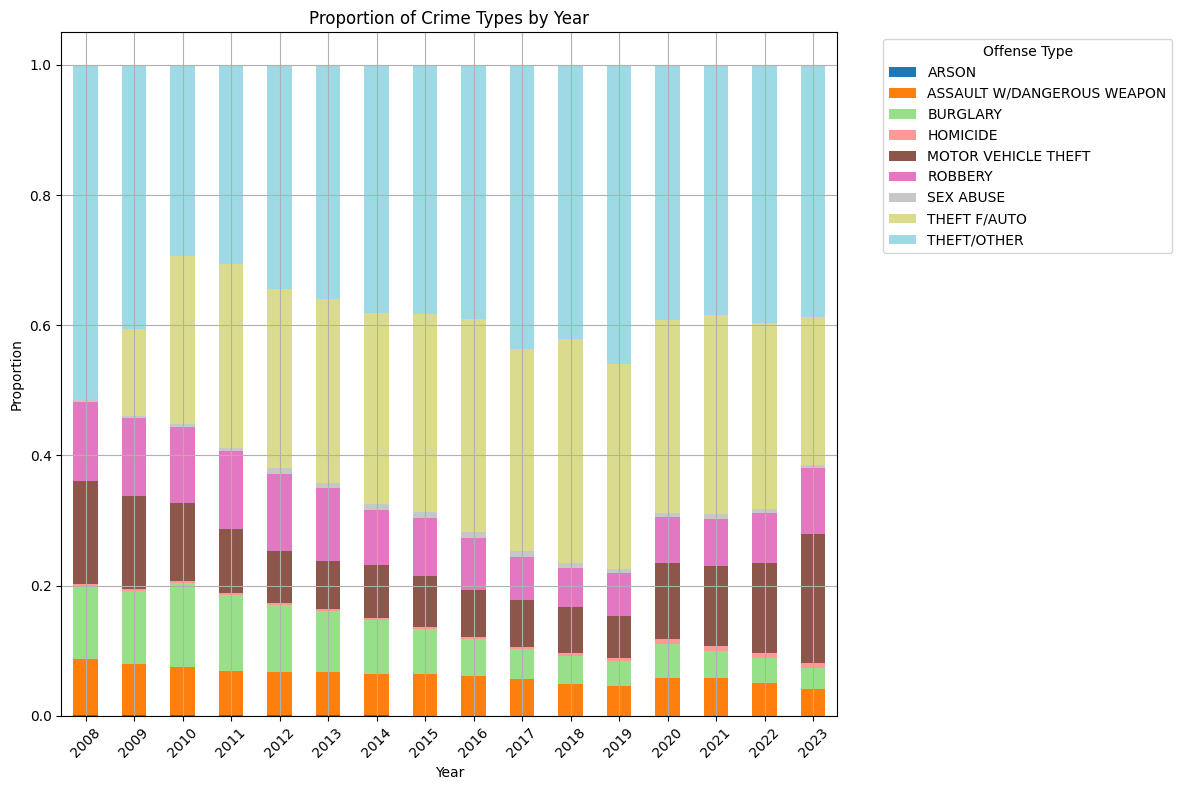

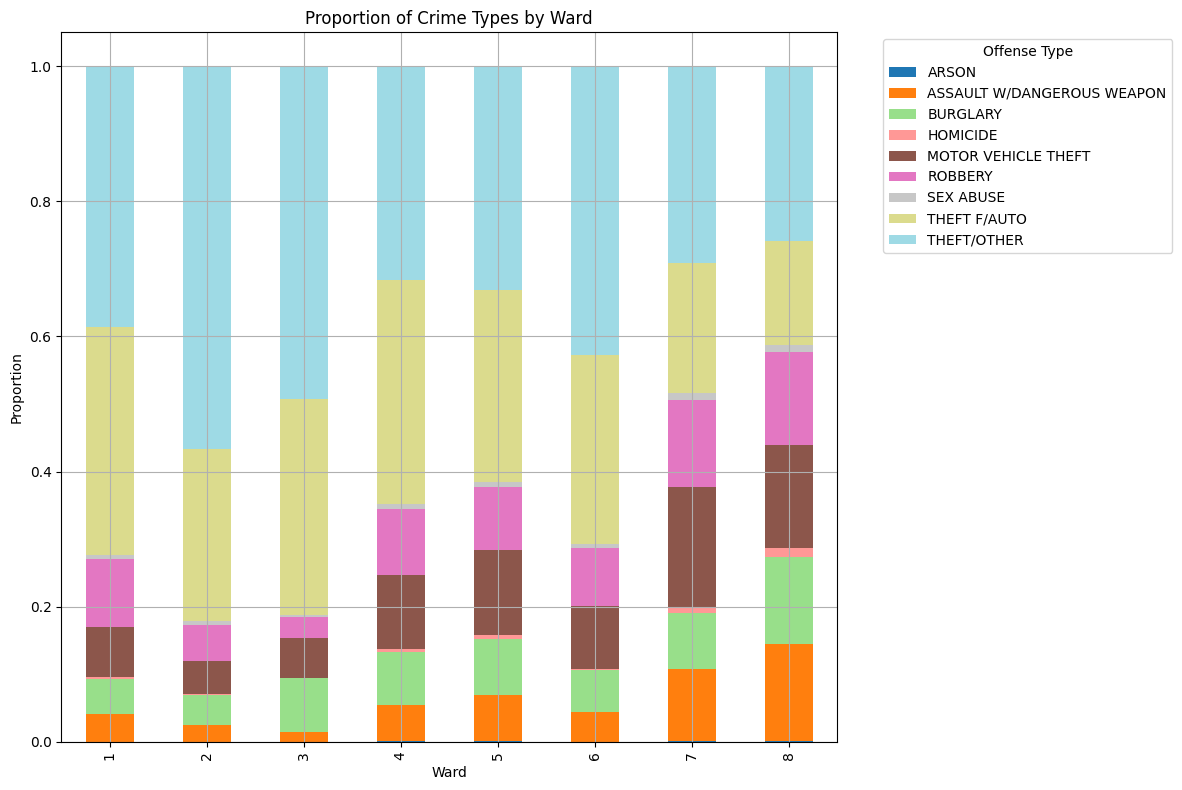

SHIFT       DAY   EVENING  MIDNIGHT
YEAR                               
2008   0.379886  0.414837  0.205276
2009   0.384051  0.416396  0.199553
2010   0.382455  0.429568  0.187977
2011   0.388757  0.424950  0.186294
2012   0.412692  0.410537  0.176771
2013   0.398829  0.419348  0.181823
2014   0.403079  0.421059  0.175861
2015   0.377046  0.435158  0.187796
2016   0.350224  0.448345  0.201430
2017   0.368316  0.423539  0.208145
2018   0.360046  0.425729  0.214224
2019   0.337189  0.440756  0.222055
2020   0.361326  0.441294  0.197380
2021   0.389882  0.428743  0.181375
2022   0.396258  0.397290  0.206452
2023   0.382696  0.387903  0.229401


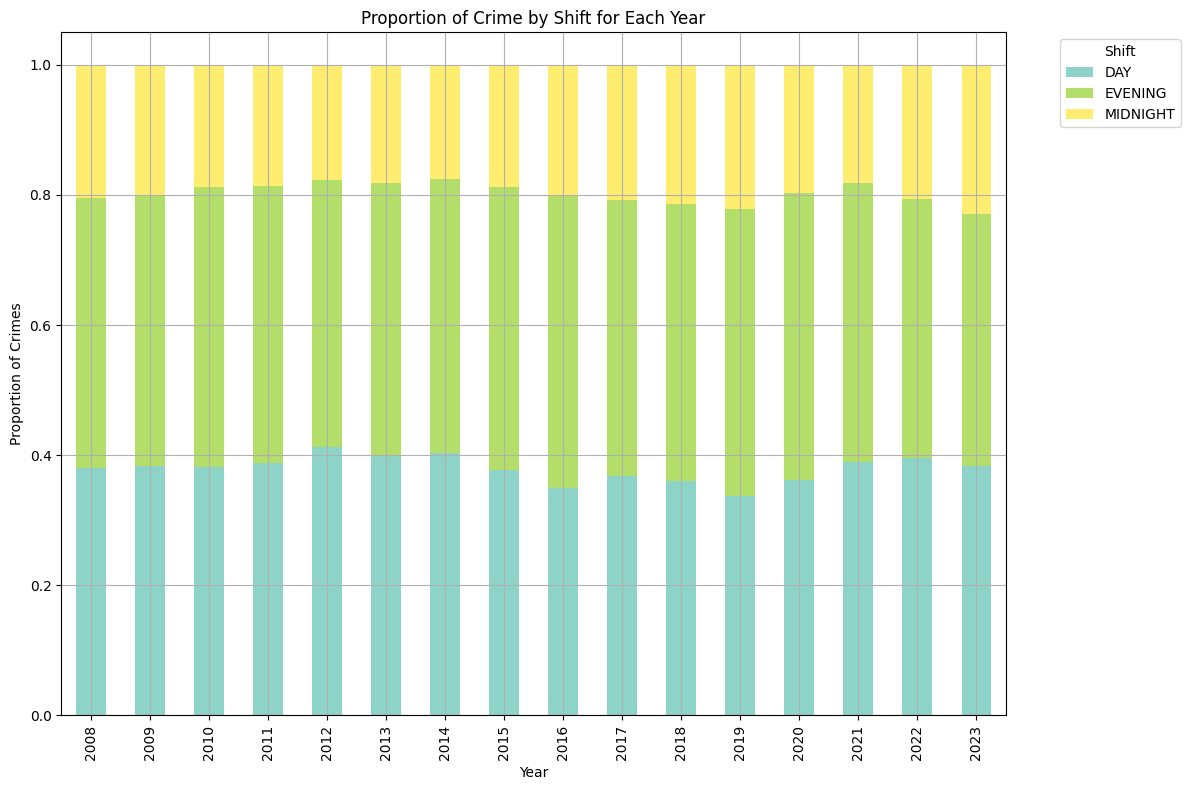

YEAR
2008    34305
2009    31350
2010    31690
2011    33211
2012    35266
2013    35870
2014    38320
2015    37152
2016    37199
2017    33102
2018    33829
2019    33978
2020    27936
2021    28306
2022    27154
2023    34189
dtype: int64


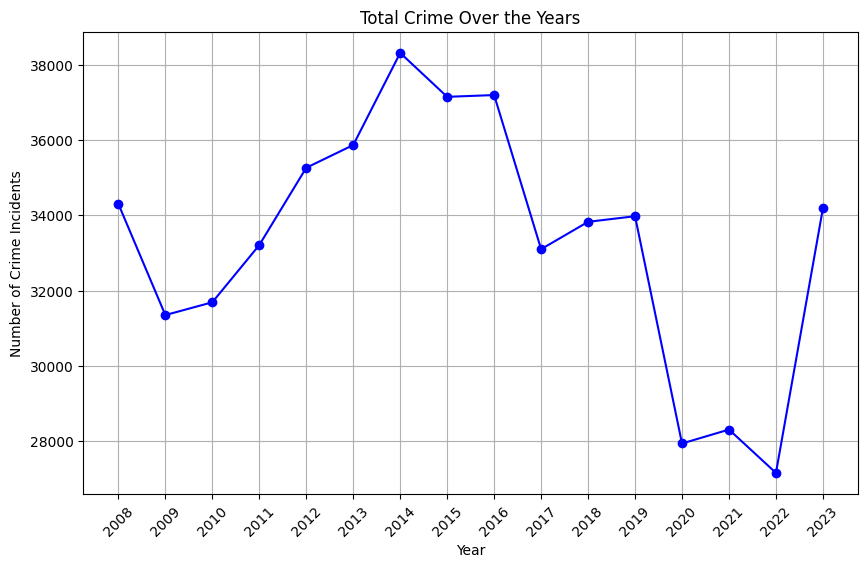

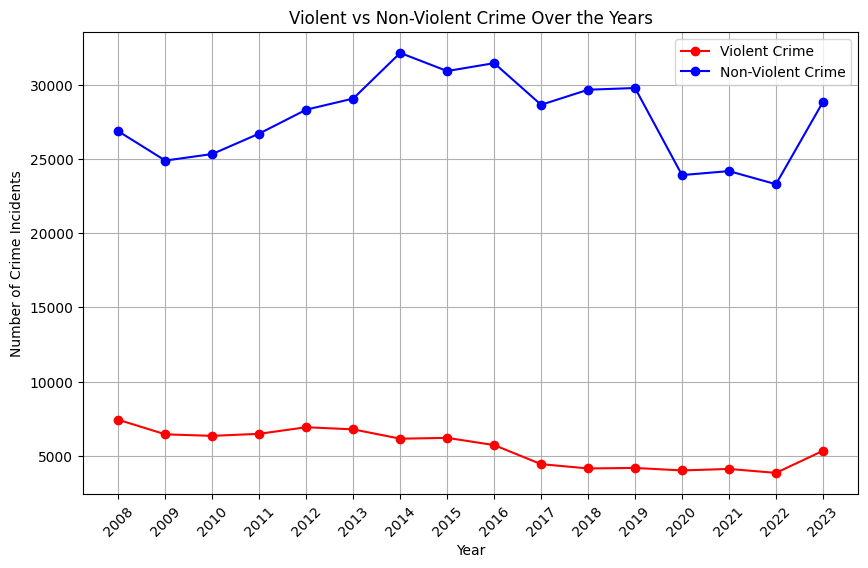

OFFENSE  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  SEX ABUSE
YEAR                                                             
2008                           2936       178     4172        136
2009                           2443       133     3753        112
2010                           2345       127     3708        158
2011                           2255       107     3940        176
2012                           2363        89     4196        273
2013                           2394       104     3980        299
2014                           2465       105     3260        317
2015                           2384       160     3328        331
2016                           2264       136     2971        346
2017                           1849       115     2169        297
2018                           1672       160     2029        279
2019                           1574       166     2235        199
2020                           1632       198     1998        178
2021      

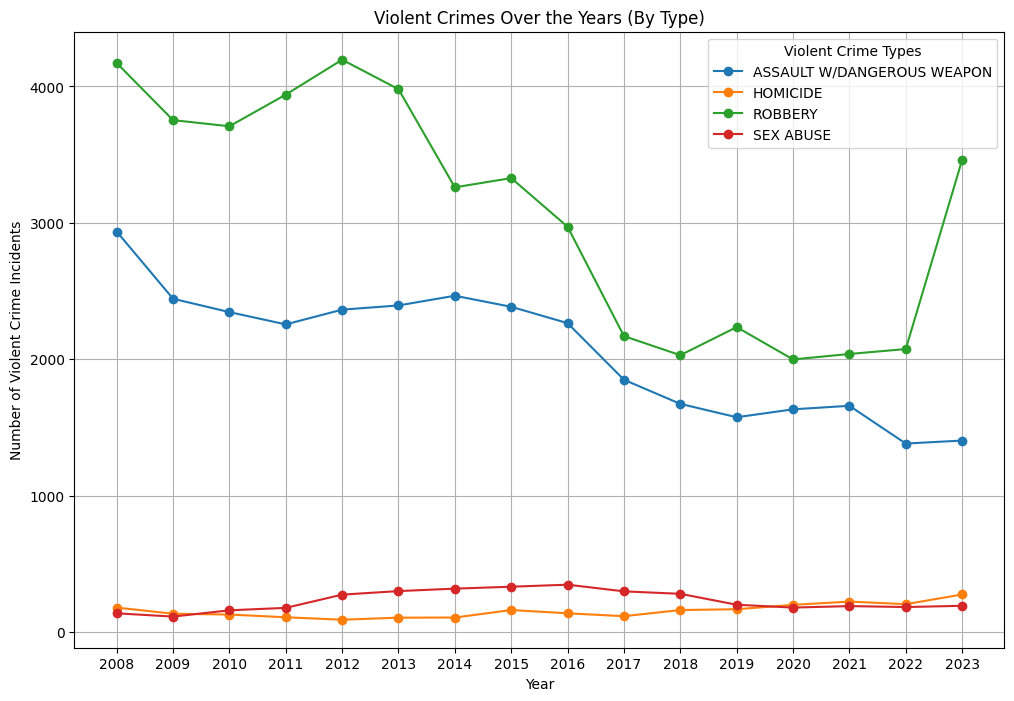

OFFENSE  ARSON  BURGLARY  MOTOR VEHICLE THEFT  THEFT F/AUTO  THEFT/OTHER
YEAR                                                                    
2008      62.0    3786.0               5403.0           0.0      17632.0
2009      52.0    3498.0               4473.0        4154.0      12732.0
2010      47.0    4060.0               3779.0        8178.0       9288.0
2011      44.0    3863.0               3287.0        9405.0      10134.0
2012      34.0    3616.0               2832.0        9742.0      12121.0
2013      35.0    3358.0               2666.0       10158.0      12876.0
2014      26.0    3175.0               3104.0       11289.0      14579.0
2015      17.0    2535.0               2895.0       11259.0      14243.0
2016       7.0    2120.0               2690.0       12135.0      14530.0
2017       5.0    1531.0               2408.0       10259.0      14469.0
2018       5.0    1419.0               2400.0       11645.0      14220.0
2019       8.0    1278.0               2187.0      

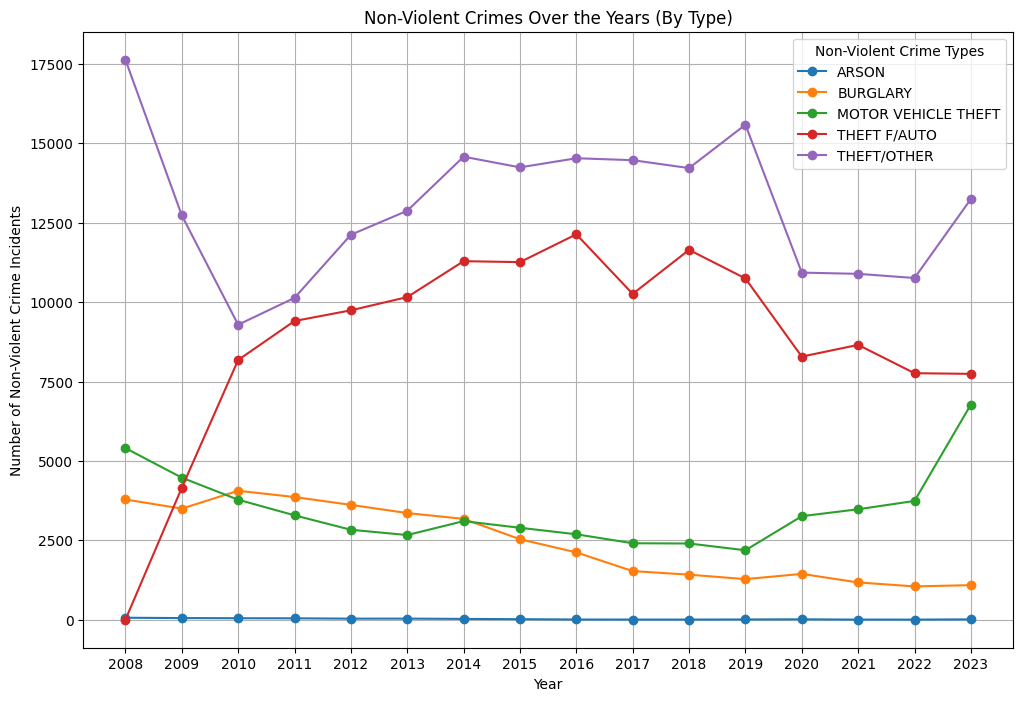

CRIME_TYPE  Non-Violent  Violent
WARD                            
1                 64613    11481
2                 89604     8214
3                 27584     1466
4                 40765     7860
5                 61956    12998
6                 67322    10593
7                 50473    17255
8                 42070    18603


<Figure size 1200x600 with 0 Axes>

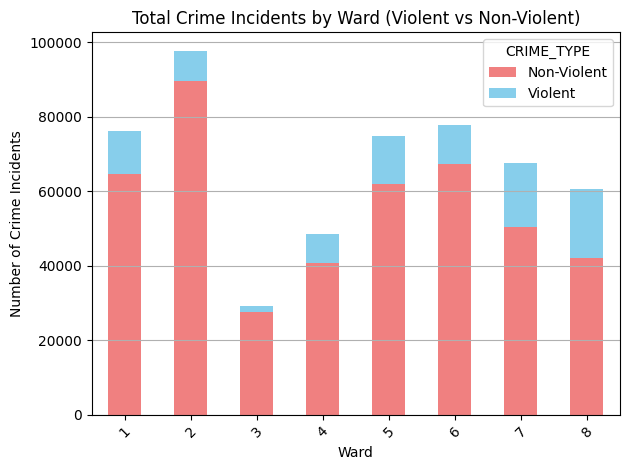

In [9]:
import pandas as pd


file_path = r'C:\Users\AP\Documents\GitHub\DSCapstone\combined_data_split.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

data = data[data['YEAR'] != 2024]

print(data['YEAR'].unique()) 


import pandas as pd
import matplotlib.pyplot as plt


# Offenses over the years
crime_by_year_offense = data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)
crime_by_year_offense_prop = crime_by_year_offense.div(crime_by_year_offense.sum(axis=1), axis=0)
crime_by_year_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.xticks(range(len(crime_by_year_offense.index)), crime_by_year_offense.index, rotation=45)
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#Ward and Offense, Per Year 
crime_by_ward_offense = data.groupby(['WARD', 'OFFENSE']).size().unstack().fillna(0)
crime_by_ward_offense_prop = crime_by_ward_offense.div(crime_by_ward_offense.sum(axis=1), axis=0)


crime_by_ward_offense_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
plt.title('Proportion of Crime Types by Ward')
plt.xlabel('Ward')
plt.ylabel('Proportion')
plt.legend(title='Offense Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Crime by Shift, Per Year
crime_by_year_shift = data.groupby(['YEAR', 'SHIFT']).size().unstack().fillna(0)

crime_by_year_shift_prop = crime_by_year_shift.div(crime_by_year_shift.sum(axis=1), axis=0)

print(crime_by_year_shift_prop)


crime_by_year_shift_prop.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Proportion of Crime by Shift for Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crimes')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Crime per Year
crime_by_year = data.groupby('YEAR').size()

print(crime_by_year)

plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Total Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(crime_by_year.index, rotation=45)
plt.grid(True)
plt.show()

# Violent Crime vs. Non Violent Crime


violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
non_violent_crime_data = data[~data['OFFENSE'].isin(violent_crimes)]

violent_crime_by_year = violent_crime_data.groupby('YEAR').size()
non_violent_crime_by_year = non_violent_crime_data.groupby('YEAR').size()


plt.figure(figsize=(10, 6))

plt.plot(violent_crime_by_year.index, violent_crime_by_year.values, marker='o', label='Violent Crime', color='r')
plt.plot(non_violent_crime_by_year.index, non_violent_crime_by_year.values, marker='o', label='Non-Violent Crime', color='b')
plt.title('Violent vs Non-Violent Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.xticks(non_violent_crime_by_year.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Types of violent crime over the years

violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']

violent_crime_data = data[data['OFFENSE'].isin(violent_crimes)]
violent_crime_by_year_offense = violent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(violent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in violent_crime_by_year_offense.columns:
    plt.plot(violent_crime_by_year_offense.index, violent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crime Incidents')

plt.xticks(violent_crime_by_year_offense.index)

plt.legend(title='Violent Crime Types')
plt.grid(True)
plt.show()


# Non-Violent crime over the years

nonviolent_crimes = ['ARSON', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO', 'THEFT/OTHER']

nonviolent_crime_data = data[data['OFFENSE'].isin(nonviolent_crimes)]
nonviolent_crime_by_year_offense = nonviolent_crime_data.groupby(['YEAR', 'OFFENSE']).size().unstack().fillna(0)

print(nonviolent_crime_by_year_offense)

plt.figure(figsize=(12, 8))

for crime_type in nonviolent_crime_by_year_offense.columns:
    plt.plot(nonviolent_crime_by_year_offense.index, nonviolent_crime_by_year_offense[crime_type], 
             marker='o', label=crime_type)

plt.title('Non-Violent Crimes Over the Years (By Type)')
plt.xlabel('Year')
plt.ylabel('Number of Non-Violent Crime Incidents')

plt.xticks(nonviolent_crime_by_year_offense.index)

plt.legend(title='Non-Violent Crime Types')
plt.grid(True)
plt.show()

crime_by_ward = data.groupby('WARD').size()
violent_crimes = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']
non_violent_crimes = ['THEFT', 'AUTO THEFT', 'BURGLARY', 'VANDALISM']
data['CRIME_TYPE'] = data['OFFENSE'].apply(lambda x: 'Violent' if x in violent_crimes else 'Non-Violent')
crime_by_ward_type = data.groupby(['WARD', 'CRIME_TYPE']).size().unstack().fillna(0)

print(crime_by_ward_type)

plt.figure(figsize=(12, 6))
crime_by_ward_type.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title('Total Crime Incidents by Ward (Violent vs Non-Violent)')
plt.xlabel('Ward')
plt.ylabel('Number of Crime Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()